# データセットの作成

## Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
from pprint import pprint
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'
import random

In [2]:
# JCT token setting
jct_tokenId = '0x4a43540000000000000000000000000000000000000000000000000000000000'
jct_price = 1.0e+5

In [4]:
# Relative path to save data
from pathlib import Path

data_dir = Path('../data/data202303_v2')
data_dir.mkdir(parents=True, exist_ok=True)
data_relative_path = '../data/data202303_v2/'

## Sample csv format

In [5]:
sample_create_token_df = pd.read_csv('../data/sample/csv/createToken_decode.csv')
sample_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20221110132152000000000000000000000000000000...,ST00001,10000000,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20221110132152000000000000000000000000000000...,ST00002,10000000,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20221110132152000000000000000000000000000000...,ST00003,10000000,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20221110132152000000000000000000000000000000...,ST00004,10000000,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20221110132152000000000000000000000000000000...,ST00005,10000000,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
351,0x20221110132152000000000000000000000000000000...,ST00352,10000000,0x30783030303031000000000000000000000000000000...,1668054112
352,0x20221110132152000000000000000000000000000000...,ST00353,10000000,0x30783030303031000000000000000000000000000000...,1668054112
353,0x20221110132152000000000000000000000000000000...,ST00354,10000000,0x30783030303031000000000000000000000000000000...,1668054112
354,0x20221110132152000000000000000000000000000000...,ST00355,10000000,0x30783030303031000000000000000000000000000000...,1668054112


In [6]:
sample_create_trading_df = pd.read_csv('../data/sample/csv/createTrading_decode.csv')
sample_create_trading_df

,tradingId,lender,borrowerTokenIds,lenderTokenIds,borrowerTokenAmounts,lenderTokenAmounts,startTime,finishTime,rate,adjustmentToken
0,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
1,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
2,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
3,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
4,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...
8662,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8663,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8664,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...
8665,0x20221110132540000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,['0x202211101321520000000000000000000000000000...,[10000000000],"[33333333, 33333333, 33333333]",1668054340,1668057940,100,0x4a435400000000000000000000000000000000000000...


In [7]:
sample_update_token_df = pd.read_csv('../data/sample/csv/updateToken_decode.csv')
sample_update_token_df

,tokenId,price,updateTime
0,0x20221110132152000000000000000000000000000000...,9000000,1668054263
1,0x20221110132152000000000000000000000000000000...,9000000,1668054263
2,0x20221110132152000000000000000000000000000000...,9000000,1668054263
3,0x20221110132152000000000000000000000000000000...,9000000,1668054263
4,0x20221110132152000000000000000000000000000000...,9000000,1668054263
...,...,...,...
351,0x20221110132152000000000000000000000000000000...,9000000,1668054263
352,0x20221110132152000000000000000000000000000000...,9000000,1668054263
353,0x20221110132152000000000000000000000000000000...,9000000,1668054263
354,0x20221110132152000000000000000000000000000000...,9000000,1668054263


## Mock data distributions

### Number of Trade

In [7]:
ave_gc_trade_num = 438
ave_sc_trade_num = 2833
ave_bond_trade_num = 8667

stock_trade_term_list = [1, 5, 19, 60, 180, 2]
bond_trade_term_list = [1, 5, 19, 60, 180]
stock_trade_term_percent_list = [0.24, 0.38, 0.07, 0.02, 0.05, 0.24]
bond_trade_term_percent_list = [0.37, 0.15, 0.29, 0.16, 0.04]

max_gc_trade_num = math.ceil(np.dot(np.array(stock_trade_term_list), np.array(stock_trade_term_percent_list)) * ave_gc_trade_num)
max_sc_trade_num = math.ceil(np.dot(np.array(stock_trade_term_list), np.array(stock_trade_term_percent_list)) * ave_sc_trade_num)
max_bond_trade_num = math.ceil(np.dot(np.array(bond_trade_term_list), np.array(bond_trade_term_percent_list)) * ave_bond_trade_num)
print('max gc num: ', max_gc_trade_num)
print('max sc num: ', max_sc_trade_num)
print('max bond num: ', max_bond_trade_num)

max gc num:  6198
max sc num:  40087
max bond num:  203068


In [8]:
np.array([1758, 5020]) * 0.075

array([131.85, 376.5 ])

In [59]:
a_trade_num = 8667 + 3271

b_trade_nums = {
    '100%': {
        'gc': 6198,
        'sc': 40087,
        'bond': 203068,
    },
    '150%': {
        'gc': 9297,
        'sc': 60131,
        'bond': 304602,
    },
    '50%': {
        'gc': 3099,
        'sc': 20044,
        'bond': 101534,
    },
    '30%': {
        'gc': 1860,
        'sc': 12027,
        'bond': 60921,
    },
    '25%': {
        'gc': 1550,
        'sc': 10022,
        'bond': 50767,
    },
    '15%': {
        'gc': 928,
        'sc': 6014,
        'bond': 30461,
    },
    '7.5%': {
        'gc': 465,
        'sc': 3007,
        'bond': 15231,
    },
}

b_security_nums = {
    '100%': {
        'stock': 1758,
        'bond': 5020,
    },
    '150%': {
        'stock': 2637,
        'bond': 7530,
    },
    '50%': {
        'stock': 879,
        'bond': 2510,
    },
    '30%': {
        'stock': 528,
        'bond': 1506,
    },
    '25%': {
        'stock': 440,
        'bond': 1255,
    },
    '15%': {
        'stock': 264,
        'bond': 753,
    },
    '7.5%': {
        'stock': 132,
        'bond': 377,
    },
}

additional_trade_nums = {
    '4000': {
        'gc': 100,
        'sc': 643,
        'bond': 3257,
    },
    '9200': {
        'gc': 229,
        'sc': 1479,
        'bond': 7492,
    },
    '3000': {
        'gc': 75,
        'sc': 482,
        'bond': 2443,
    },
    '2000': {
        'gc': 50,
        'sc': 321,
        'bond': 1629,
    },
    '1000': {
        'gc': 25,
        'sc': 161,
        'bond': 814,
    },
}

additional_security_nums = {
    '4000': {
        'stock': 28,
        'bond': 81,
    },
    '9200': {
        'stock': 65,
        'bond': 186,
    },
    '3000': {
        'stock': 22,
        'bond': 61,
    },
    '2000': {
        'stock': 15,
        'bond': 41,
    },
    '1000': {
        'stock': 8,
        'bond': 21,
    },
}

In [58]:
# 1000 * (6198 / (6198 + 40087 + 203068))
# 1000 * (40087 / (6198 + 40087 + 203068))
# 1000 * (203068 / (6198 + 40087 + 203068))


1758 * (1000 / (6198 + 40087 + 203068))
# 5020 * (1000 / (6198 + 40087 + 203068))

7.050246036743091

#### Price

In [66]:
# price_df を格納するobjの初期化
all_price_dfs = {
    '4000': {},
    '9200': {},
    '3000': {},
    '2000': {},
    '1000': {},
}

#### 株レポGC取引

株レポGC取引: 
             10億円以内         10億円超        100億円超        500億円超
ratio  1.500000e-01  6.000000e-01  2.000000e-01  5.000000e-02
min    1.000000e+08  1.000000e+09  1.000000e+10  5.000000e+10
max    1.000000e+09  1.000000e+10  5.000000e+10  1.000000e+11


<AxesSubplot:title={'center':'株レポGC取引: 概観'}>

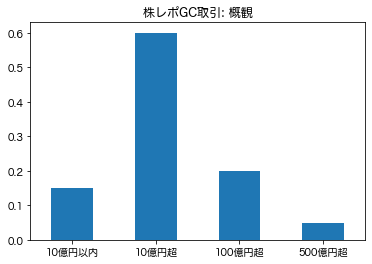

In [67]:
gc_price_column_labels = ['10億円以内', '10億円超', '100億円超', '500億円超']
gc_price_dist = pd.DataFrame([[0.15, 0.6, 0.2, 0.05], [1.0e+8, 1.0e+9, 1.0e+10, 5.0e+10], [1.0e+9, 1.0e+10, 5.0e+10, 1.0e+11]],
                             columns=gc_price_column_labels,
                             index=['ratio', 'min', 'max'])
gc_price_ave = 81.5e+8
print('株レポGC取引: ')
pprint(gc_price_dist)
print('='*50)

plt.title('株レポGC取引: 概観')
gc_price_dist.T['ratio'].plot(kind='bar', rot=0)

Text(0.5, 1.0, '株レポGC取引: ヒストグラム')

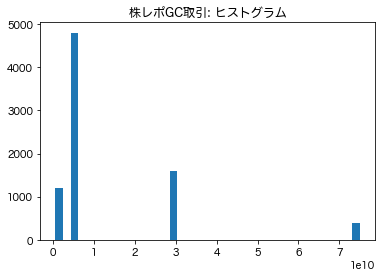

In [68]:
gc_trade_num = 8000
gc_ave_price_list = (gc_price_dist.T['min'] + gc_price_dist.T['max']) / 2
gc_sample = [[ave]*int(gc_price_dist.T['ratio'][index] * gc_trade_num)  for (index, ave) in enumerate(gc_ave_price_list)]

plt.hist(list(itertools.chain.from_iterable(gc_sample)), bins=40)
plt.title('株レポGC取引: ヒストグラム')

In [69]:
def get_gc_price_df(trade_num):
    gc_price_max = gc_price_dist['500億円超']['max']
    gc_price_min = gc_price_dist['10億円以内']['min']
    mock_gc_price_df = pd.DataFrame(np.random.triangular(gc_price_min, gc_price_ave, gc_price_max, trade_num)) * 1.0e+5
    mock_gc_price_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title(f'株レポGC取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_gc_price_df

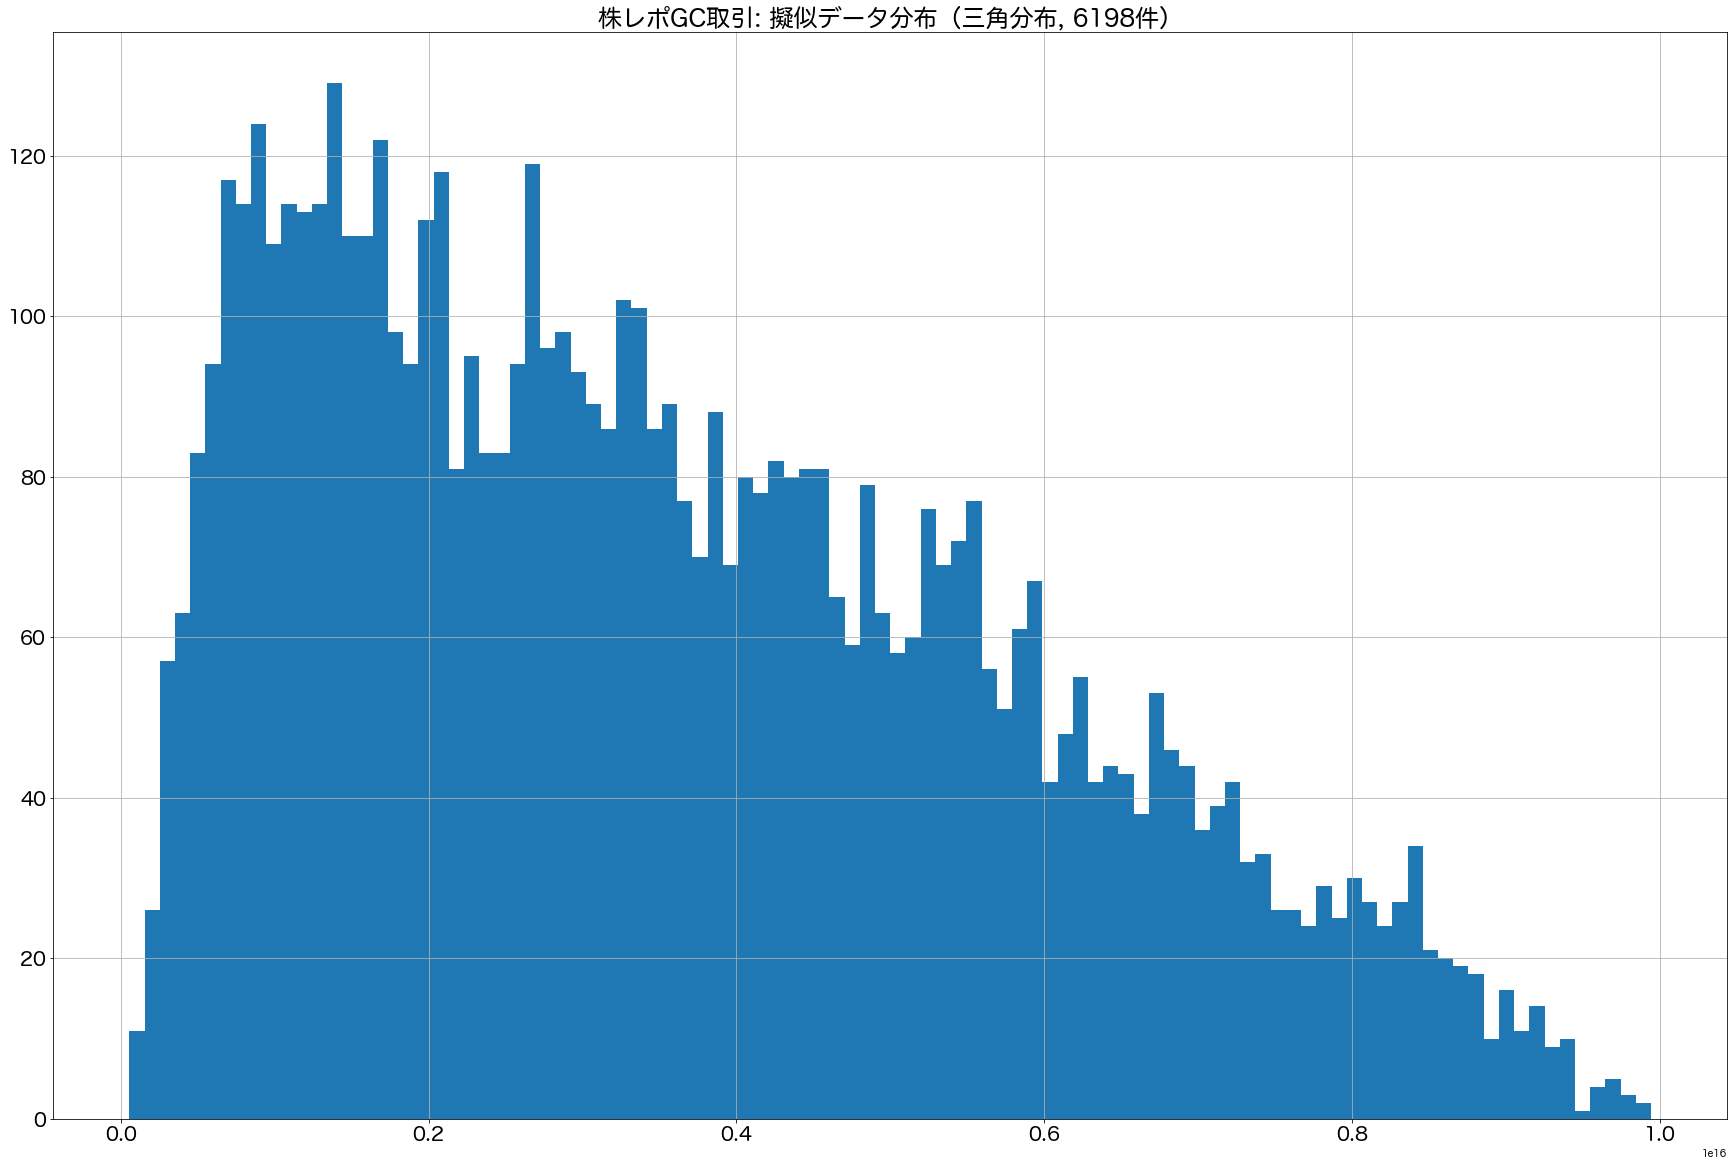

In [70]:
# 三角分布で類似分布を作成
# gc_price_max = gc_price_dist['500億円超']['max']
# gc_price_min = gc_price_dist['10億円以内']['min']
# mock_gc_price_df = pd.DataFrame(np.random.triangular(gc_price_min, gc_price_ave, gc_price_max, gc_trade_num)) * 1.0e+5
# mock_gc_price_df.hist(bins=100, figsize=(30, 20))
# plt.title('株レポGC取引: 擬似データ分布（三角分布）')
mock_gc_trade_8000_df = get_gc_price_df(b_trade_nums['100%']['gc'])

{'4000': {'gc':                0
  0   1.305543e+15
  1   3.919978e+15
  2   2.045236e+15
  3   5.488349e+14
  4   7.337228e+15
  ..           ...
  95  2.981529e+15
  96  2.379813e+15
  97  1.395407e+15
  98  6.003573e+15
  99  5.484360e+14
  
  [100 rows x 1 columns]},
 '9200': {'gc':                 0
  0    3.398531e+15
  1    1.522808e+15
  2    5.924291e+15
  3    9.625967e+15
  4    9.429350e+15
  ..            ...
  224  2.230209e+15
  225  2.336700e+15
  226  8.288592e+14
  227  4.913057e+15
  228  9.685596e+14
  
  [229 rows x 1 columns]},
 '3000': {'gc':                0
  0   3.828716e+15
  1   3.018725e+15
  2   2.055489e+15
  3   7.738370e+14
  4   2.458344e+15
  ..           ...
  70  5.172844e+15
  71  1.781429e+15
  72  2.433622e+15
  73  5.708481e+15
  74  8.863166e+15
  
  [75 rows x 1 columns]},
 '2000': {'gc':                0
  0   3.587368e+15
  1   2.403630e+15
  2   2.499408e+15
  3   4.308303e+15
  4   2.514711e+15
  5   8.159666e+14
  6   6.727892e+15
  7   7

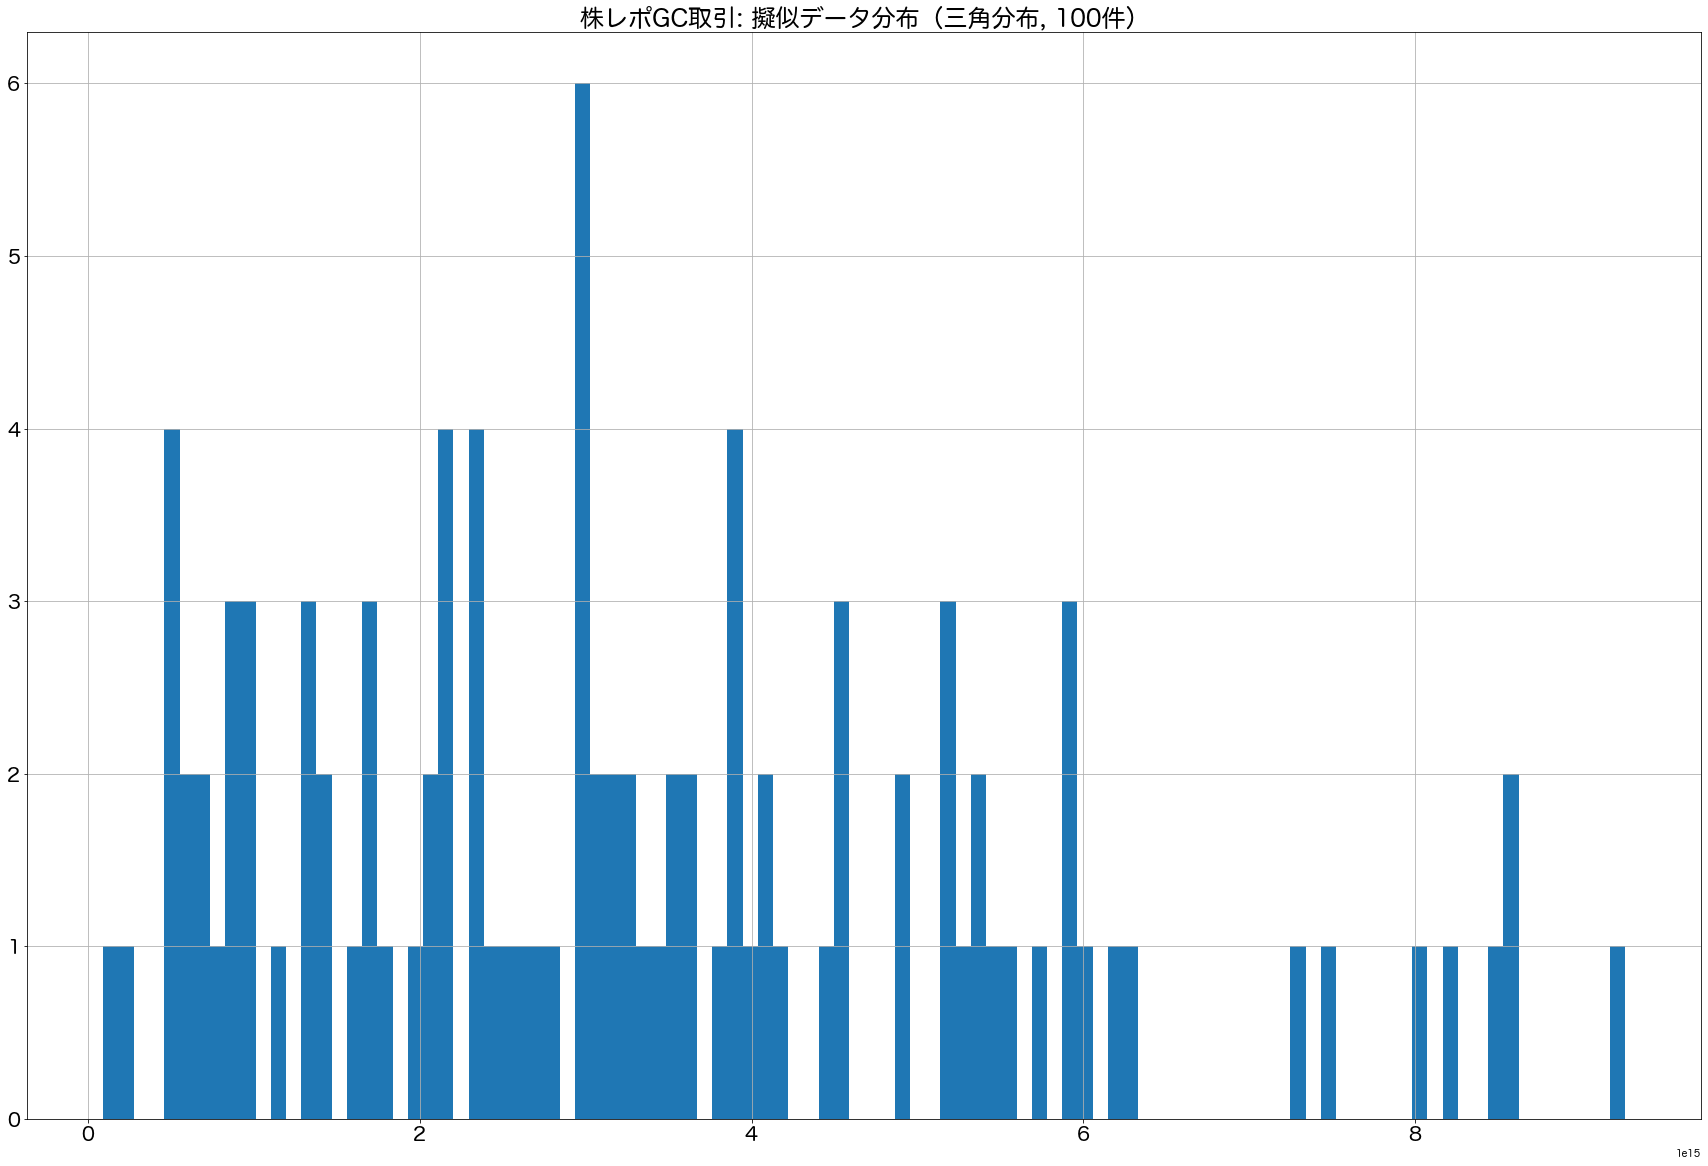

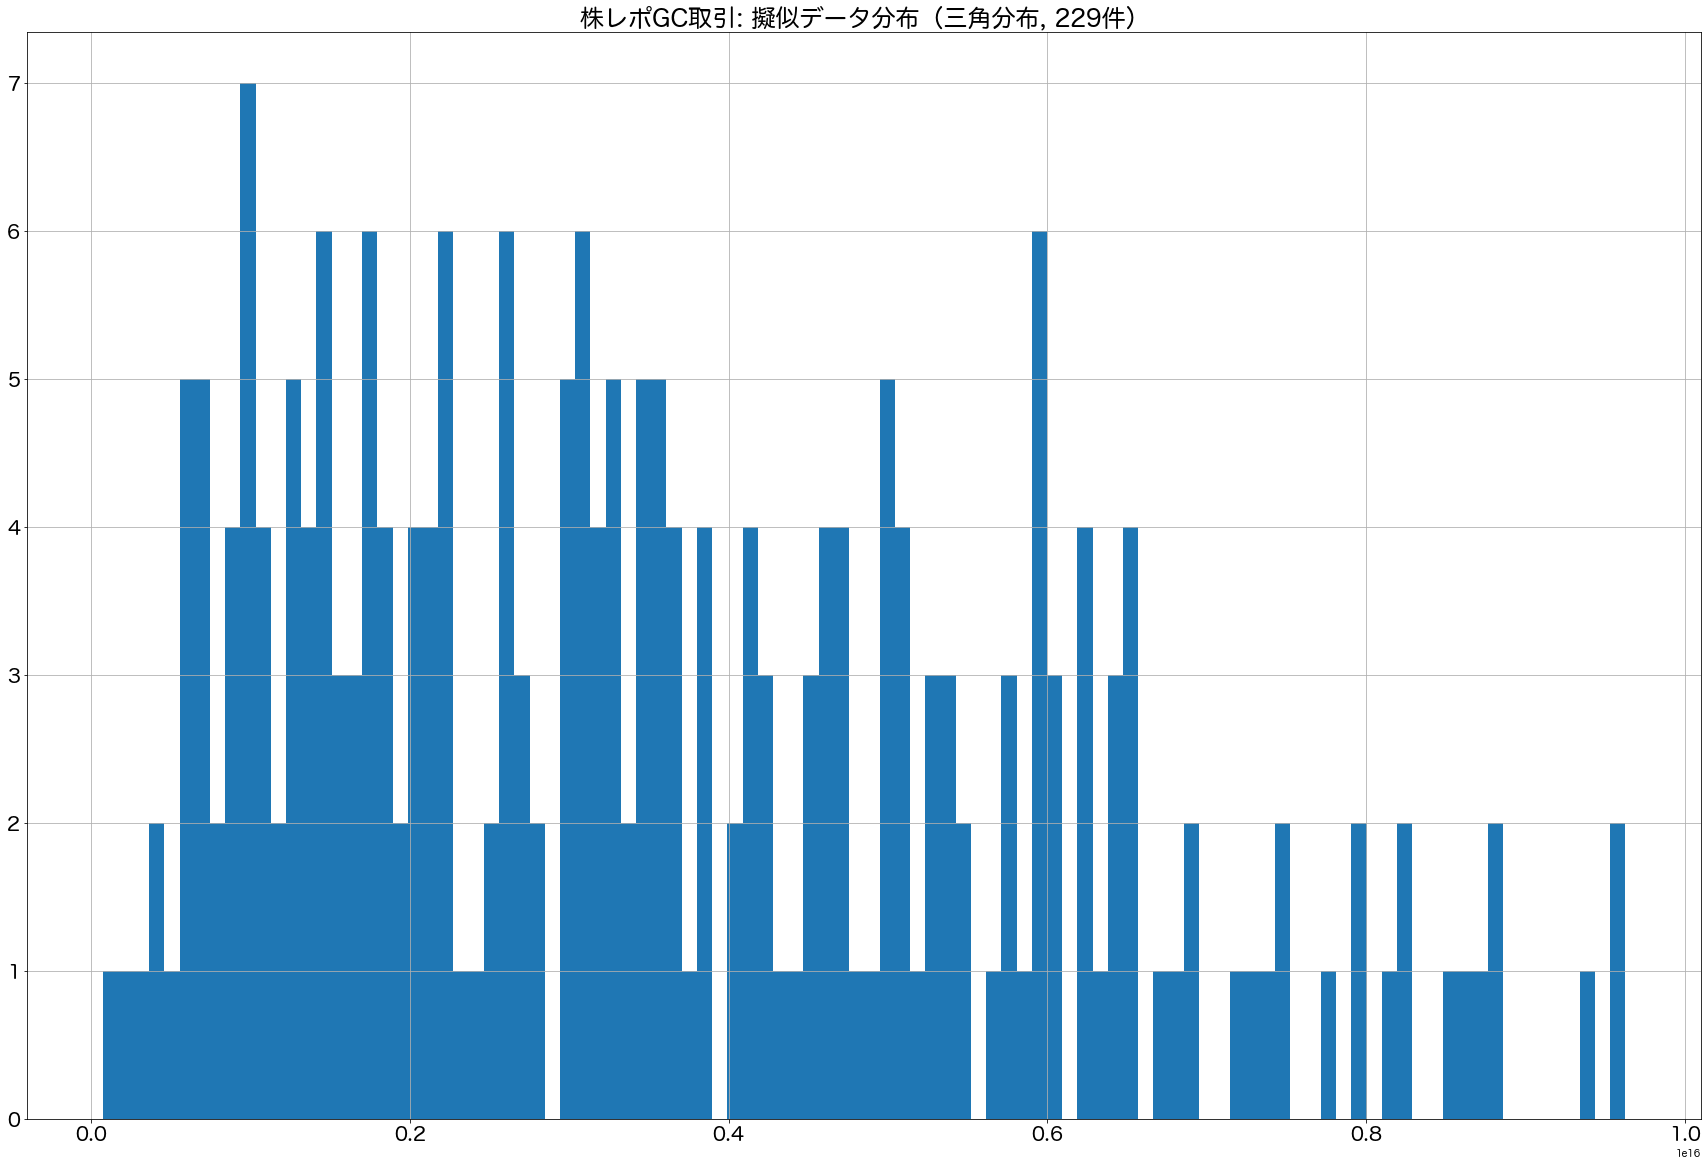

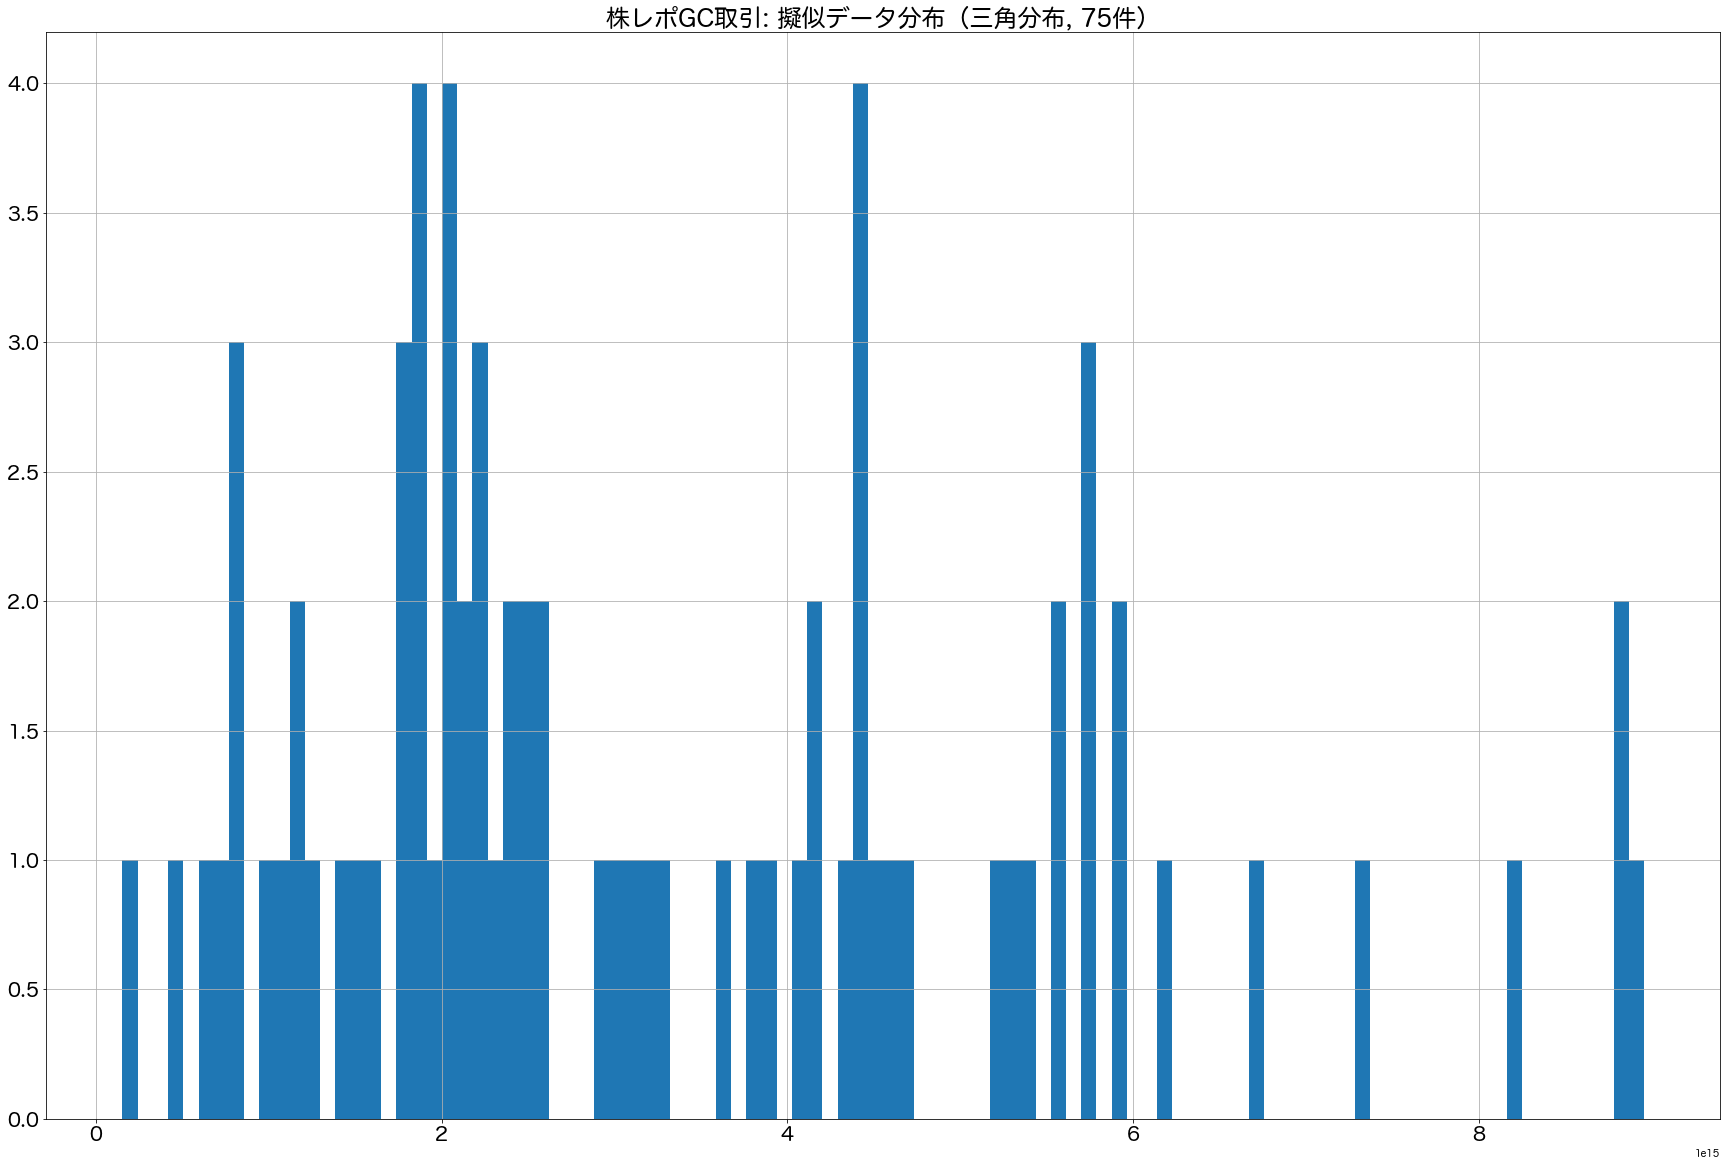

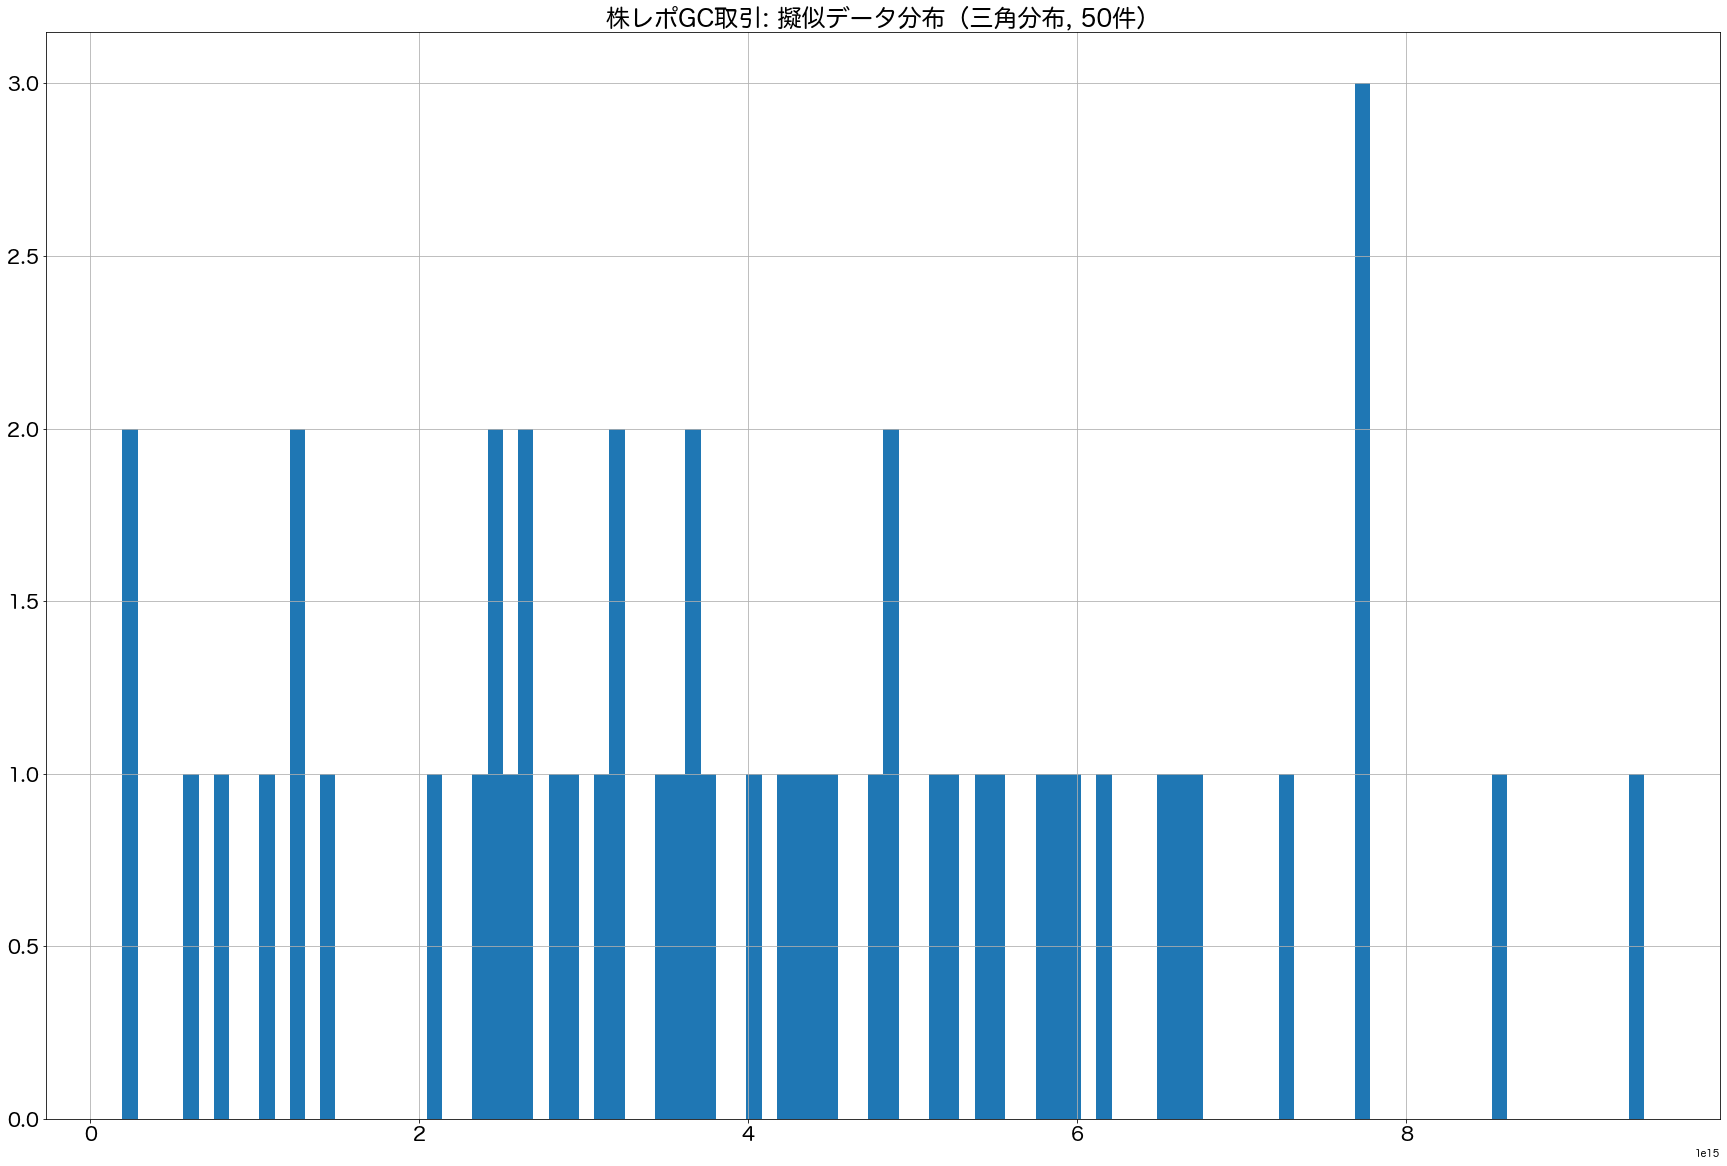

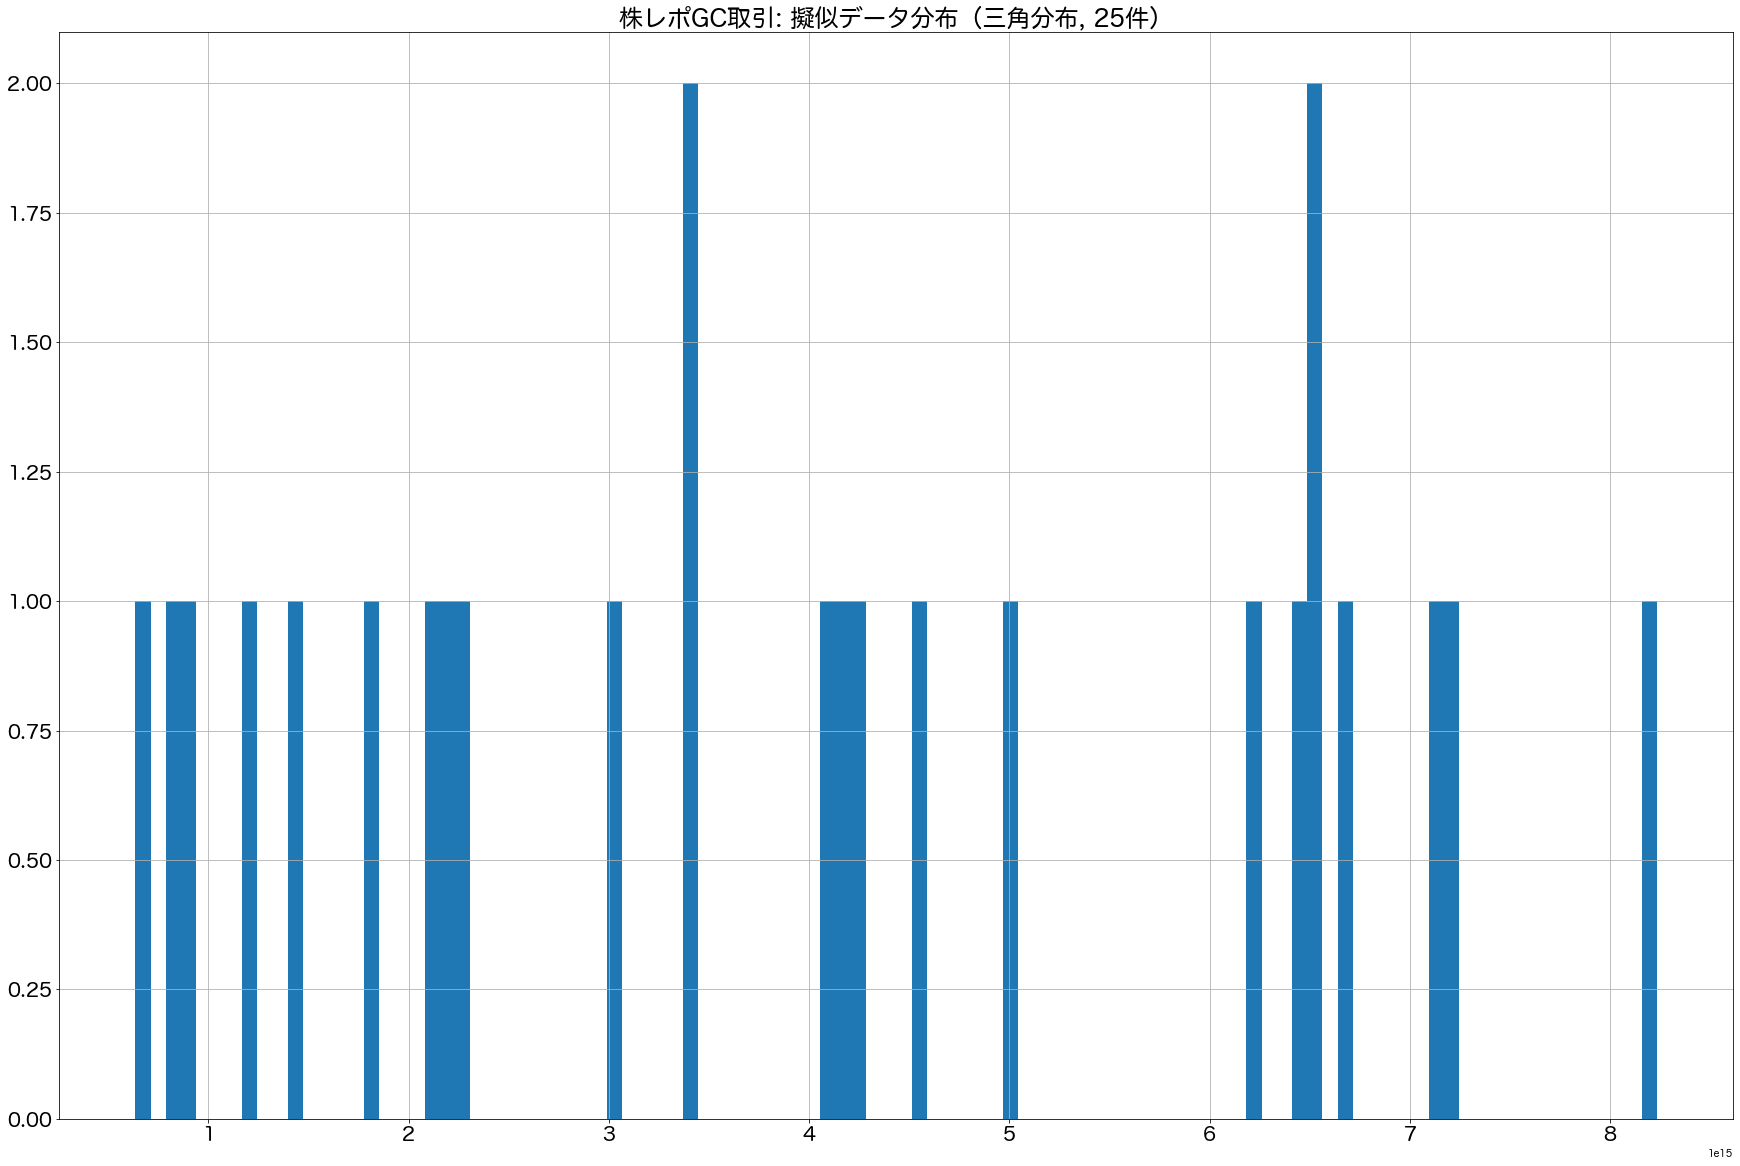

In [71]:
for _key, _value in additional_trade_nums.items():
    _num = _value['gc']
    all_price_dfs[_key]['gc'] = get_gc_price_df(_num)
all_price_dfs

#### 株レポSC取引

株レポ: SC取引金額
              1億円以内          1億円超          2億円超          5億円超         10億円超
ratio  7.400000e-01  9.000000e-02  1.100000e-01  4.000000e-02  2.000000e-02
min    1.000000e+03  1.000000e+08  2.000000e+08  5.000000e+08  1.000000e+09
max    1.000000e+08  2.000000e+08  5.000000e+08  1.000000e+09  1.000000e+10
株レポ: SC取引金額概観


<AxesSubplot:>

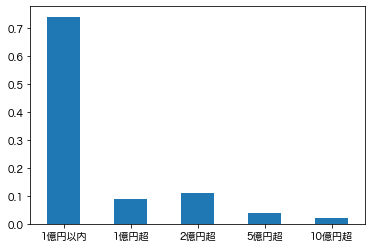

In [72]:
sc_price_column_labels = ['1億円以内', '1億円超', '2億円超', '5億円超', '10億円超']
sc_price_dist = pd.DataFrame([[0.74, 0.09, 0.11, 0.04, 0.02], [1.0e+3, 1.0e+8, 2.0e+8, 5.0e+8, 1.0e+9], [1.0e+8, 2.0e+8, 5.0e+8, 1.0e+9, 1.0e+10]],
                             columns=sc_price_column_labels,
                             index=['ratio', 'min', 'max'])
sc_price_ave = 1.34e+8
print('株レポ: SC取引金額')
pprint(sc_price_dist)
print('='*50)
print('株レポ: SC取引金額概観')
sc_price_dist.T['ratio'].plot(kind='bar', rot=0)

株レポ: SC取引金額ヒストグラム


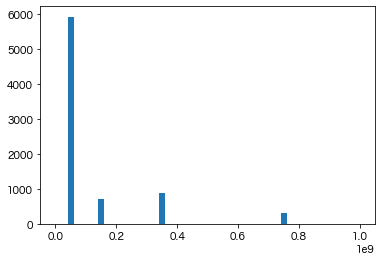

In [73]:
sc_trade_num = 8000
sc_ave_price_list = (sc_price_dist.T['min'] + sc_price_dist.T['max']) / 2
sc_sample = [[ave]*int(sc_price_dist.T['ratio'][index] * sc_trade_num)  for (index, ave) in enumerate(sc_ave_price_list)]
plt.hist(list(itertools.chain.from_iterable(sc_sample)), bins=50, range=(0, 1.0e+9))
print('株レポ: SC取引金額ヒストグラム')

In [74]:
def get_sc_price_df(trade_num):
    sc_price_max = sc_price_dist['10億円超']['max']
    sc_price_min = sc_price_dist['1億円以内']['min']
    mock_sc_price_df = pd.DataFrame(np.random.triangular(sc_price_min, sc_price_ave, sc_price_max, trade_num)) * 1.0e+5
    mock_sc_price_df.hist(bins=100, figsize=(30, 20))
    plt.title(f'株レポSC取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_sc_price_df

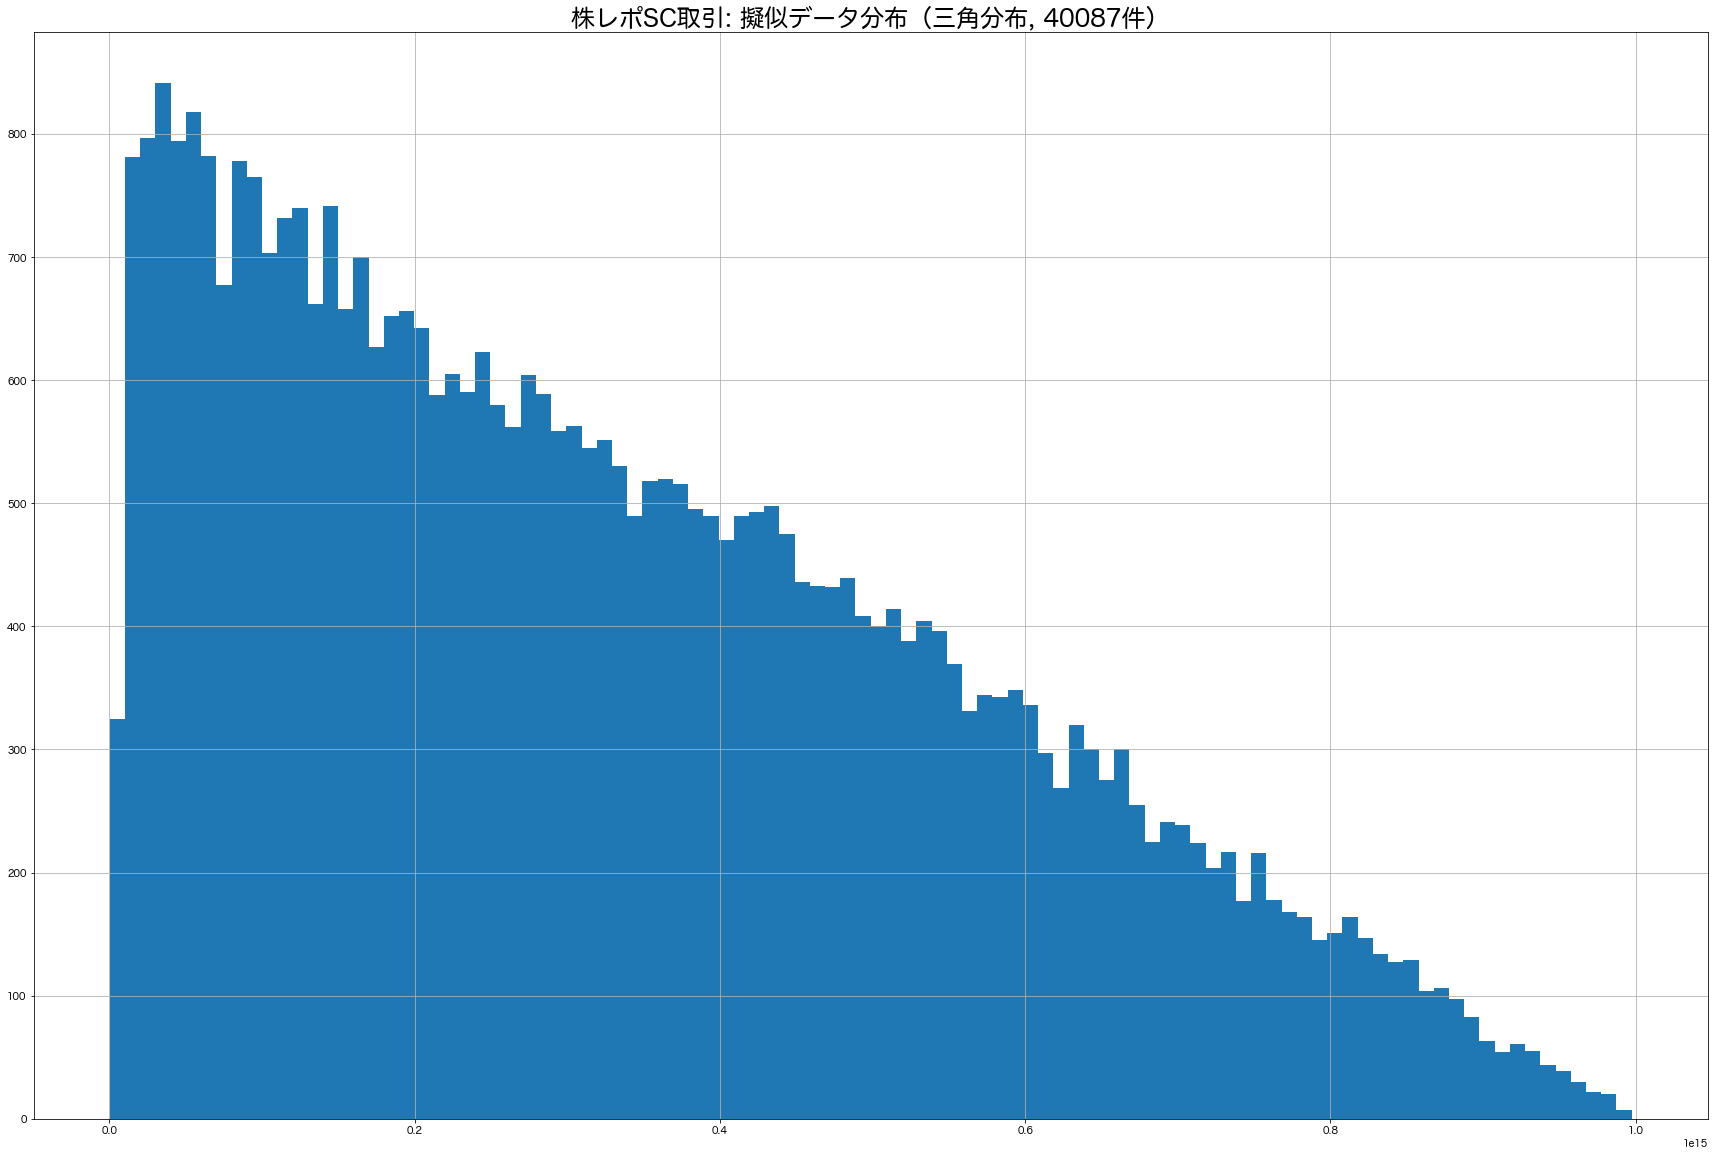

In [75]:
mock_sc_trade_8000_df = get_sc_price_df(b_trade_nums['100%']['sc'])

{'gc':                0
 0   1.305543e+15
 1   3.919978e+15
 2   2.045236e+15
 3   5.488349e+14
 4   7.337228e+15
 ..           ...
 95  2.981529e+15
 96  2.379813e+15
 97  1.395407e+15
 98  6.003573e+15
 99  5.484360e+14
 
 [100 rows x 1 columns],
 'sc':                 0
 0    2.884172e+13
 1    2.821792e+14
 2    7.626929e+13
 3    5.023568e+14
 4    1.290575e+14
 ..            ...
 638  4.933385e+14
 639  1.919241e+13
 640  3.927319e+14
 641  3.517978e+14
 642  3.738710e+14
 
 [643 rows x 1 columns]}

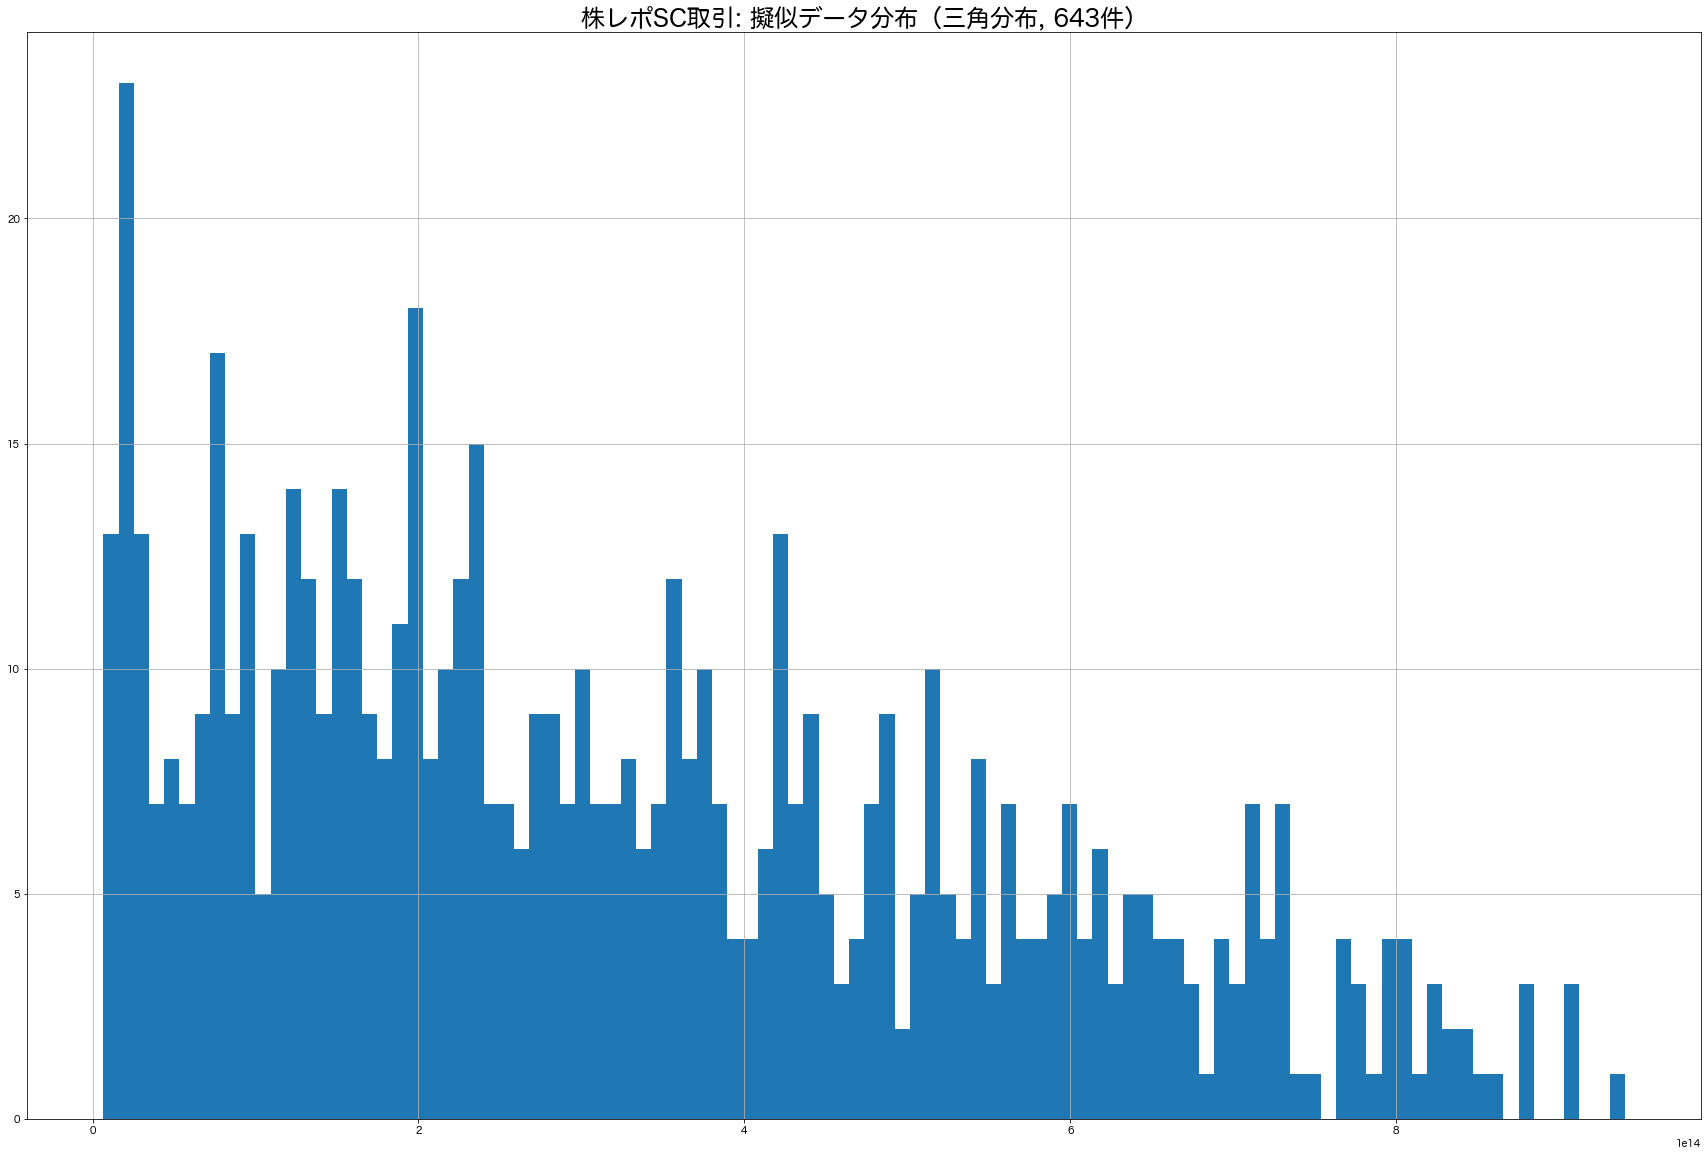

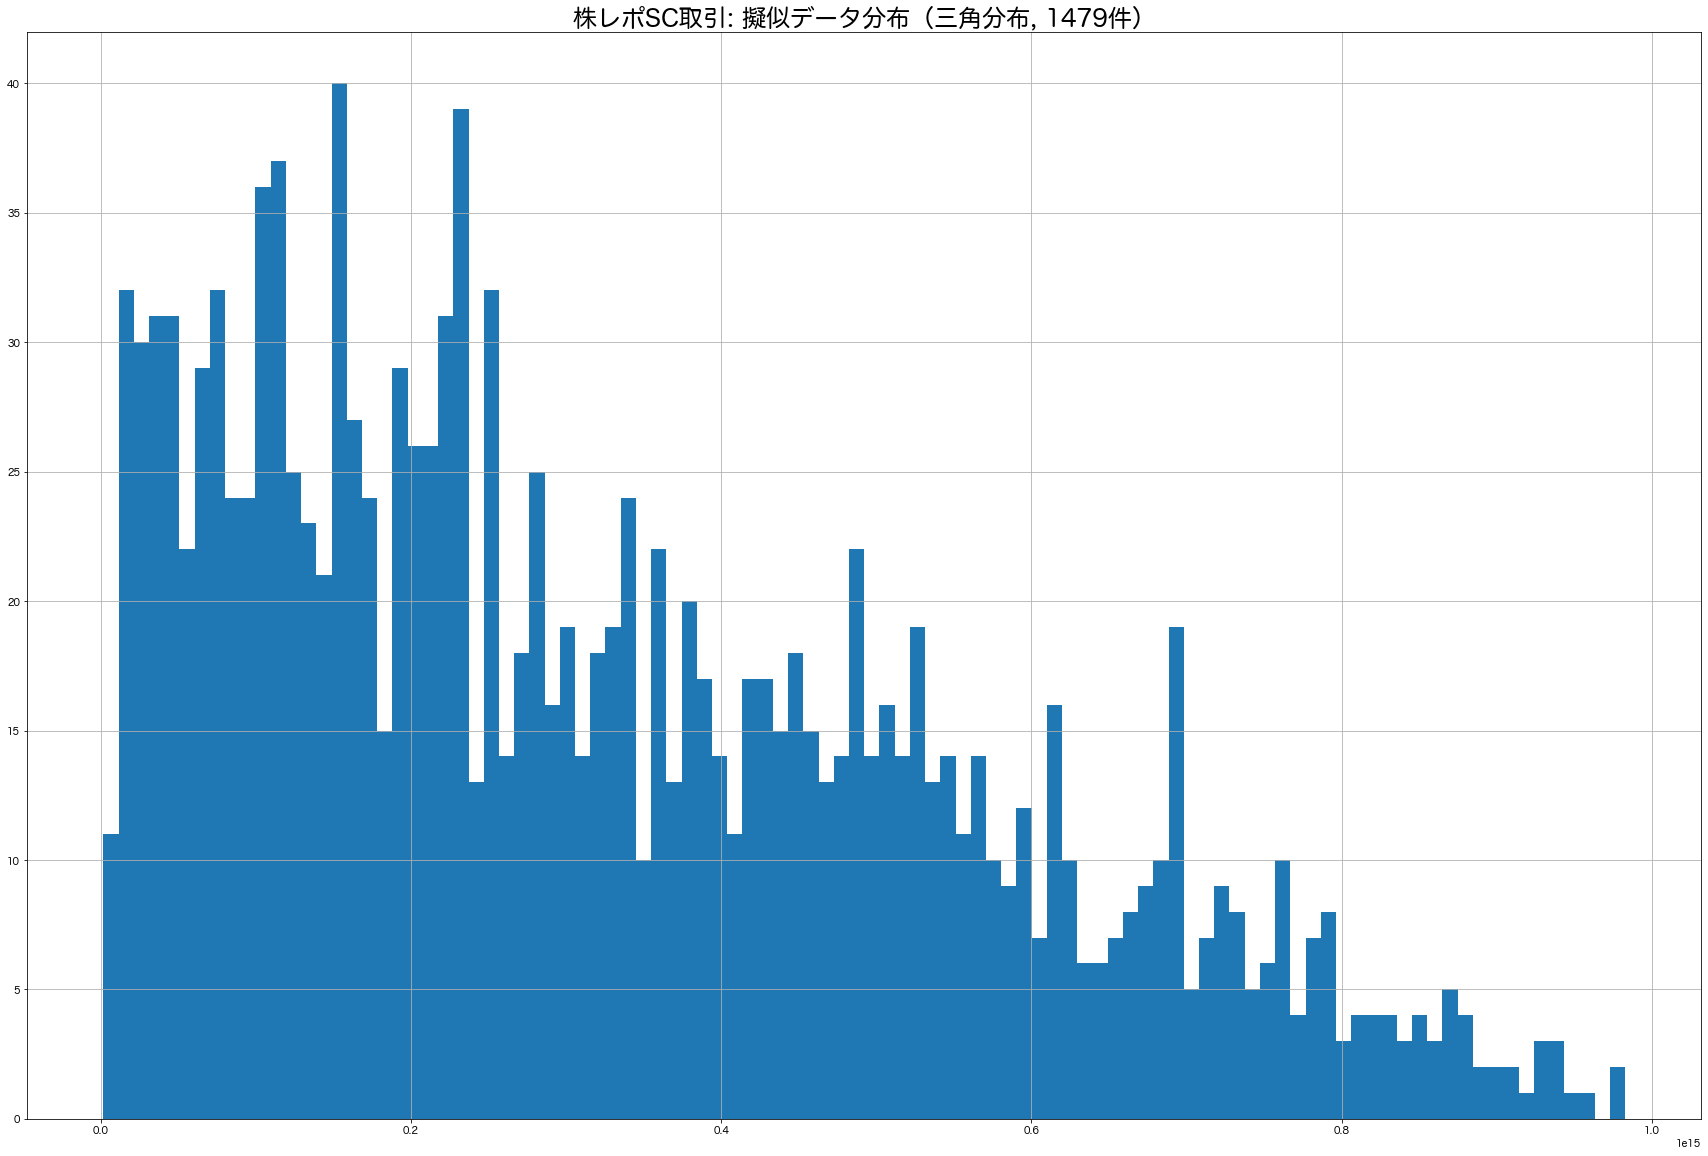

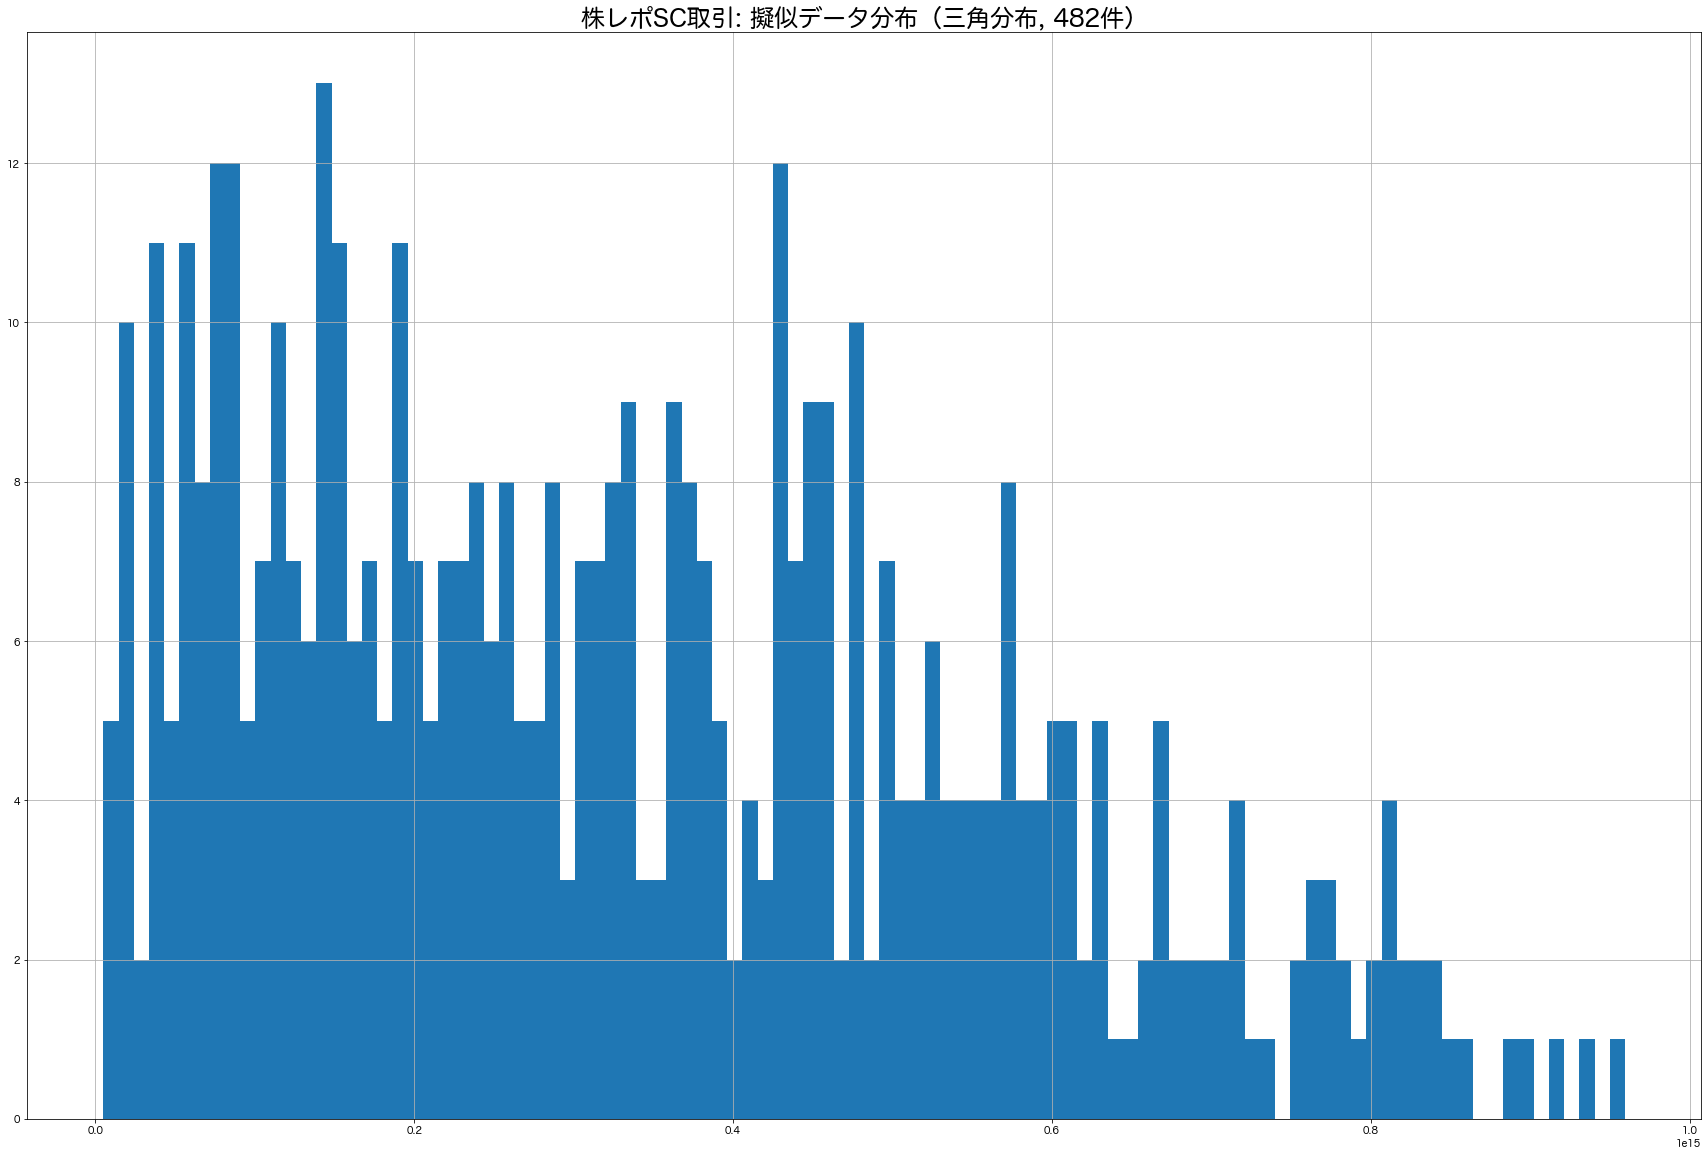

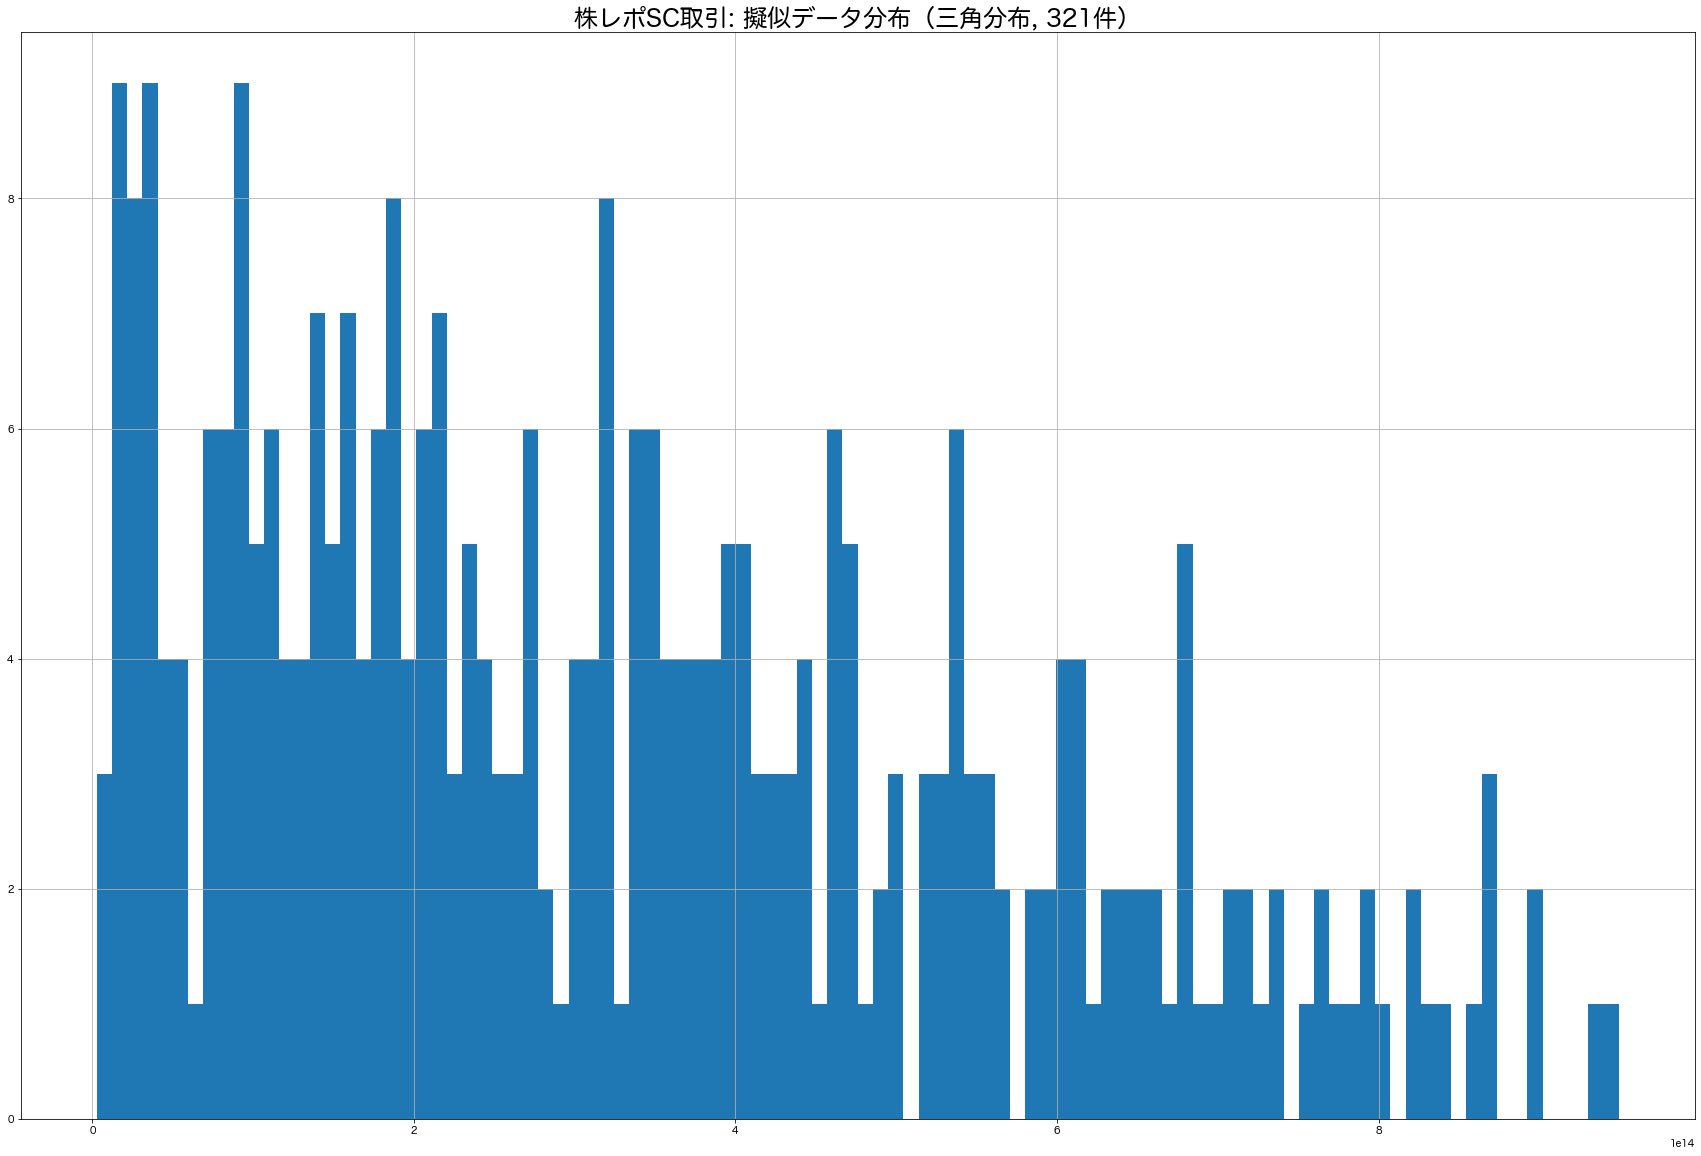

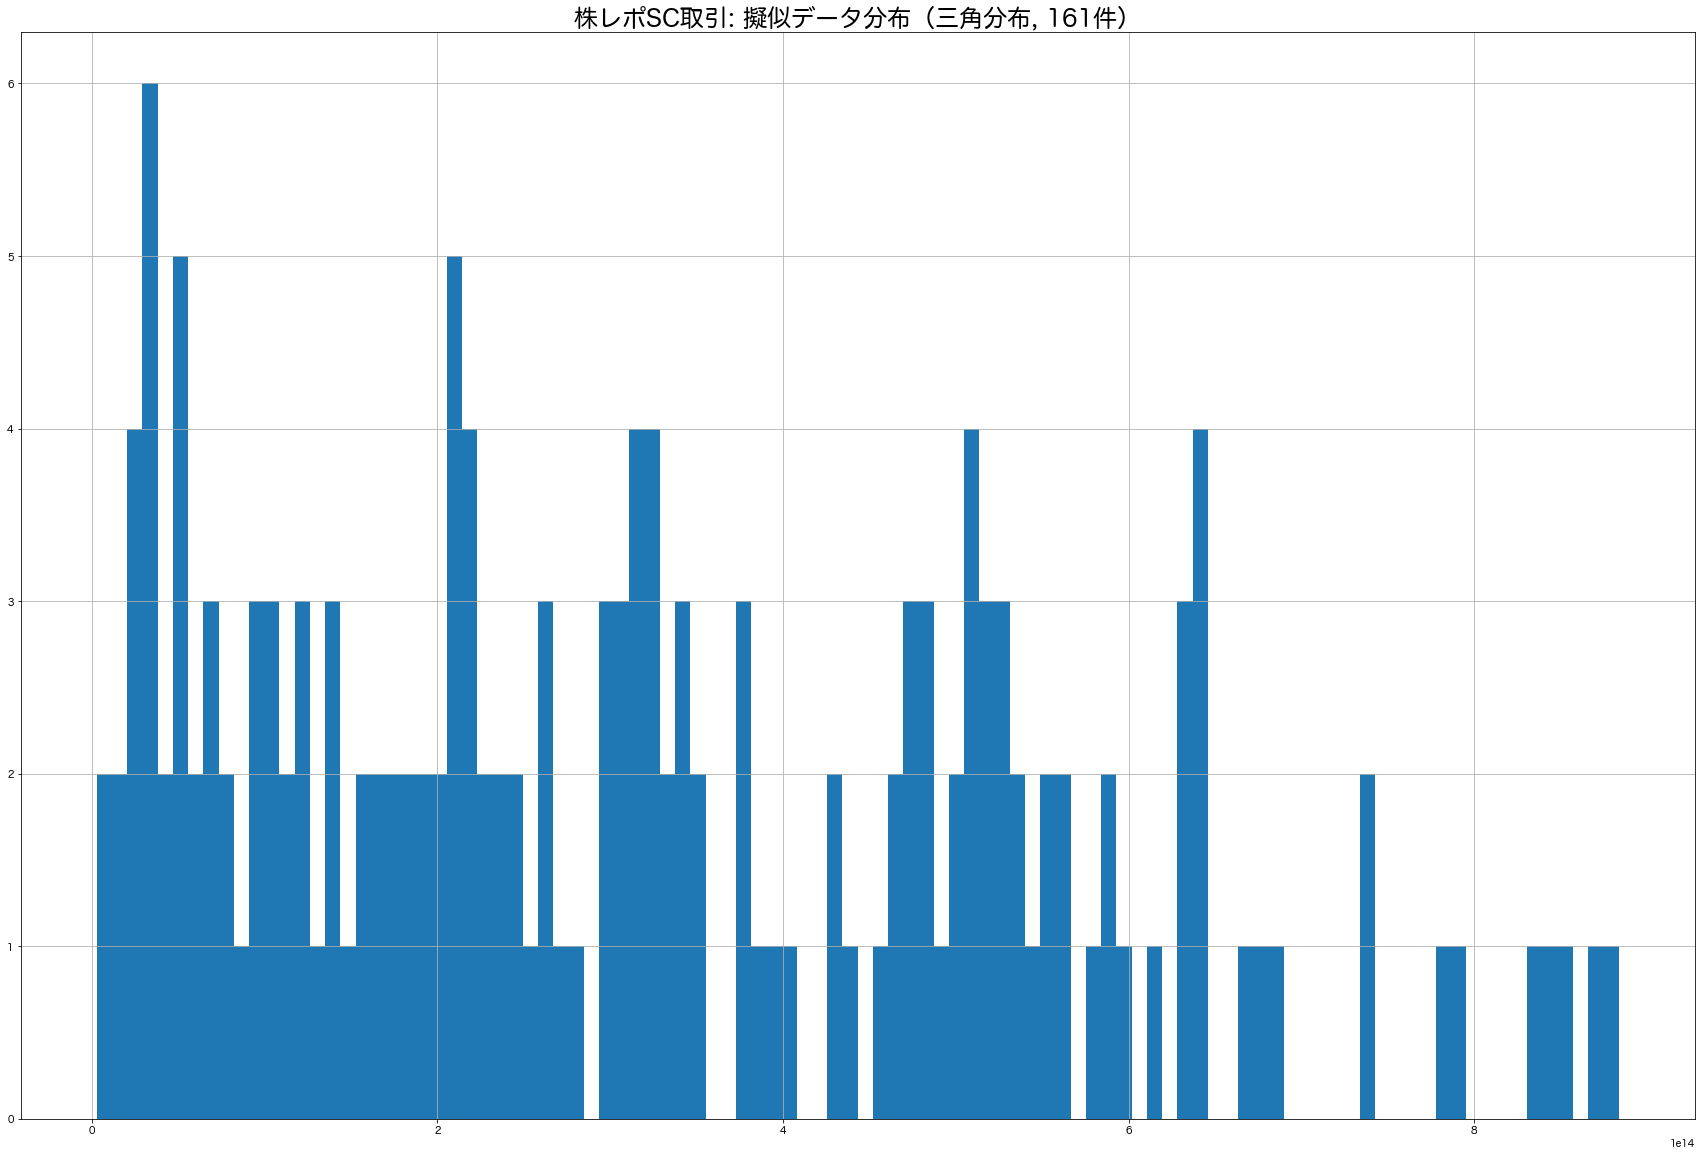

In [77]:
for _key, _value in additional_trade_nums.items():
    _num = _value['sc']
    all_price_dfs[_key]['sc'] = get_sc_price_df(_num)
all_price_dfs['4000']

#### 債券

債券レポ取引: 
             10億円以内         10億円超         50億円超        100億円超        500億円超
ratio  1.200000e-01  3.100000e-01  1.900000e-01  3.100000e-01  7.000000e-02
min    1.000000e+08  1.000000e+09  5.000000e+09  1.000000e+10  5.000000e+10
max    1.000000e+09  5.000000e+09  1.000000e+10  5.000000e+10  5.000000e+11


<AxesSubplot:title={'center':'債券レポ取引: 概観'}>

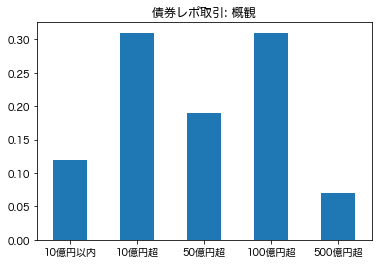

In [78]:
bond_price_column_labels = ['10億円以内', '10億円超', '50億円超', '100億円超', '500億円超']
bond_price_dist = pd.DataFrame([[0.12, 0.31, 0.19, 0.31, 0.07], [1.0e+8, 1.0e+9, 5.0e+9, 1.0e+10, 5.0e+10], [1.0e+9, 5.0e+9, 1.0e+10, 5.0e+10, 5.0e+11]],
                             columns=bond_price_column_labels,
                             index=['ratio', 'min', 'max'])
bond_price_ave = 113.0e+8
print('債券レポ取引: ')
pprint(bond_price_dist)
print('='*50)

plt.title('債券レポ取引: 概観')
bond_price_dist.T['ratio'].plot(kind='bar', rot=0)

債券レポ: 取引金額ヒストグラム


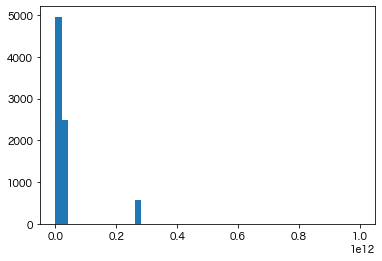

In [79]:
bond_trade_num = 8000
bond_ave_price_list = (bond_price_dist.T['min'] + bond_price_dist.T['max']) / 2
bond_sample = [[ave]*int(bond_price_dist.T['ratio'][index] * bond_trade_num)  for (index, ave) in enumerate(bond_ave_price_list)]
plt.hist(list(itertools.chain.from_iterable(bond_sample)), bins=50, range=(0, 1.0e+12))
print('債券レポ: 取引金額ヒストグラム')

In [80]:
def get_bond_price_df(trade_num):
    bond_price_max = bond_price_dist['500億円超']['max']
    bond_price_min = bond_price_dist['10億円以内']['min']
    mock_bond_price_df = pd.DataFrame(np.random.triangular(bond_price_min, bond_price_ave, bond_price_max, trade_num)) * 1.0e+5
    mock_bond_price_df.hist(bins=100, figsize=(30, 20))
    plt.title(f'債券レポ取引: 擬似データ分布（三角分布, {trade_num}件）', fontsize=24)
    return mock_bond_price_df

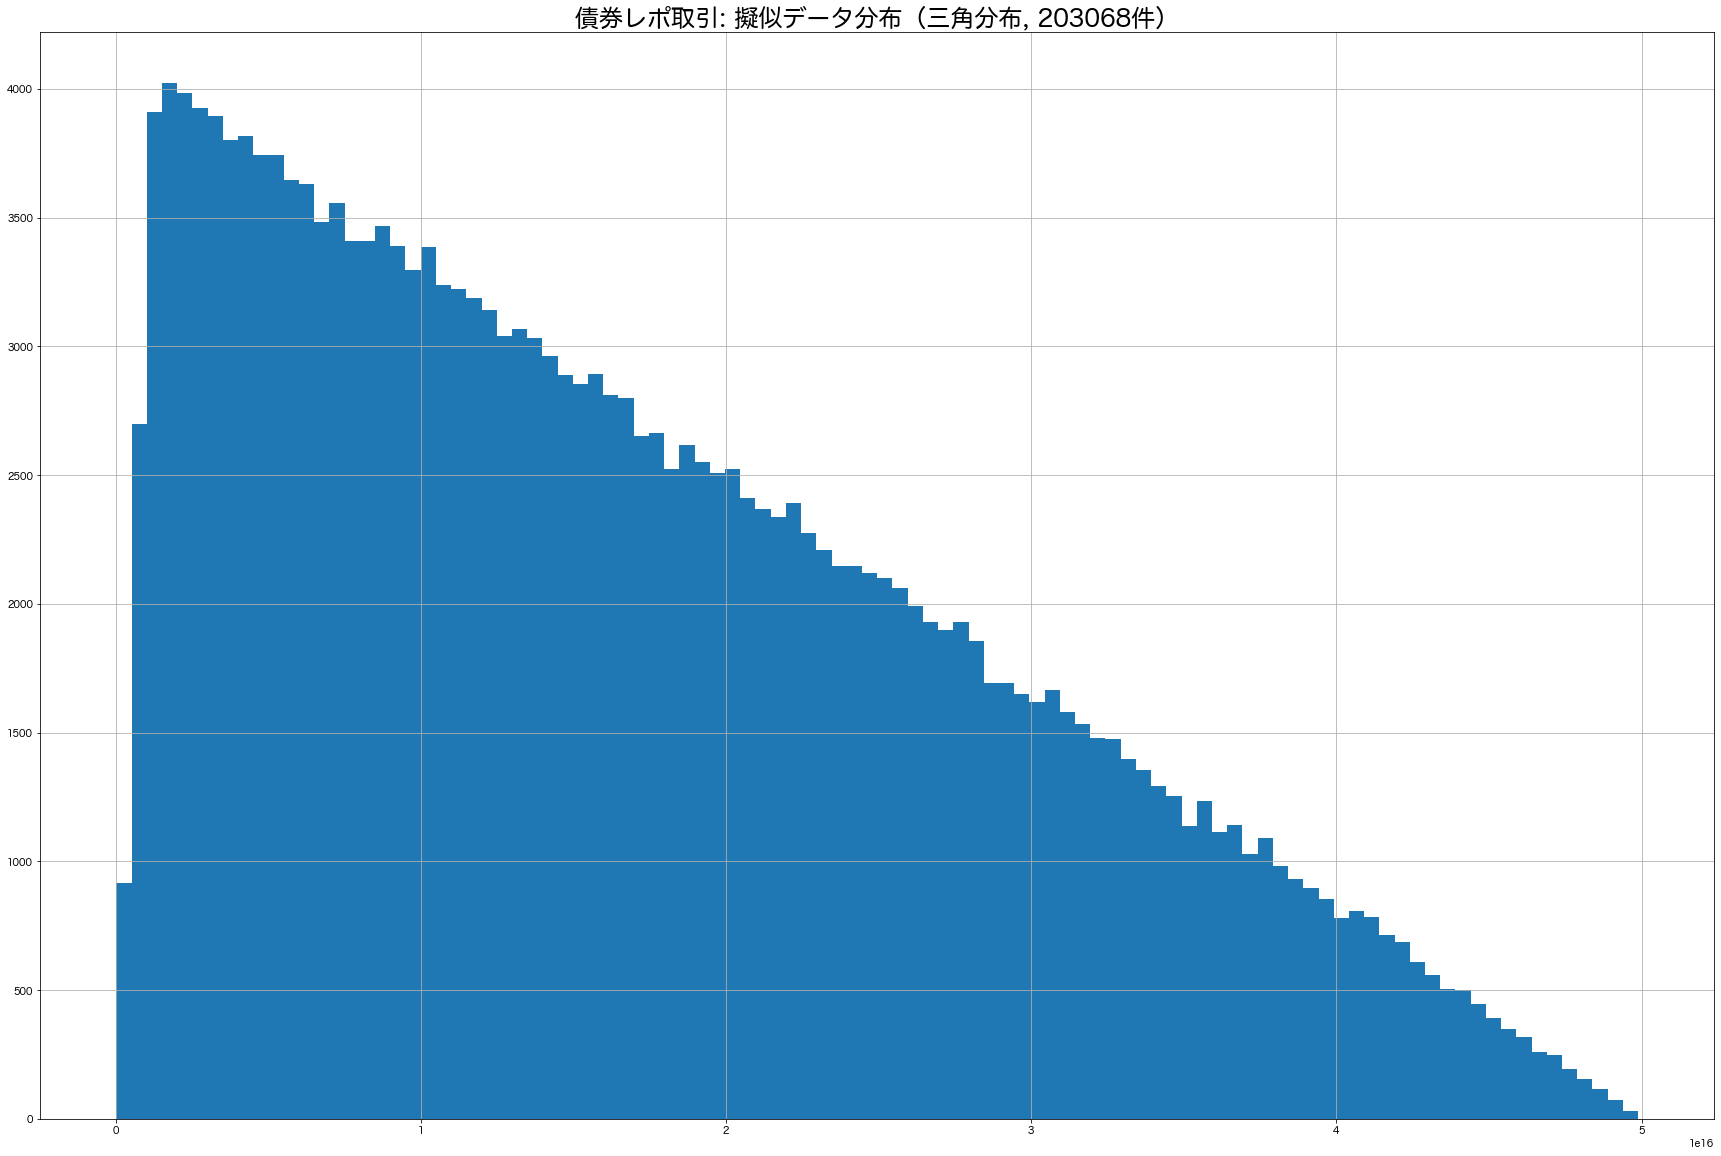

In [81]:
mock_bond_trade_8000_df = get_bond_price_df(b_trade_nums['100%']['bond'])

{'gc':                0
 0   1.305543e+15
 1   3.919978e+15
 2   2.045236e+15
 3   5.488349e+14
 4   7.337228e+15
 ..           ...
 95  2.981529e+15
 96  2.379813e+15
 97  1.395407e+15
 98  6.003573e+15
 99  5.484360e+14
 
 [100 rows x 1 columns],
 'sc':                 0
 0    2.884172e+13
 1    2.821792e+14
 2    7.626929e+13
 3    5.023568e+14
 4    1.290575e+14
 ..            ...
 638  4.933385e+14
 639  1.919241e+13
 640  3.927319e+14
 641  3.517978e+14
 642  3.738710e+14
 
 [643 rows x 1 columns],
 'bond':                  0
 0     2.516920e+15
 1     1.581045e+16
 2     1.842930e+16
 3     6.244085e+15
 4     1.308604e+16
 ...            ...
 3252  1.351776e+16
 3253  2.165545e+16
 3254  3.268575e+16
 3255  2.791018e+15
 3256  1.692265e+16
 
 [3257 rows x 1 columns]}

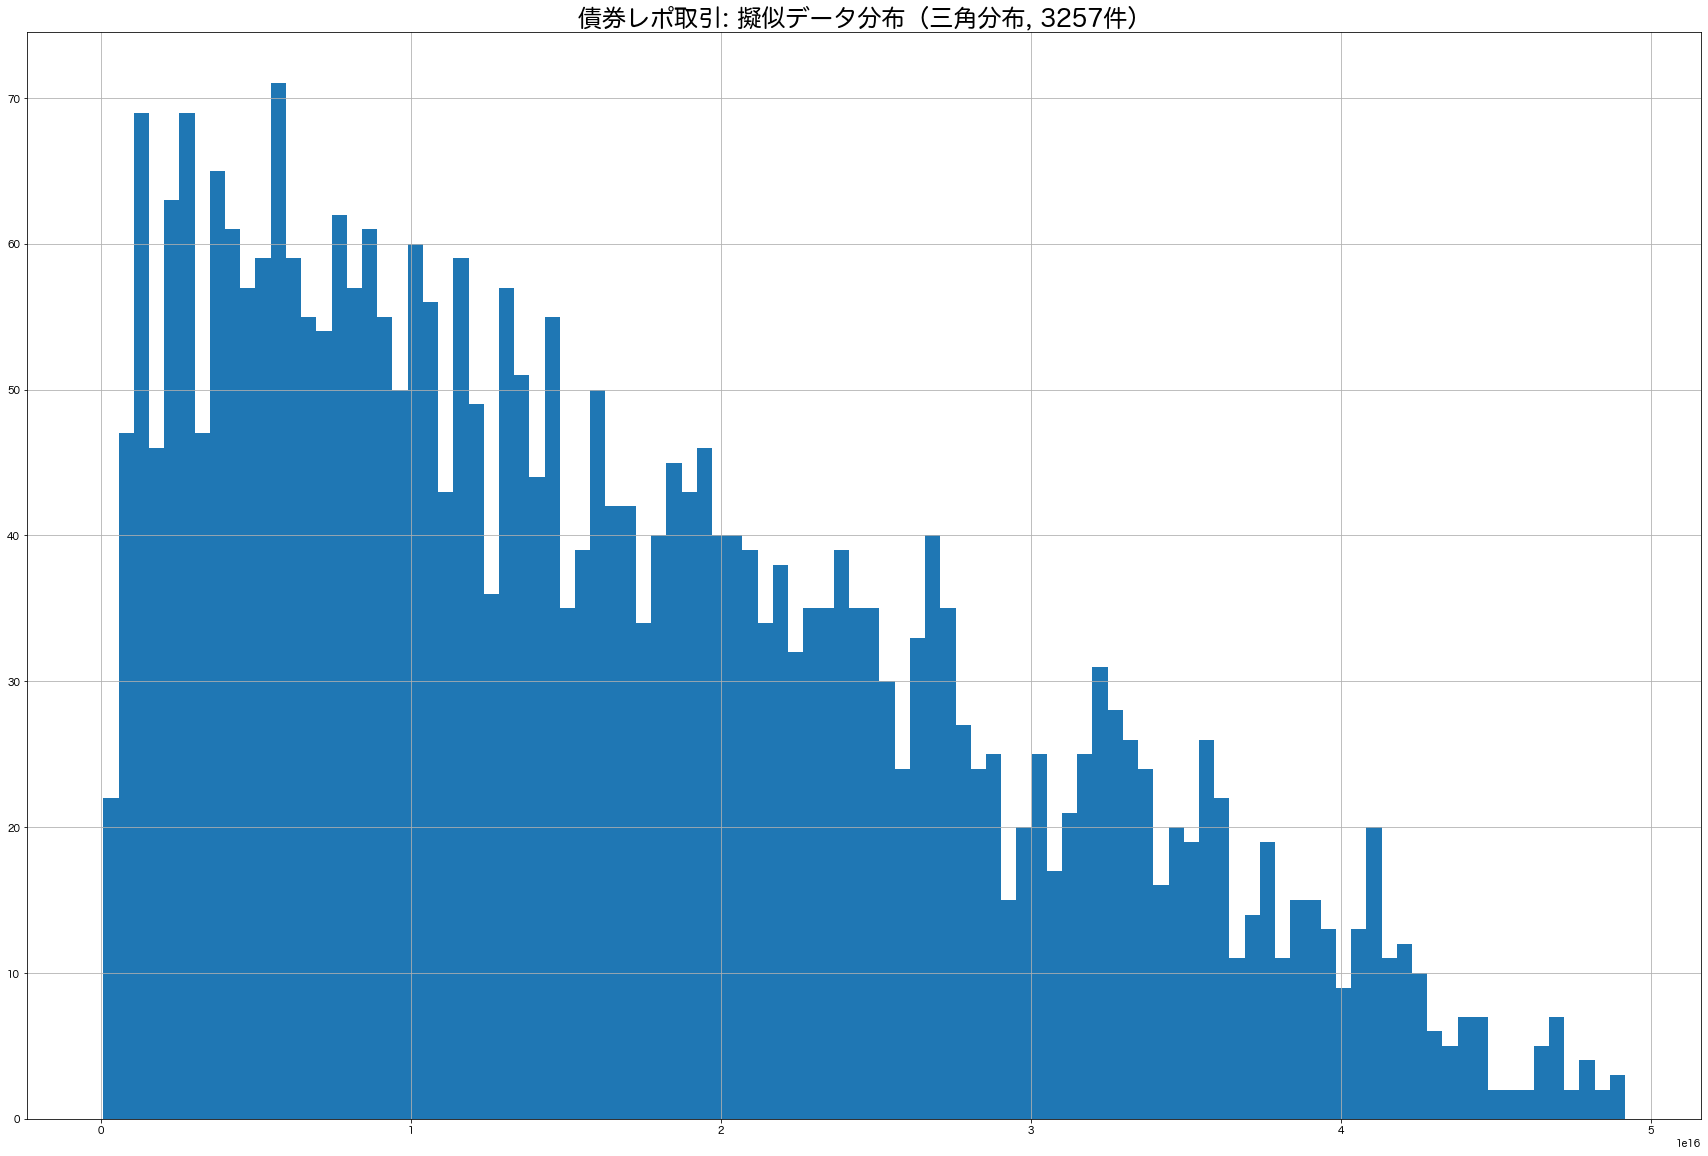

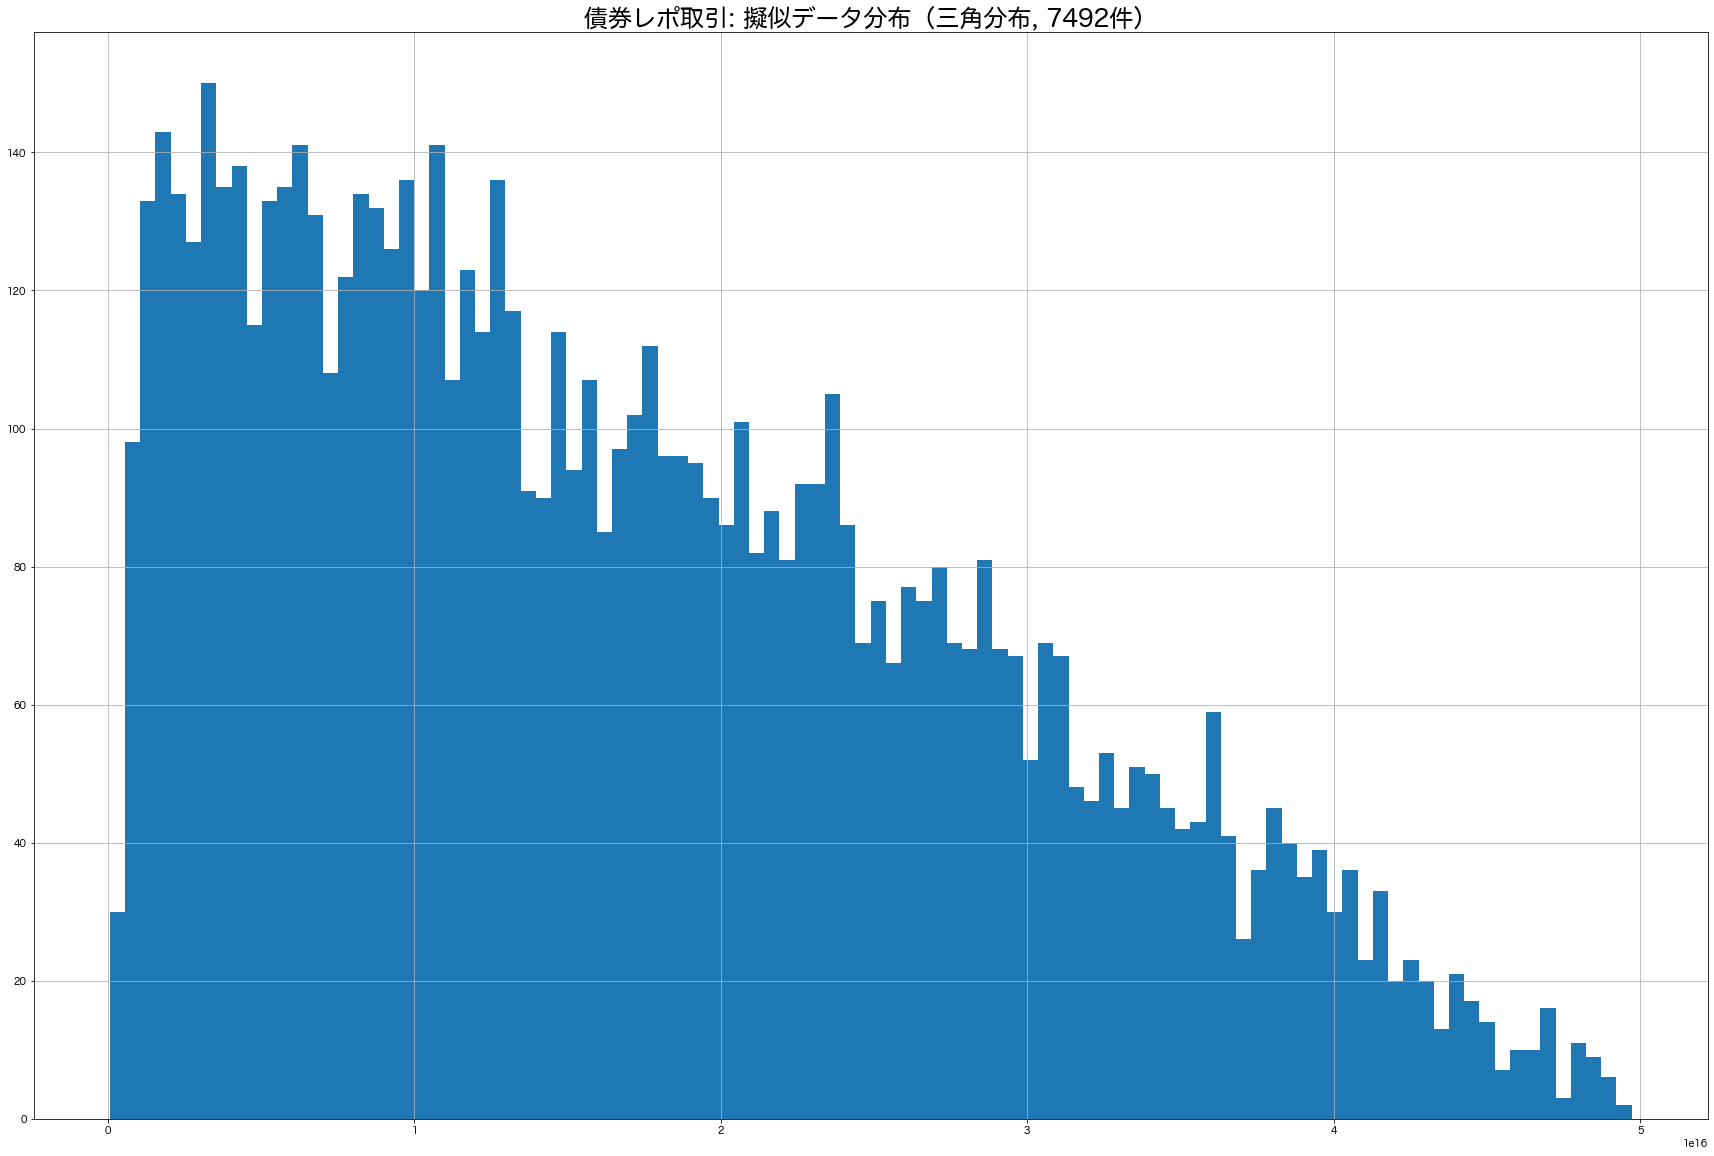

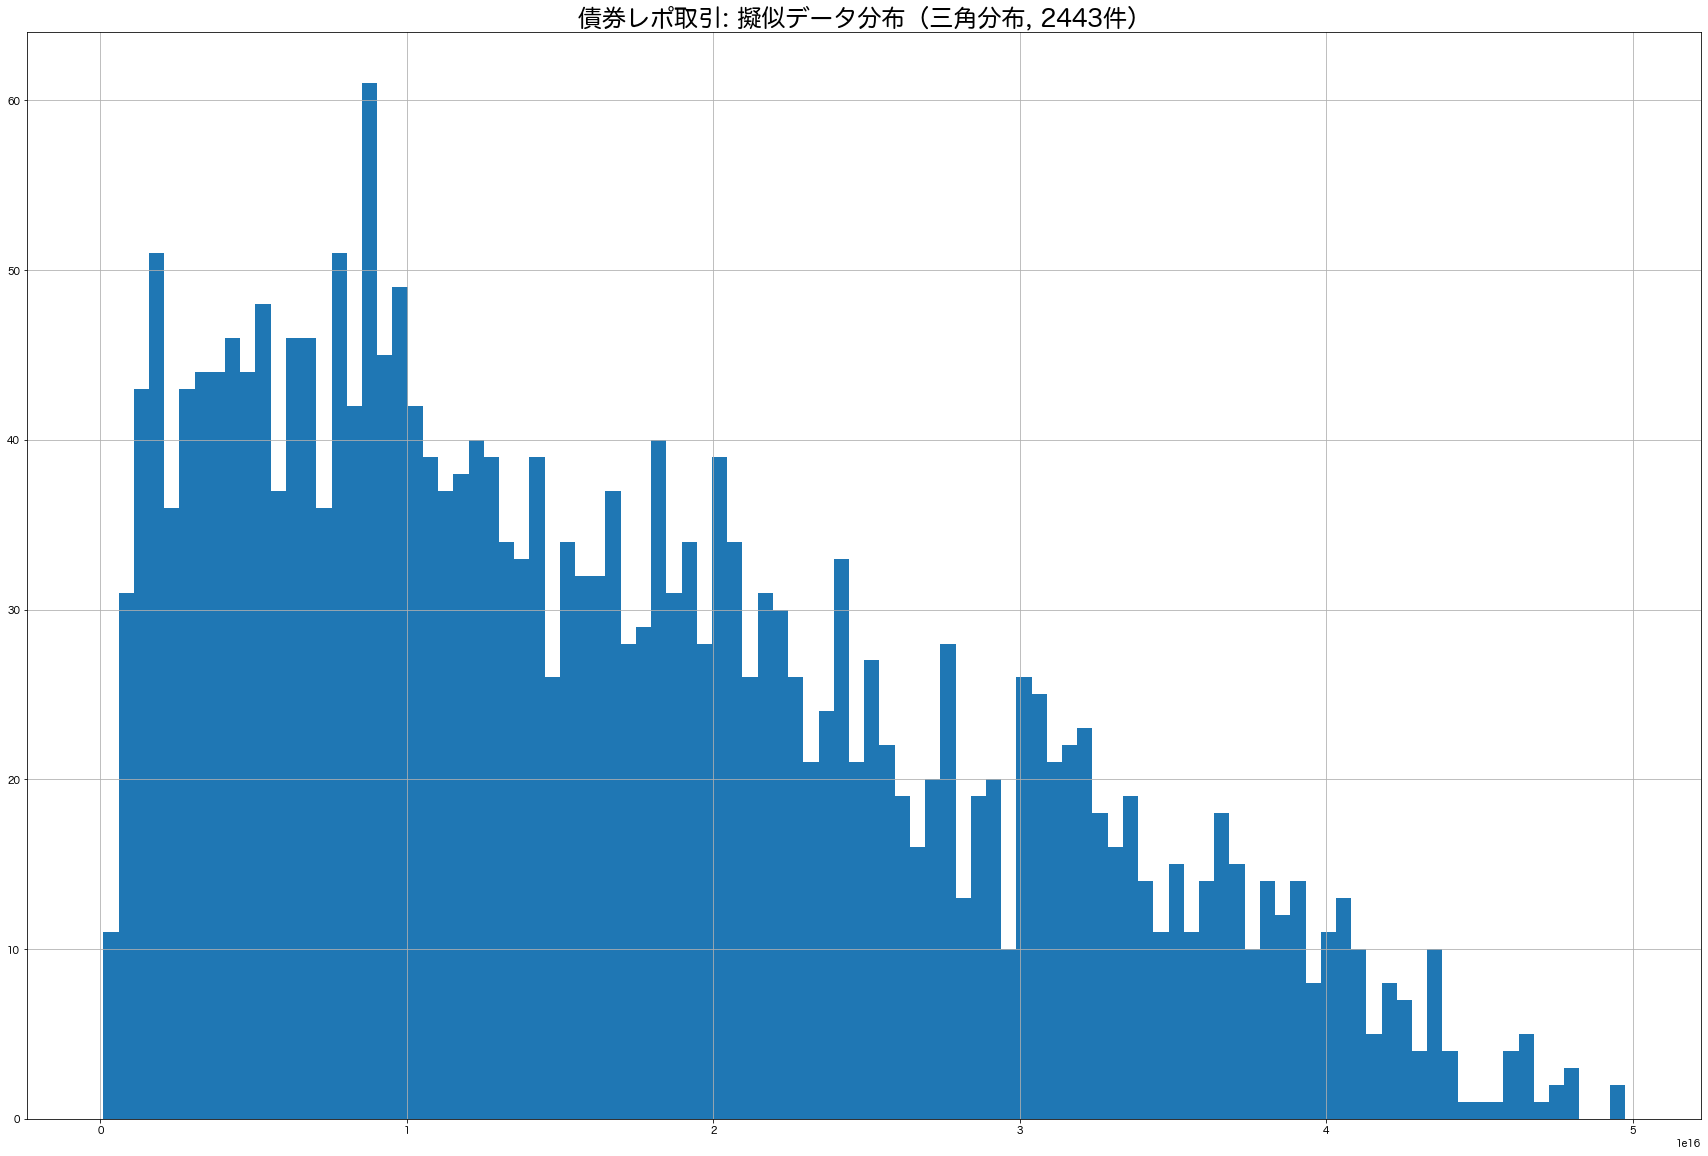

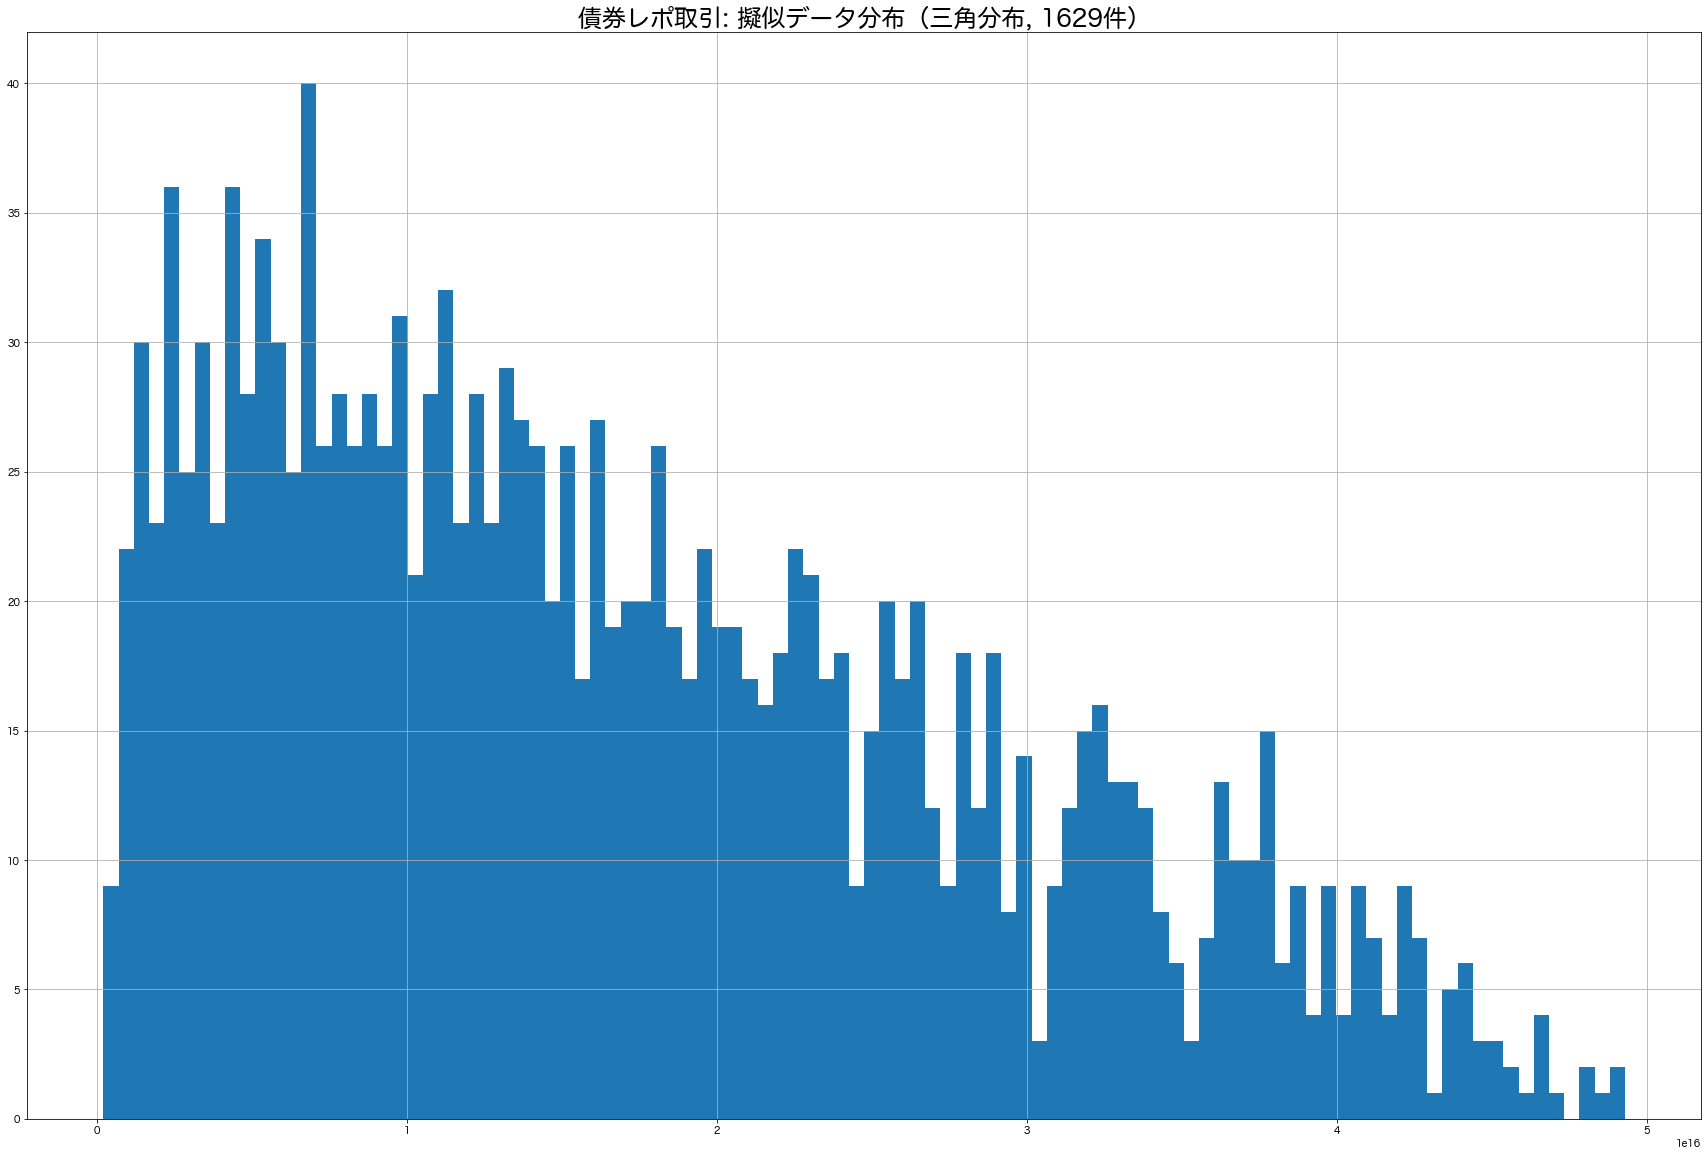

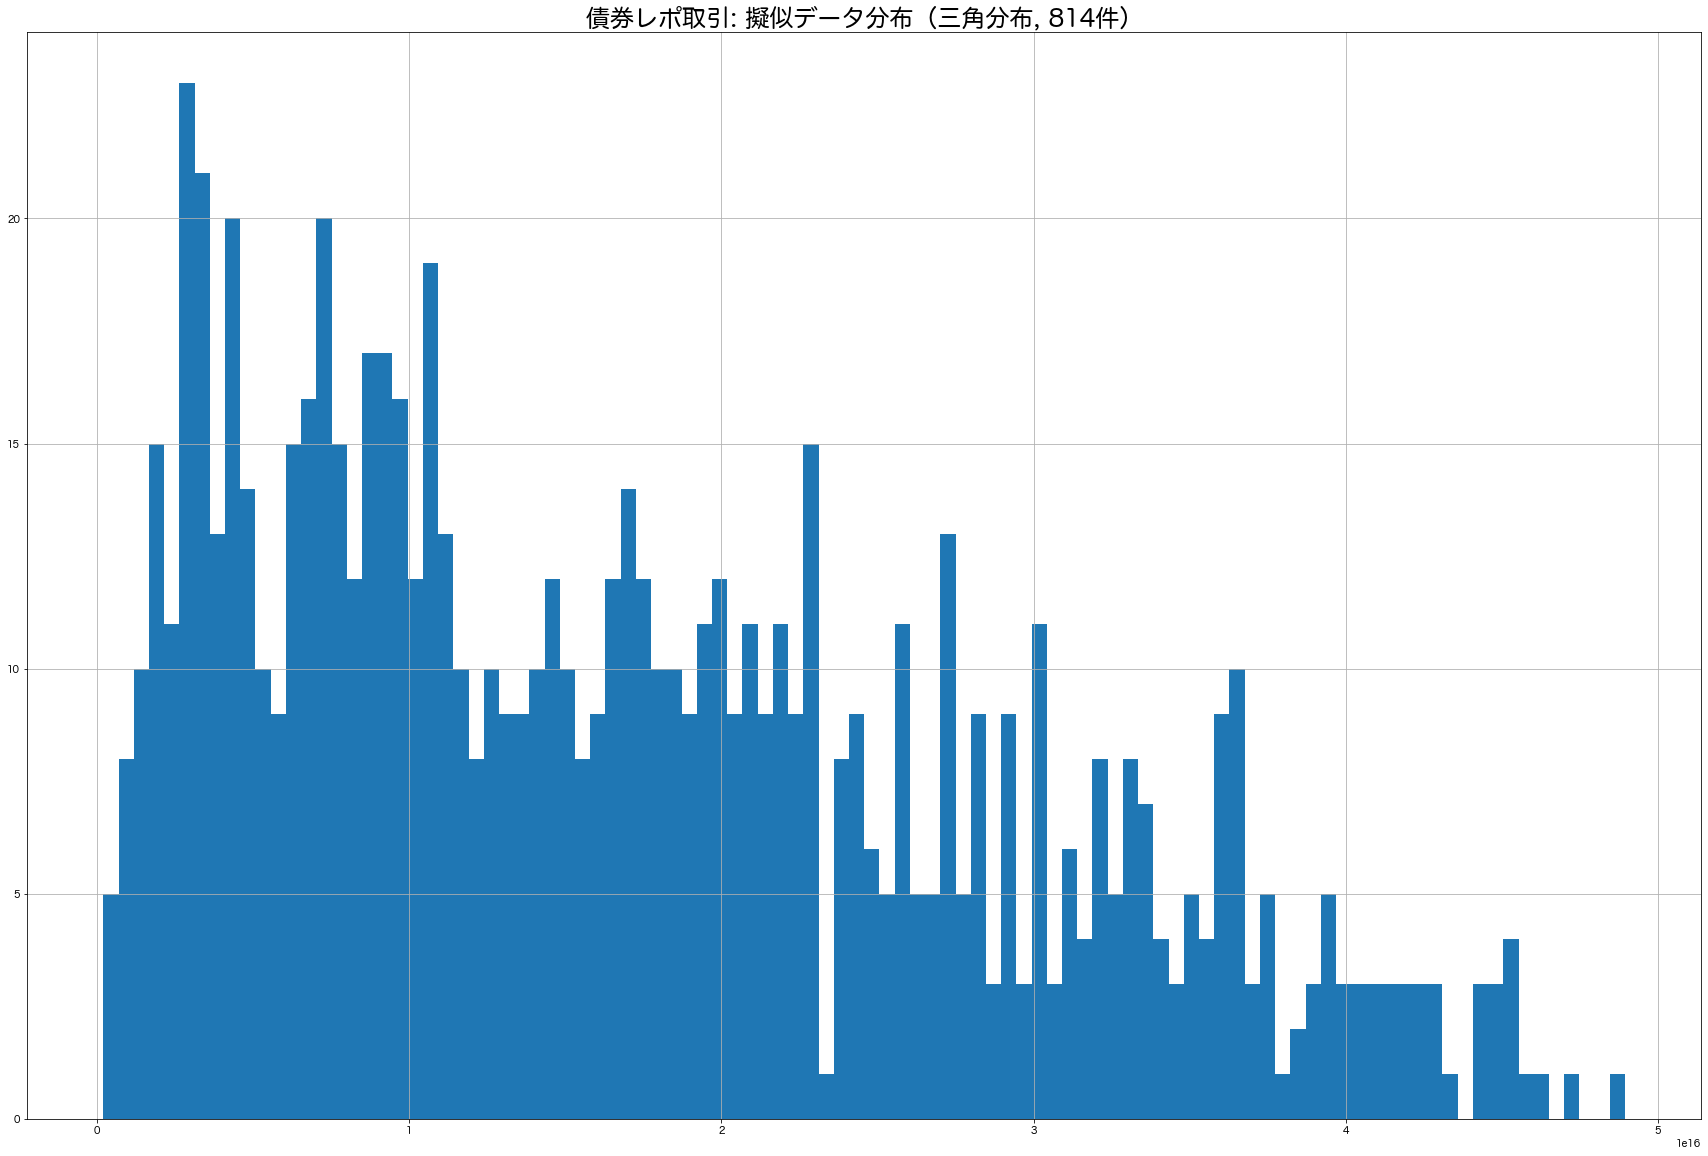

In [82]:
for _key, _value in additional_trade_nums.items():
    _num = _value['bond']
    all_price_dfs[_key]['bond'] = get_bond_price_df(_num)
all_price_dfs['4000']

### Number of securities per trade

In [83]:
# security_num_df を格納するobjの初期化
all_security_num_dfs = {
    '4000': {},
    '9200': {},
    '3000': {},
    '2000': {},
    '1000': {},
}

#### GC取引

株レポ: GC取引銘柄数
         1   2~10  11~50  51~100    101~
ratio  0.1   0.45    0.3     0.1    0.05
min    1.0   2.00   11.0    51.0  101.00
max    1.0  10.00   50.0   100.0  200.00


Text(0.5, 1.0, '株レポGC取引: 銘柄数')

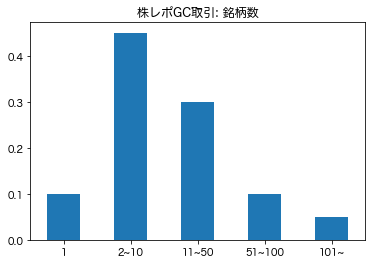

In [84]:
security_num_column_labels = ['1', '2~10', '11~50', '51~100', '101~']
gc_security_num_dist = pd.DataFrame([[0.1, 0.45, 0.3, 0.1, 0.05], [1, 2, 11, 51, 101], [1, 10, 50, 100, 200]],
                             columns=security_num_column_labels,
                             index=['ratio', 'min', 'max'])
gc_security_num_ave = 24.55
print('株レポ: GC取引銘柄数')
pprint(gc_security_num_dist)
print('='*50)

gc_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('株レポGC取引: 銘柄数')

Text(0.5, 1.0, '株レポGC取引: ヒストグラム')

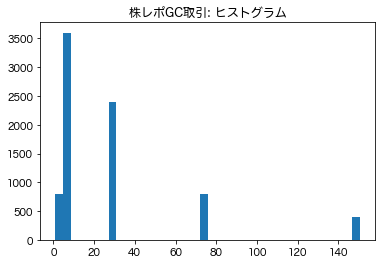

In [85]:
gc_trade_num = 8000
gc_ave_security_num_list = (gc_security_num_dist.T['min'] + gc_security_num_dist.T['max']) / 2
gc_security_num_sample = [[ave]*int(gc_security_num_dist.T['ratio'][index] * gc_trade_num)  for (index, ave) in enumerate(gc_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(gc_security_num_sample)), bins=40)
plt.title('株レポGC取引: ヒストグラム')

In [86]:
def get_gc_num_df(trade_num):
    gc_security_num_max = gc_security_num_dist['101~']['max']
    gc_security_num_min = gc_security_num_dist['1']['min'] - 1
    mock_gc_security_num_df = pd.DataFrame(np.ceil(np.random.triangular(gc_security_num_min, gc_security_num_ave, gc_security_num_max, trade_num)), dtype=int)
    mock_gc_security_num_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title('株レポGC取引: 擬似データ分布（三角分布）')
    return mock_gc_security_num_df

,0
0,107
1,35
2,72
3,56
4,49
...,...
1753,56
1754,54
1755,157
1756,145


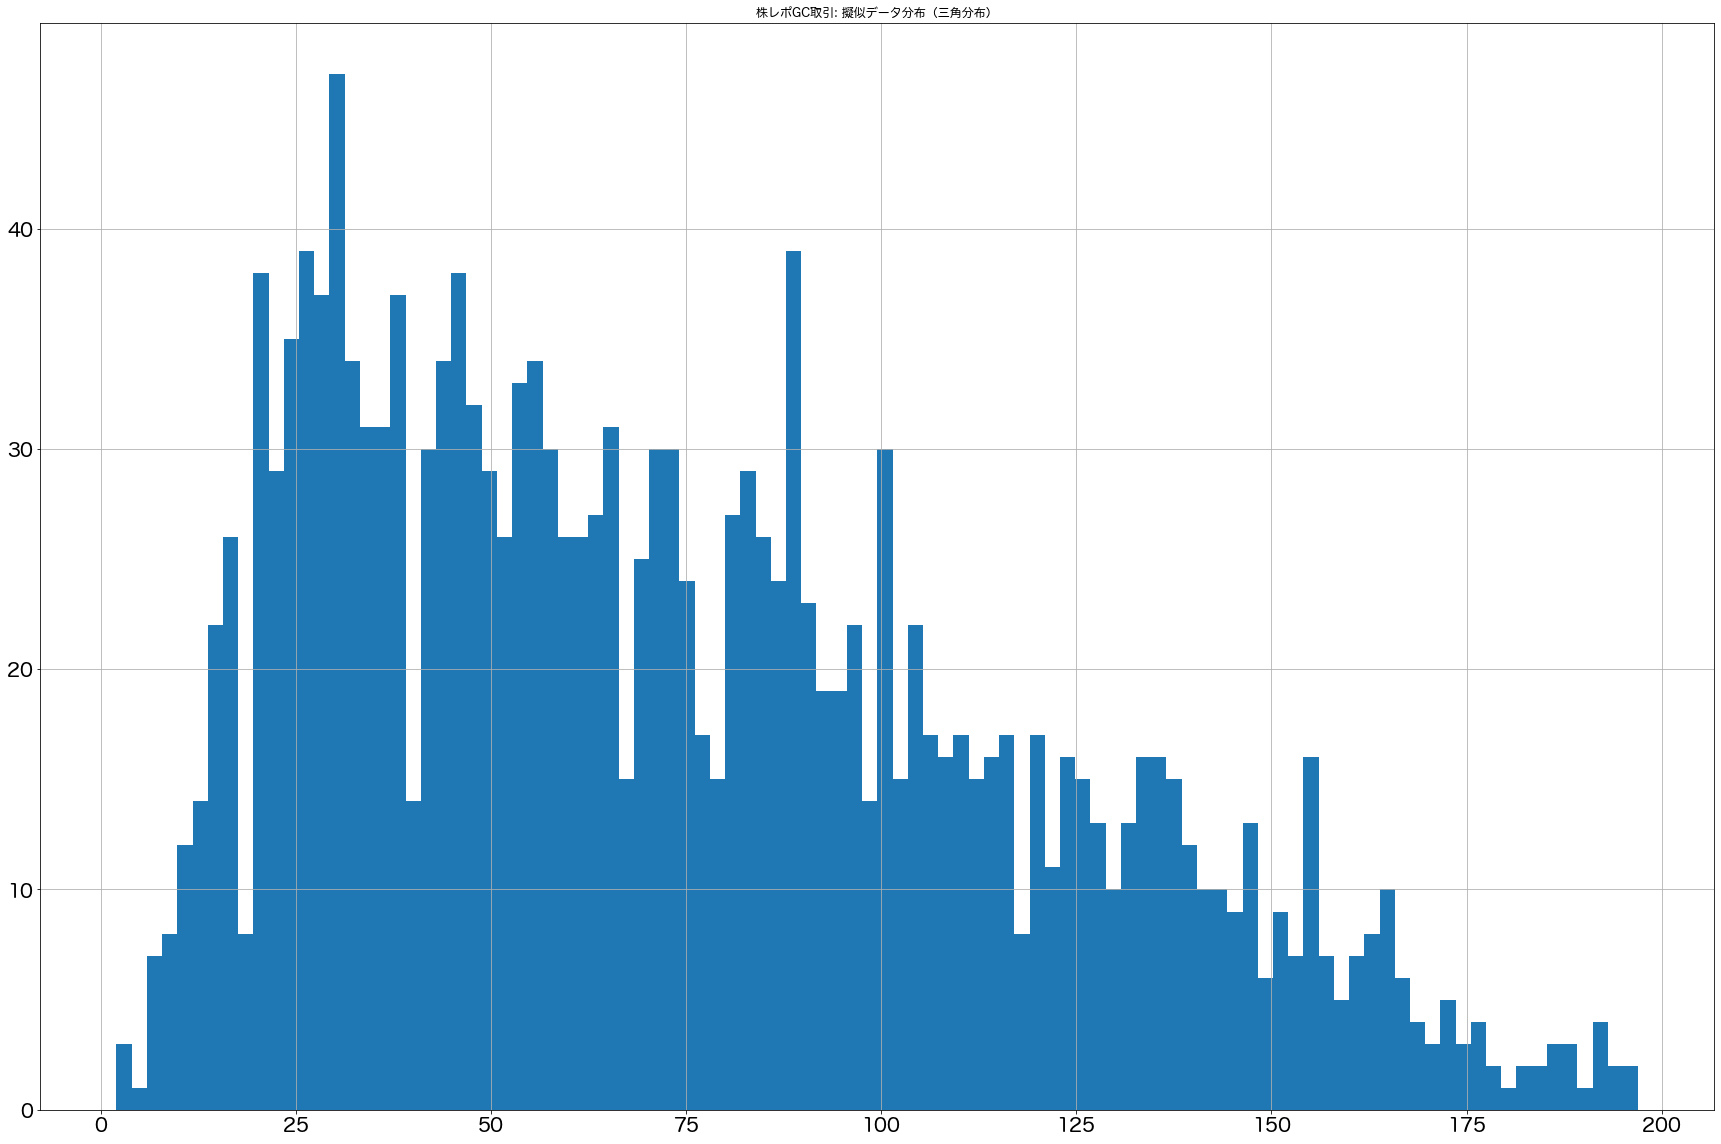

In [87]:
# 三角分布で類似分布を作成
get_gc_num_df(b_security_nums['100%']['stock'])

{'4000': {'gc':       0
  0    99
  1    80
  2    95
  3   137
  4   107
  ..  ...
  95  162
  96   71
  97  146
  98   59
  99  139
  
  [100 rows x 1 columns]},
 '9200': {'gc':        0
  0     70
  1    140
  2     30
  3    137
  4     31
  ..   ...
  224   90
  225   85
  226   17
  227   83
  228   77
  
  [229 rows x 1 columns]},
 '3000': {'gc':       0
  0    42
  1    37
  2    70
  3    74
  4    90
  ..  ...
  70   64
  71   29
  72  127
  73   15
  74   34
  
  [75 rows x 1 columns]},
 '2000': {'gc':       0
  0   104
  1   105
  2    96
  3    43
  4    56
  5   160
  6    48
  7   142
  8    54
  9    69
  10  102
  11   35
  12   68
  13   39
  14   56
  15   54
  16   85
  17   10
  18   14
  19  100
  20   39
  21   84
  22   21
  23  105
  24  133
  25  159
  26   58
  27   80
  28    7
  29   11
  30  127
  31   29
  32  121
  33   70
  34   76
  35   54
  36   49
  37  176
  38  125
  39   30
  40   36
  41  109
  42   80
  43   80
  44   60
  45   32
  46   17
  4

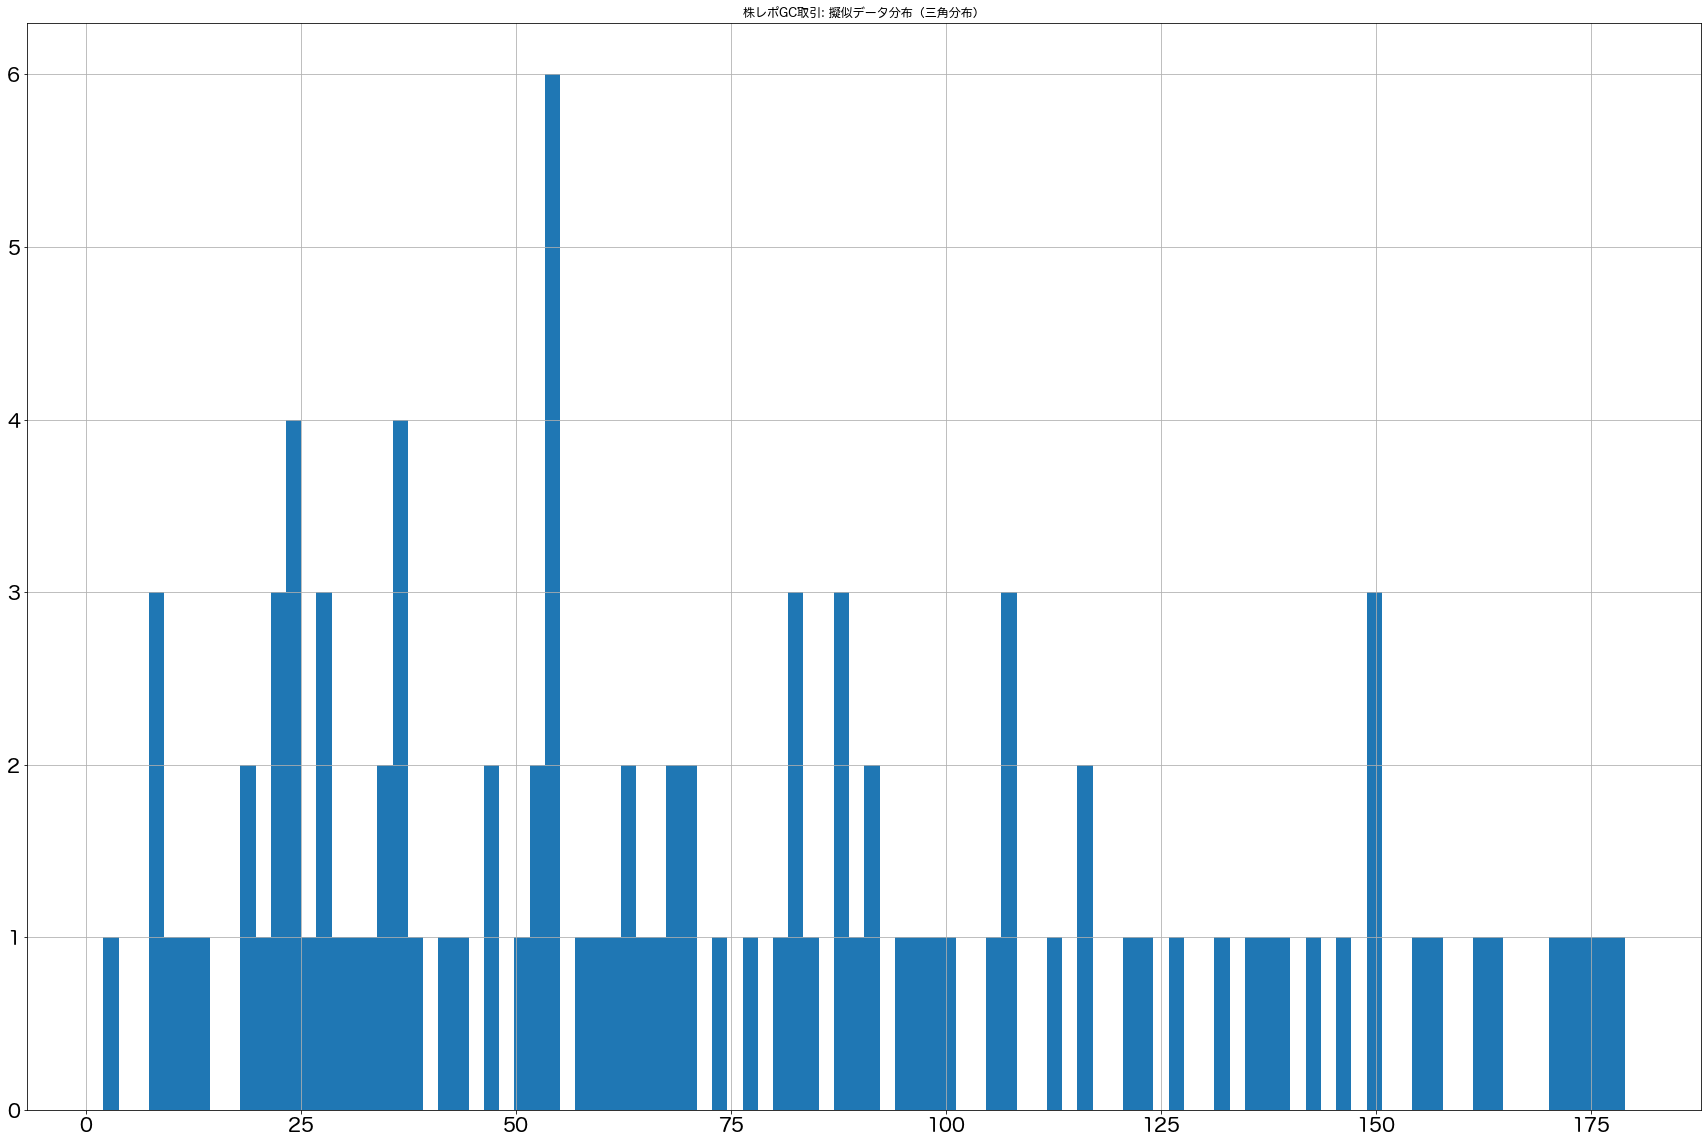

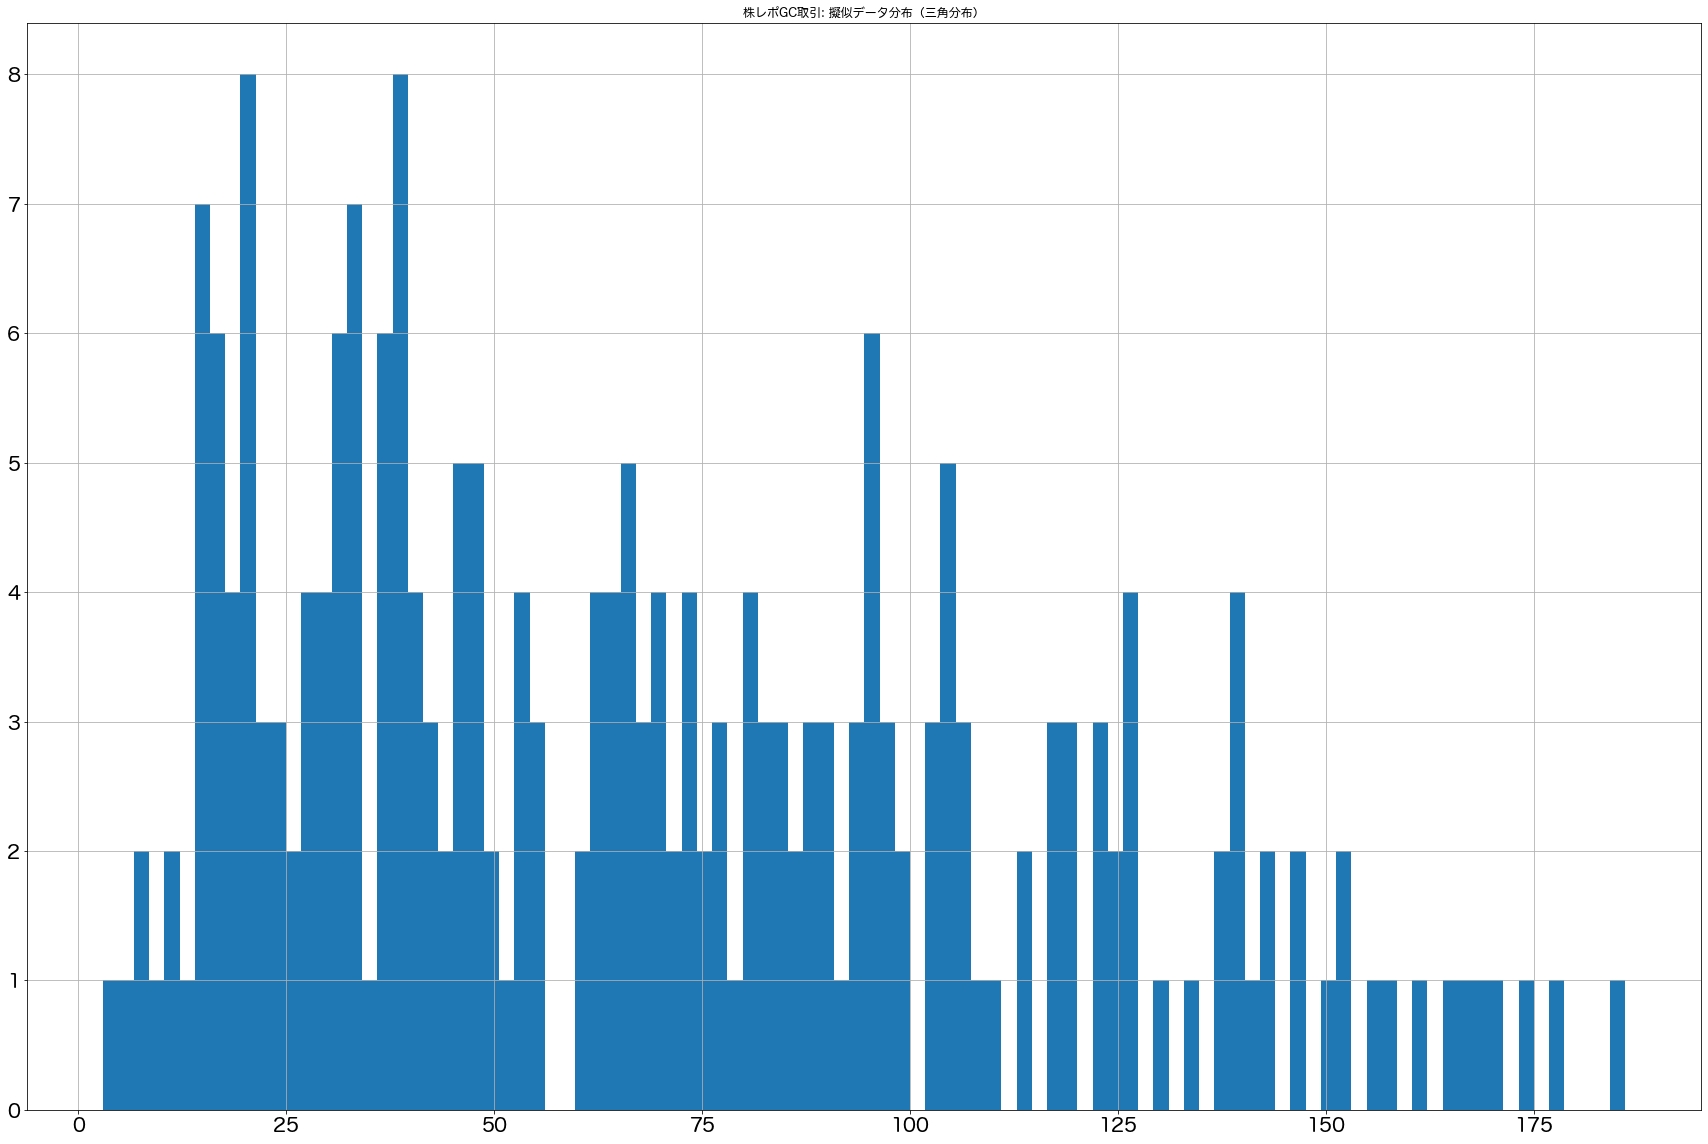

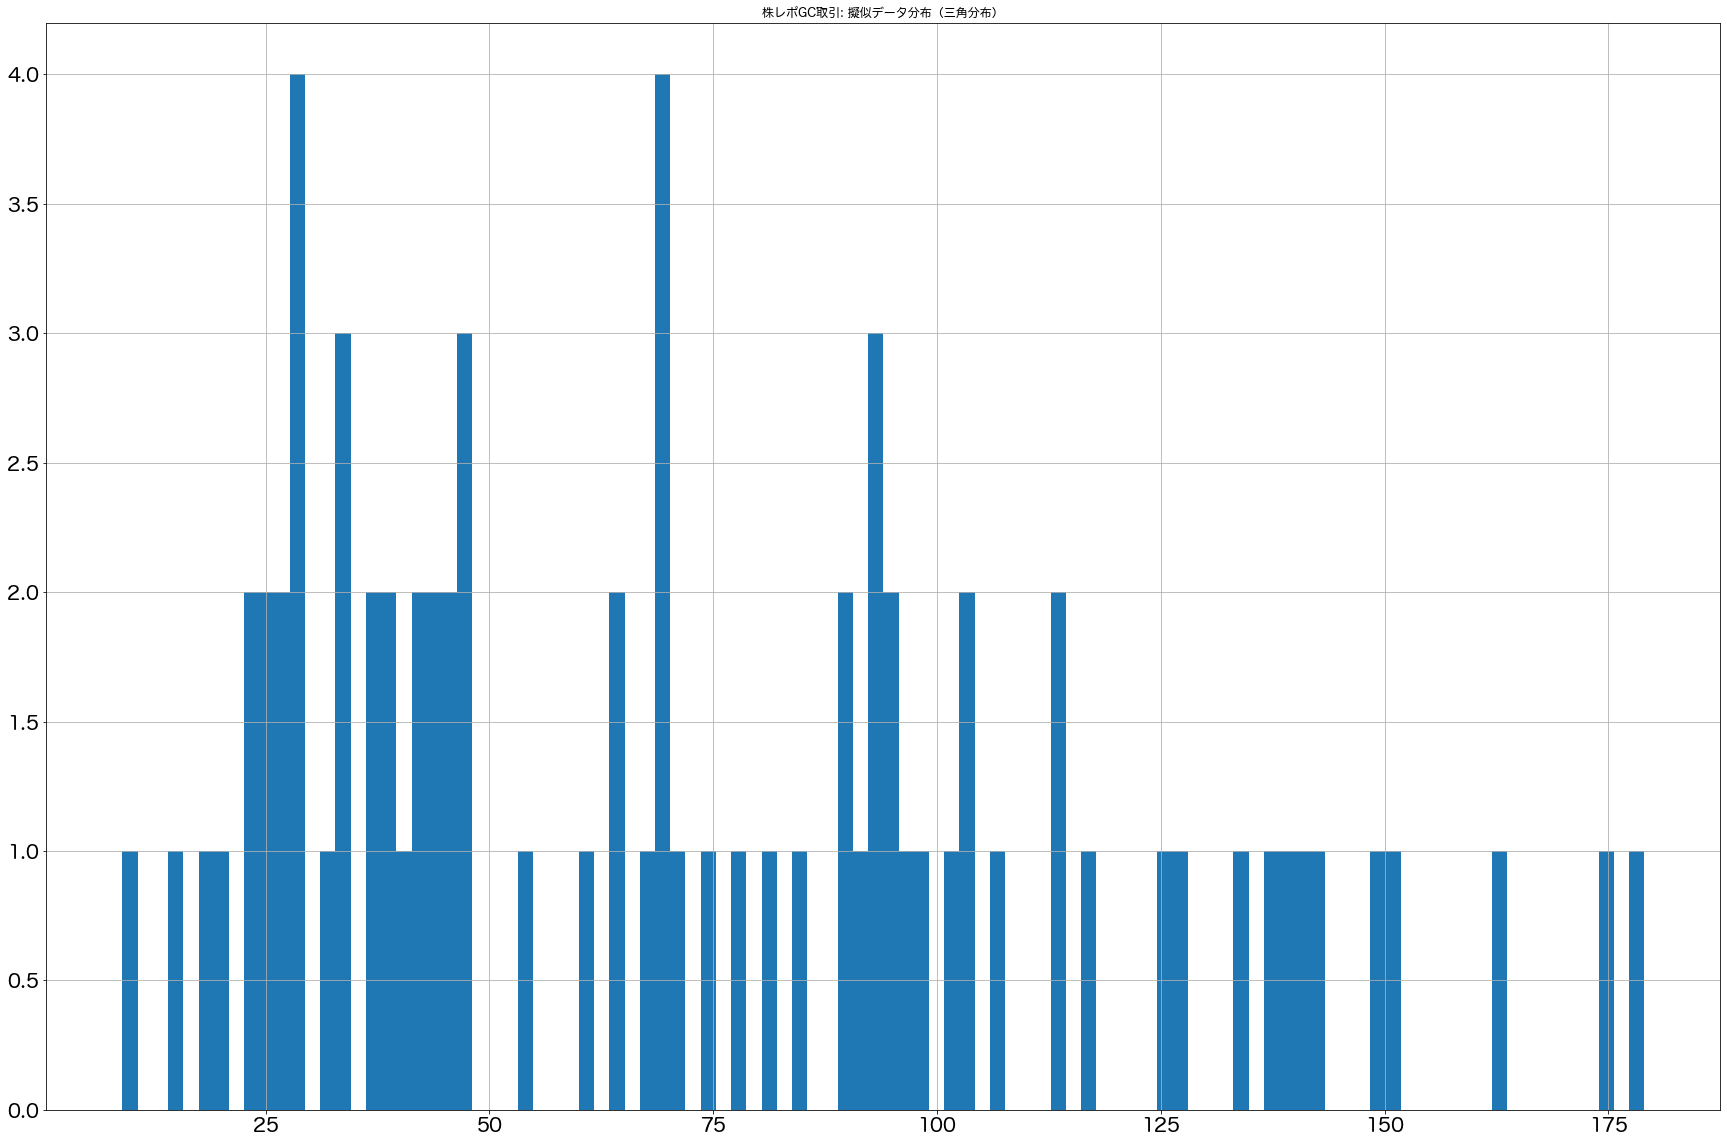

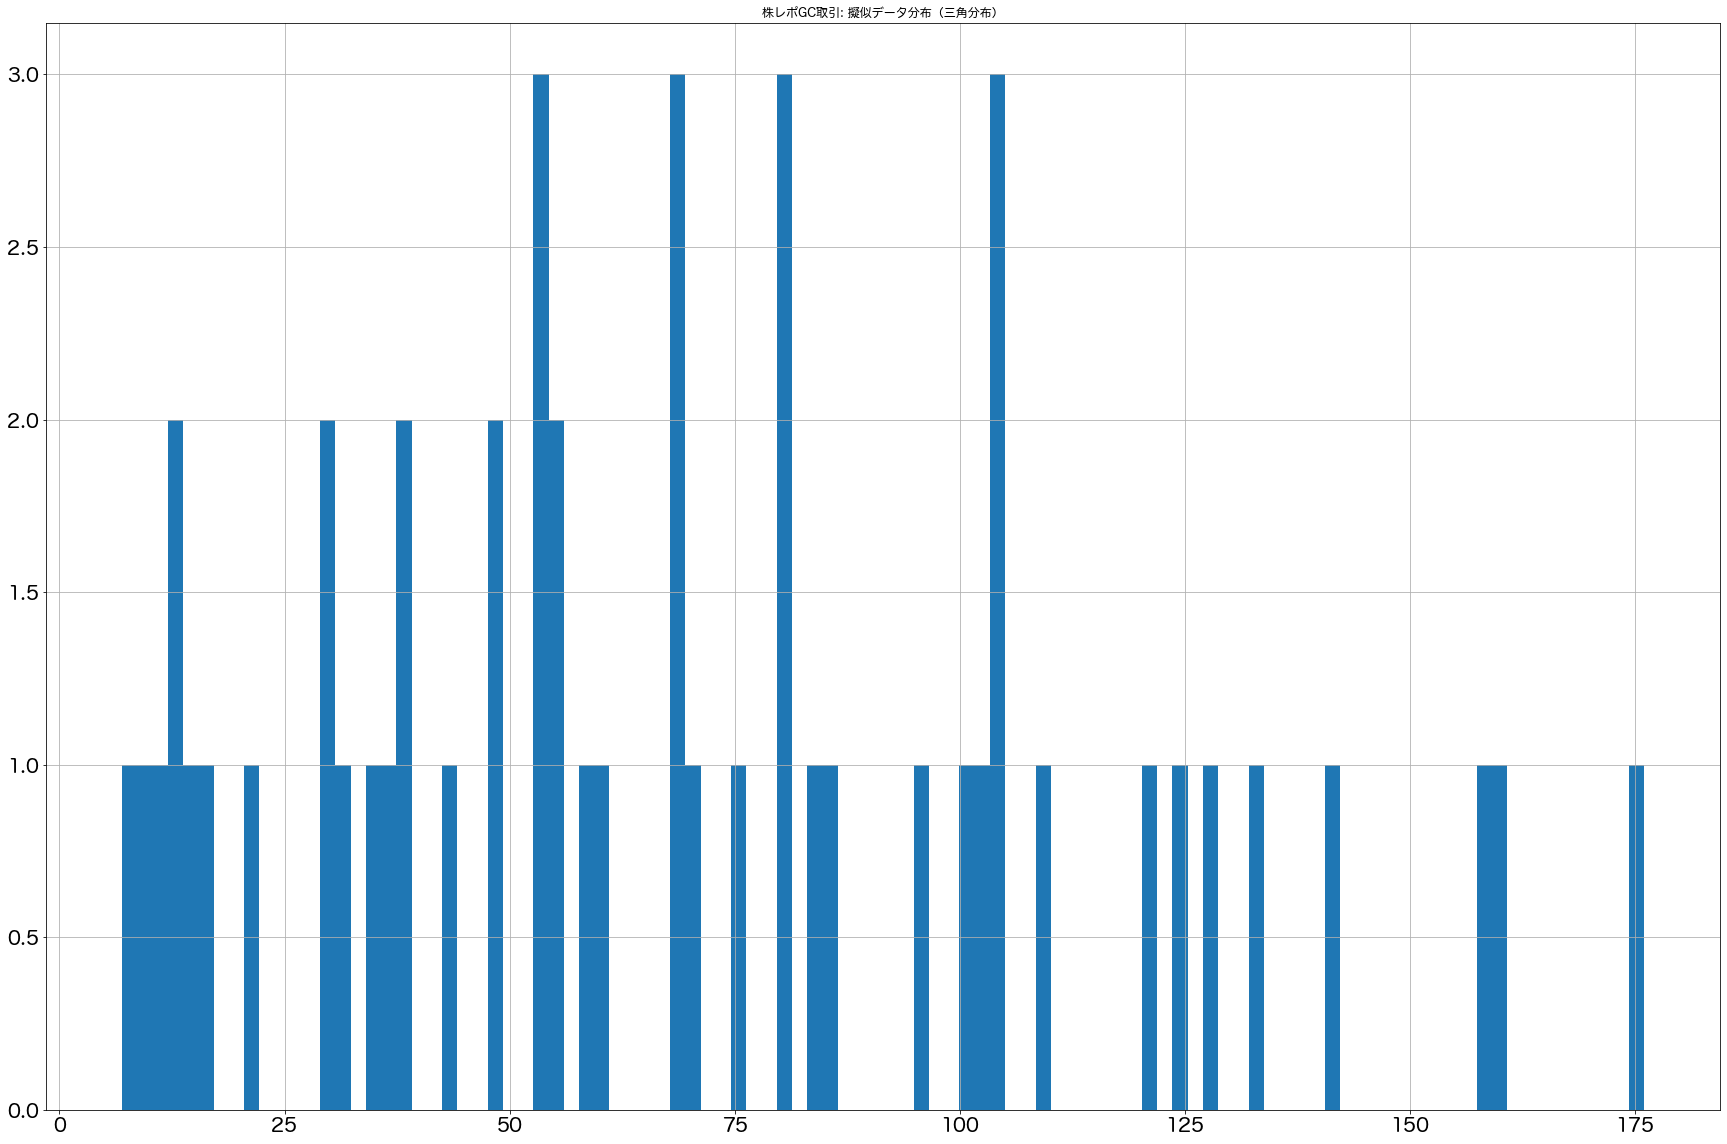

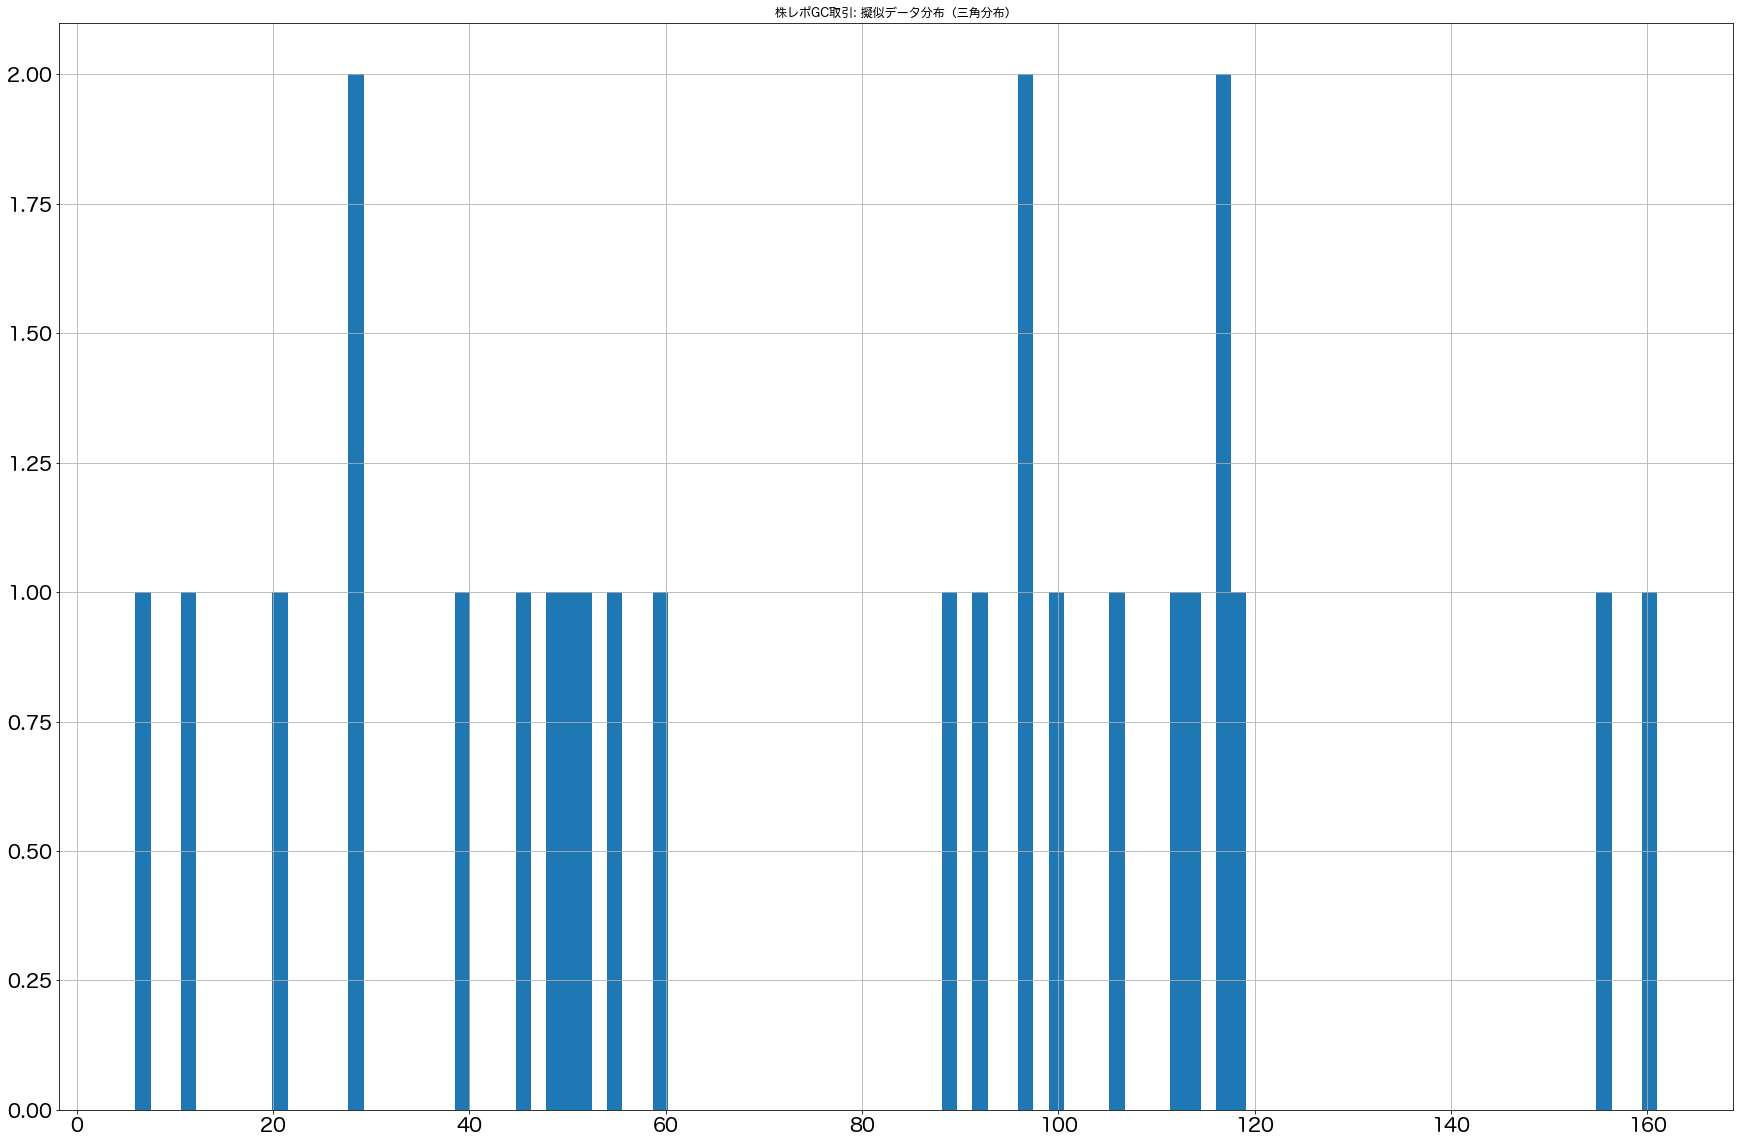

In [88]:
for _key, _value in additional_trade_nums.items():
    _num = _value['gc']
    all_security_num_dfs[_key]['gc'] = get_gc_num_df(_num)
all_security_num_dfs

#### SC取引

株レポ: SC取引銘柄数
          1   2~10  11~50  51~100   101~
ratio  0.54   0.36    0.1       0    0.0
min    1.00   2.00   11.0      51  101.0
max    1.00  10.00   50.0     100  200.0
'=================================================='


Text(0.5, 1.0, '株レポSC取引: 銘柄数')

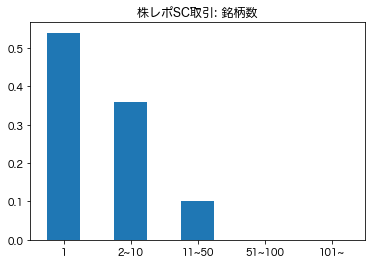

In [89]:
sc_security_num_dist = pd.DataFrame([[0.54, 0.36, 0.1, 0, 0.], [1, 2, 11, 51, 101], [1, 10, 50, 100, 200]],
                             columns=security_num_column_labels,
                             index=['ratio', 'min', 'max'])
sc_security_num_ave = 4.05
print('株レポ: SC取引銘柄数')
pprint(sc_security_num_dist)
pprint('='*50)

sc_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('株レポSC取引: 銘柄数')

Text(0.5, 1.0, '株レポSC取引: ヒストグラム')

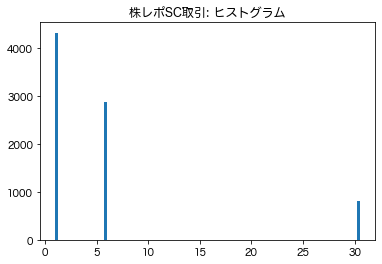

In [90]:
sc_trade_num = 8000
sc_ave_security_num_list = (sc_security_num_dist.T['min'] + sc_security_num_dist.T['max']) / 2
sc_security_num_sample = [[ave]*int(sc_security_num_dist.T['ratio'][index] * sc_trade_num)  for (index, ave) in enumerate(sc_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(sc_security_num_sample)), bins=100)
plt.title('株レポSC取引: ヒストグラム')

In [91]:
def get_sc_num_df(trade_num):
    sc_security_num_max = sc_security_num_dist['101~']['max']
    sc_security_num_min = sc_security_num_dist['1']['min'] - 1
    _nums = []
    for i in range(trade_num):
        _nums.append(np.random.choice(a=[1, np.random.randint(2, 11), np.random.randint(11, 51)],  p=[0.54, 0.36, 0.1]))
       
    mock_sc_security_num_df = pd.DataFrame(_nums, dtype=int)
    mock_sc_security_num_df.hist(bins=100, figsize=(30, 20), xlabelsize=20, ylabelsize=20)
    plt.title('株レポSC取引: 擬似データ分布')
    return mock_sc_security_num_df

,0
0,3
1,1
2,10
3,1
4,1
...,...
1753,3
1754,18
1755,14
1756,1


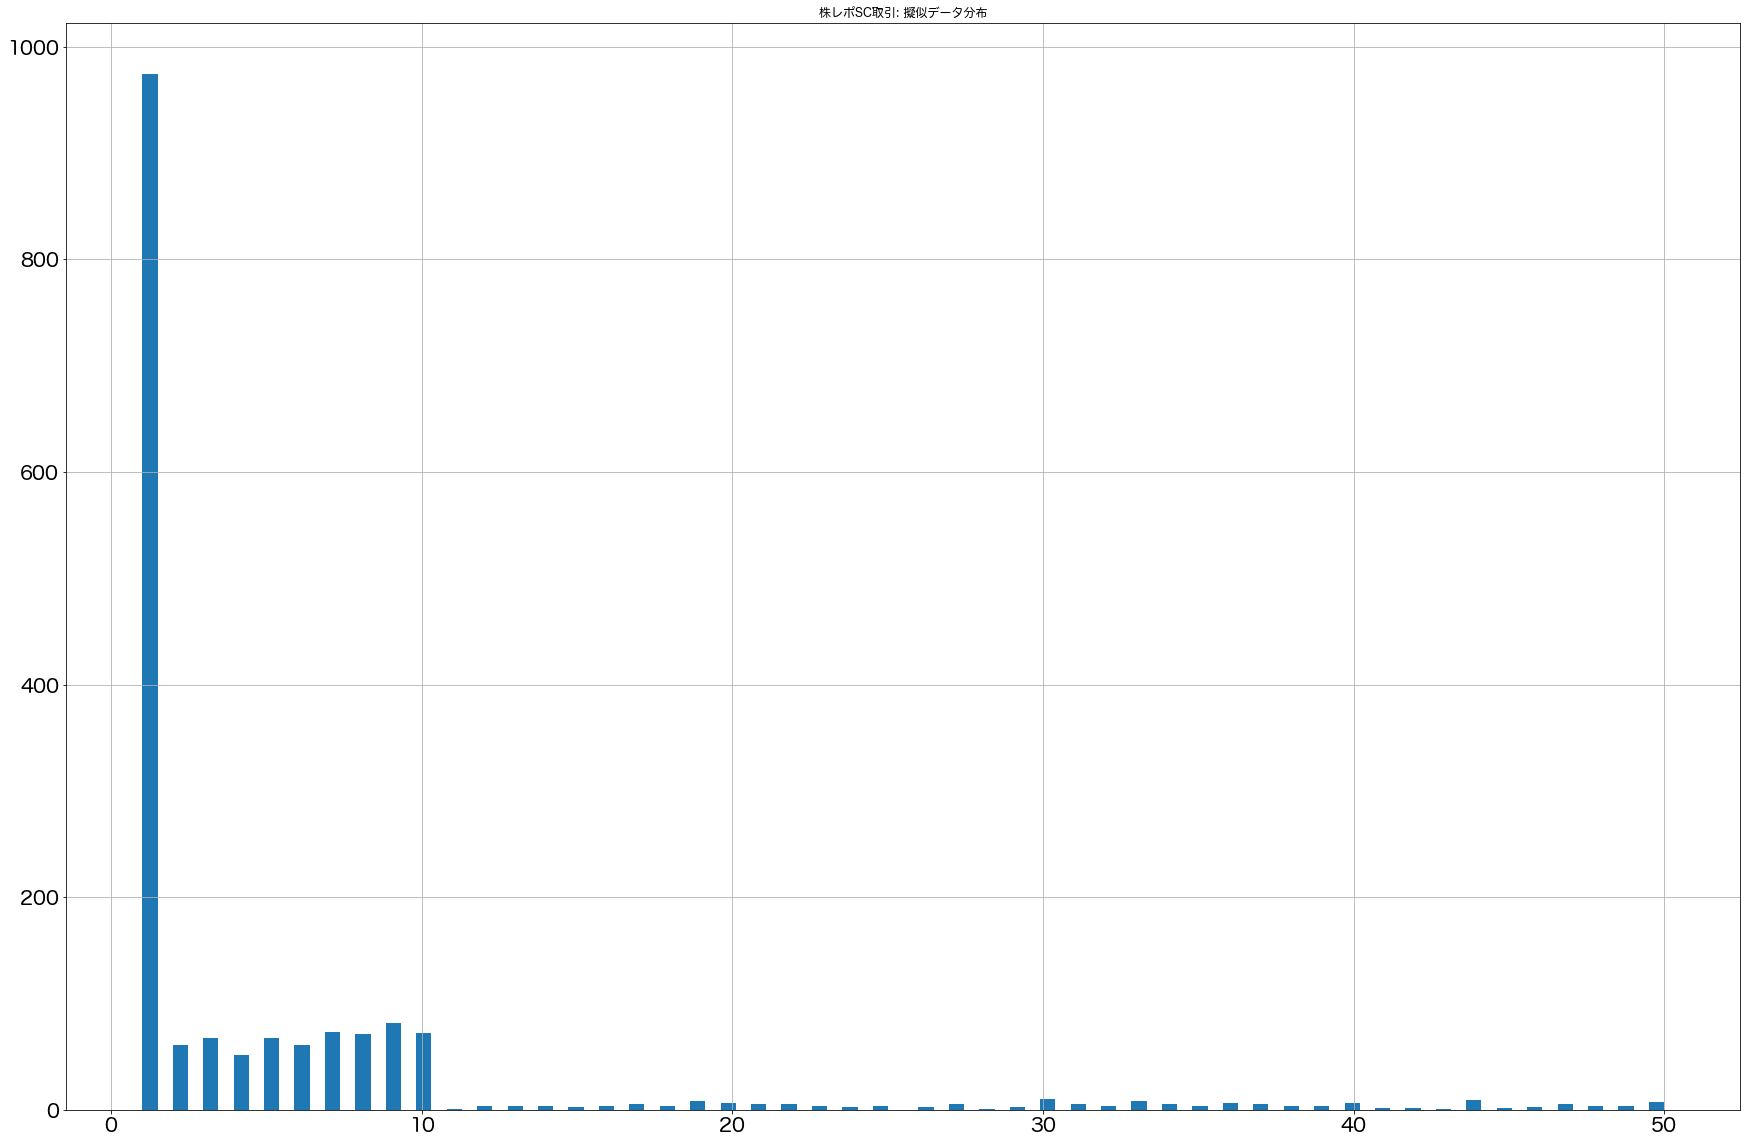

In [92]:
get_sc_num_df(b_security_nums['100%']['stock'])

{'4000': {'gc':       0
  0    99
  1    80
  2    95
  3   137
  4   107
  ..  ...
  95  162
  96   71
  97  146
  98   59
  99  139
  
  [100 rows x 1 columns],
  'sc':       0
  0     1
  1     1
  2     1
  3     2
  4     6
  ..   ..
  638   9
  639  29
  640   1
  641   1
  642   6
  
  [643 rows x 1 columns]},
 '9200': {'gc':        0
  0     70
  1    140
  2     30
  3    137
  4     31
  ..   ...
  224   90
  225   85
  226   17
  227   83
  228   77
  
  [229 rows x 1 columns],
  'sc':       0
  0     9
  1     1
  2     1
  3     1
  4     7
  ...  ..
  1474  9
  1475  1
  1476  1
  1477  8
  1478  1
  
  [1479 rows x 1 columns]},
 '3000': {'gc':       0
  0    42
  1    37
  2    70
  3    74
  4    90
  ..  ...
  70   64
  71   29
  72  127
  73   15
  74   34
  
  [75 rows x 1 columns],
  'sc':       0
  0     1
  1     8
  2    16
  3     1
  4     6
  ..   ..
  477  36
  478   1
  479   1
  480   1
  481   1
  
  [482 rows x 1 columns]},
 '2000': {'gc':       0
  0   1

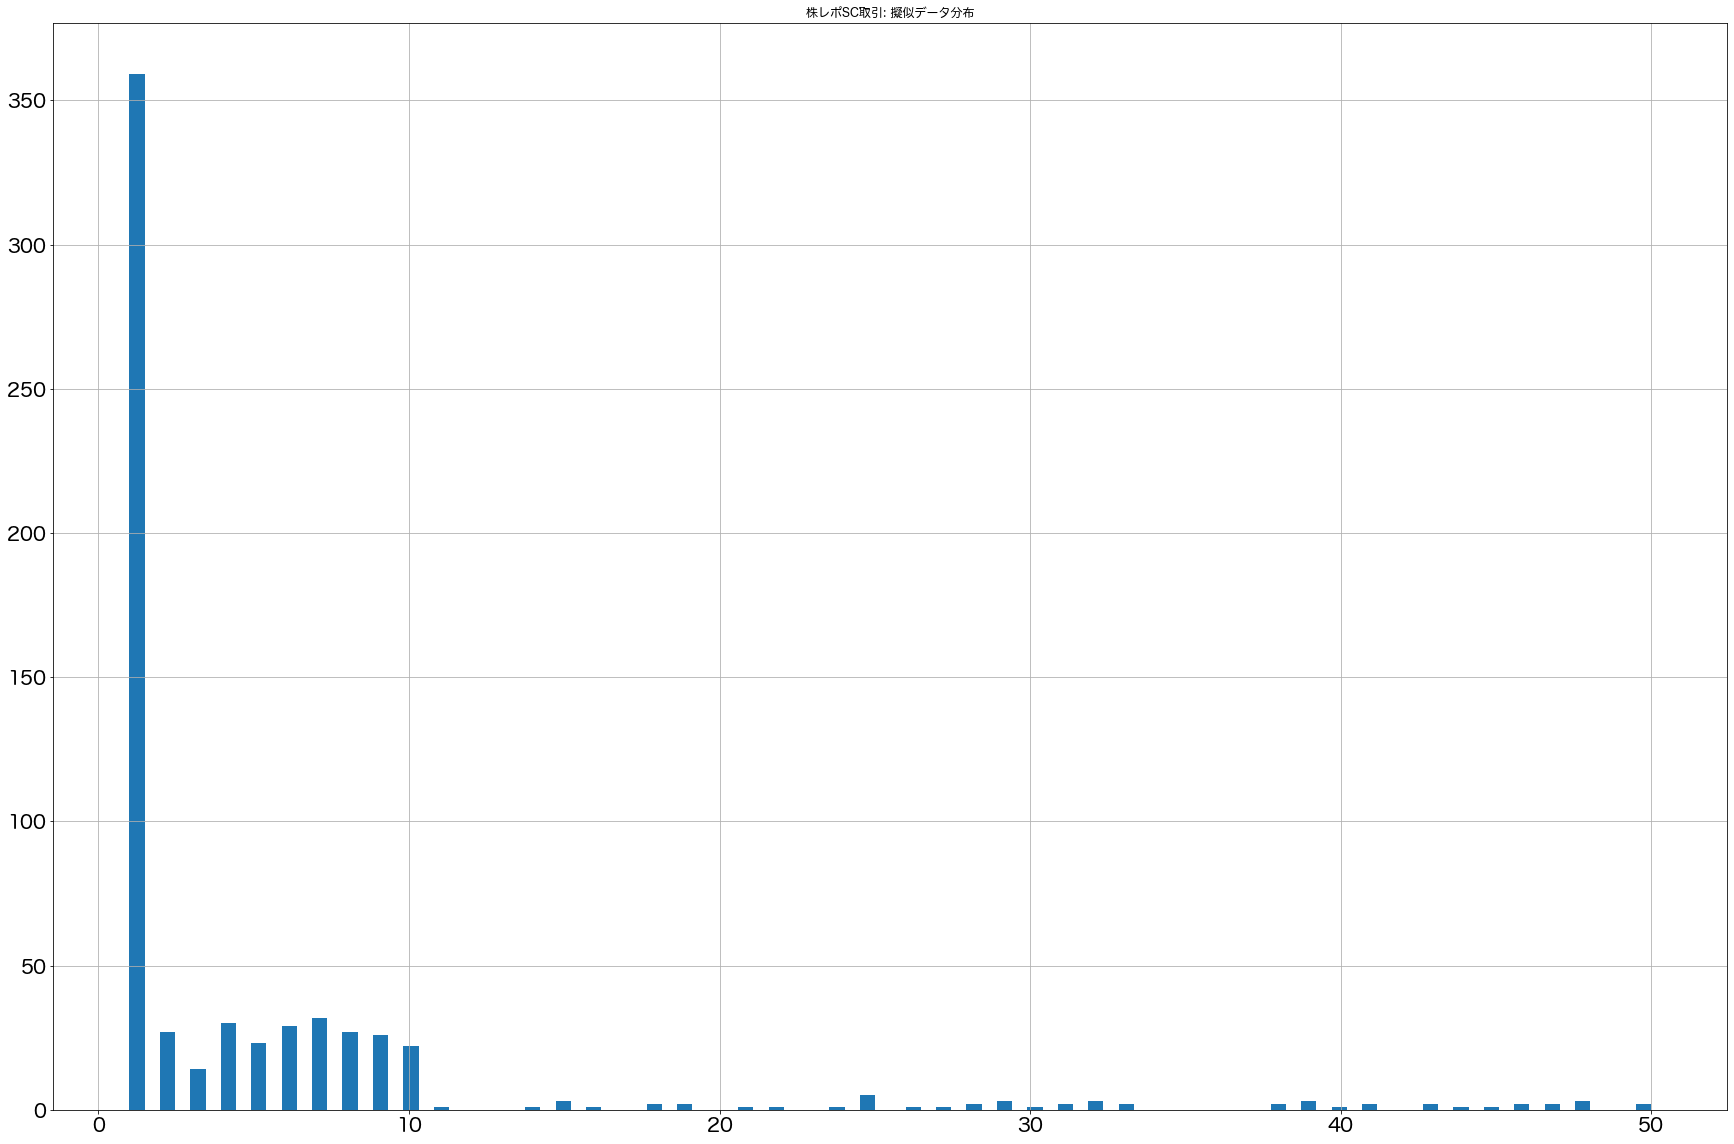

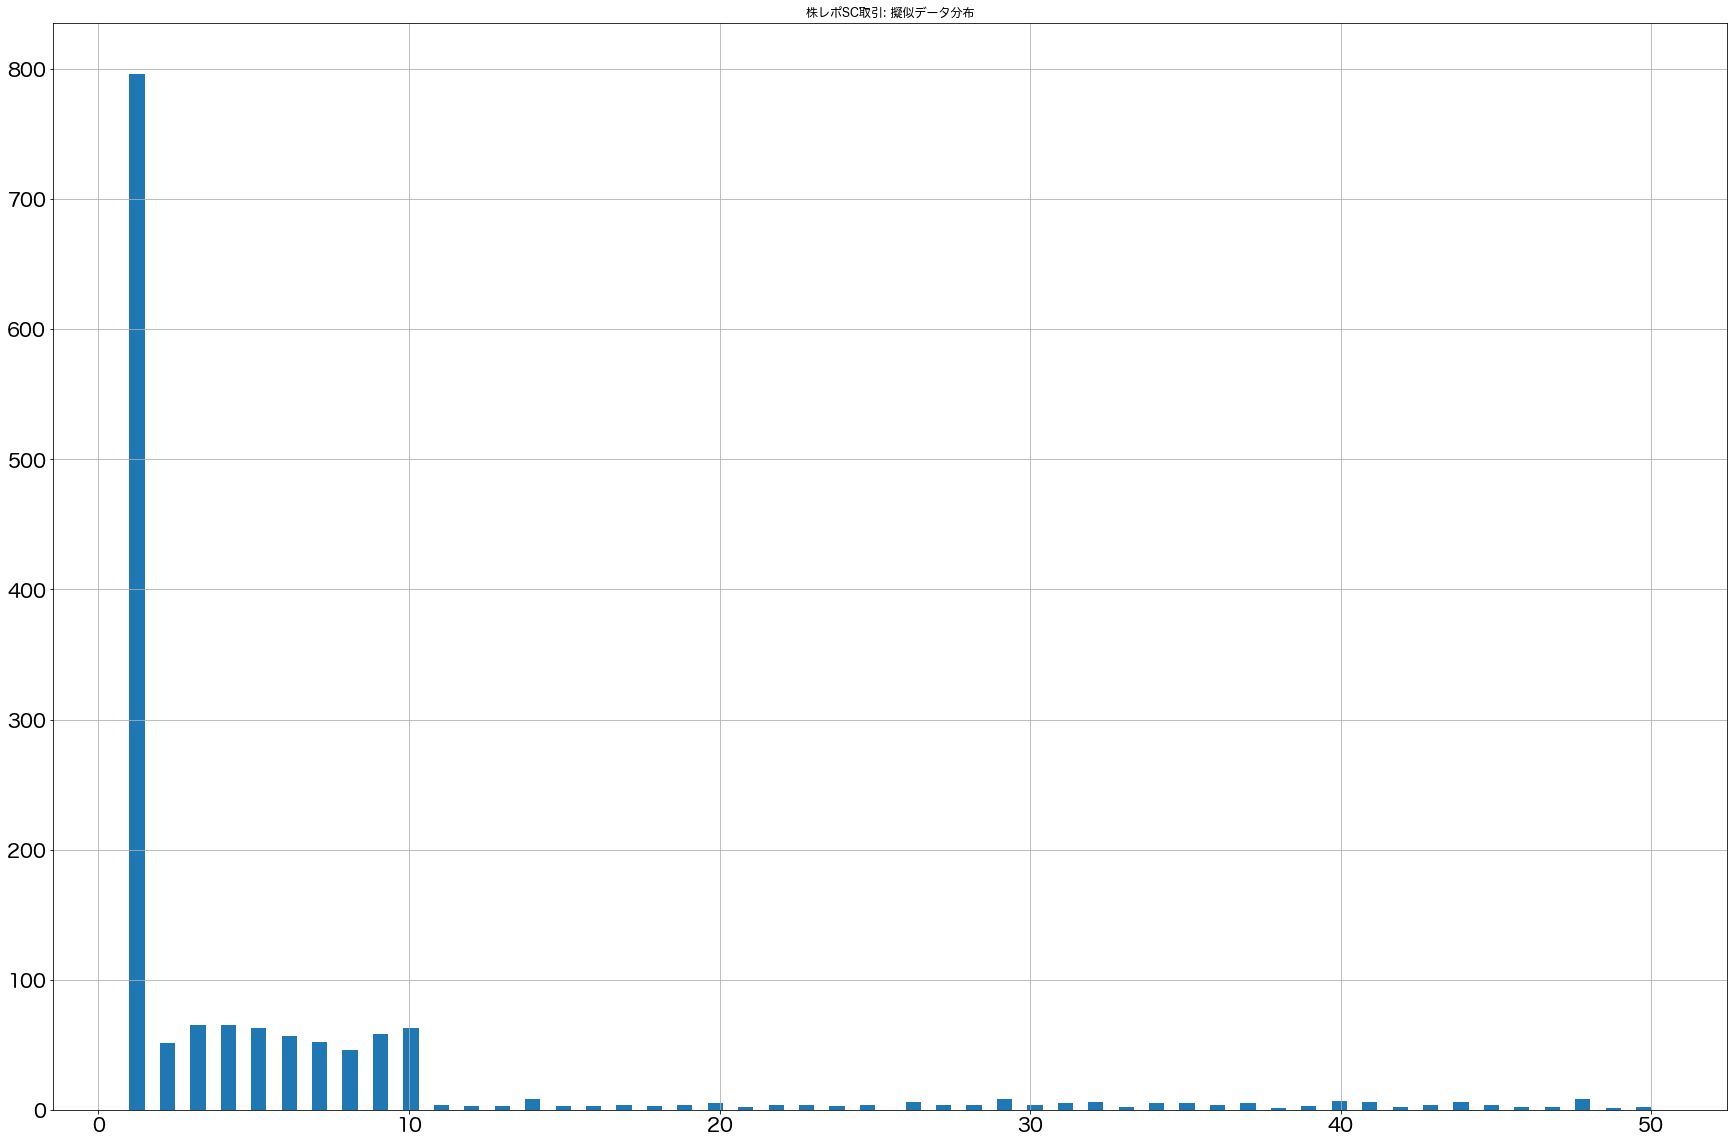

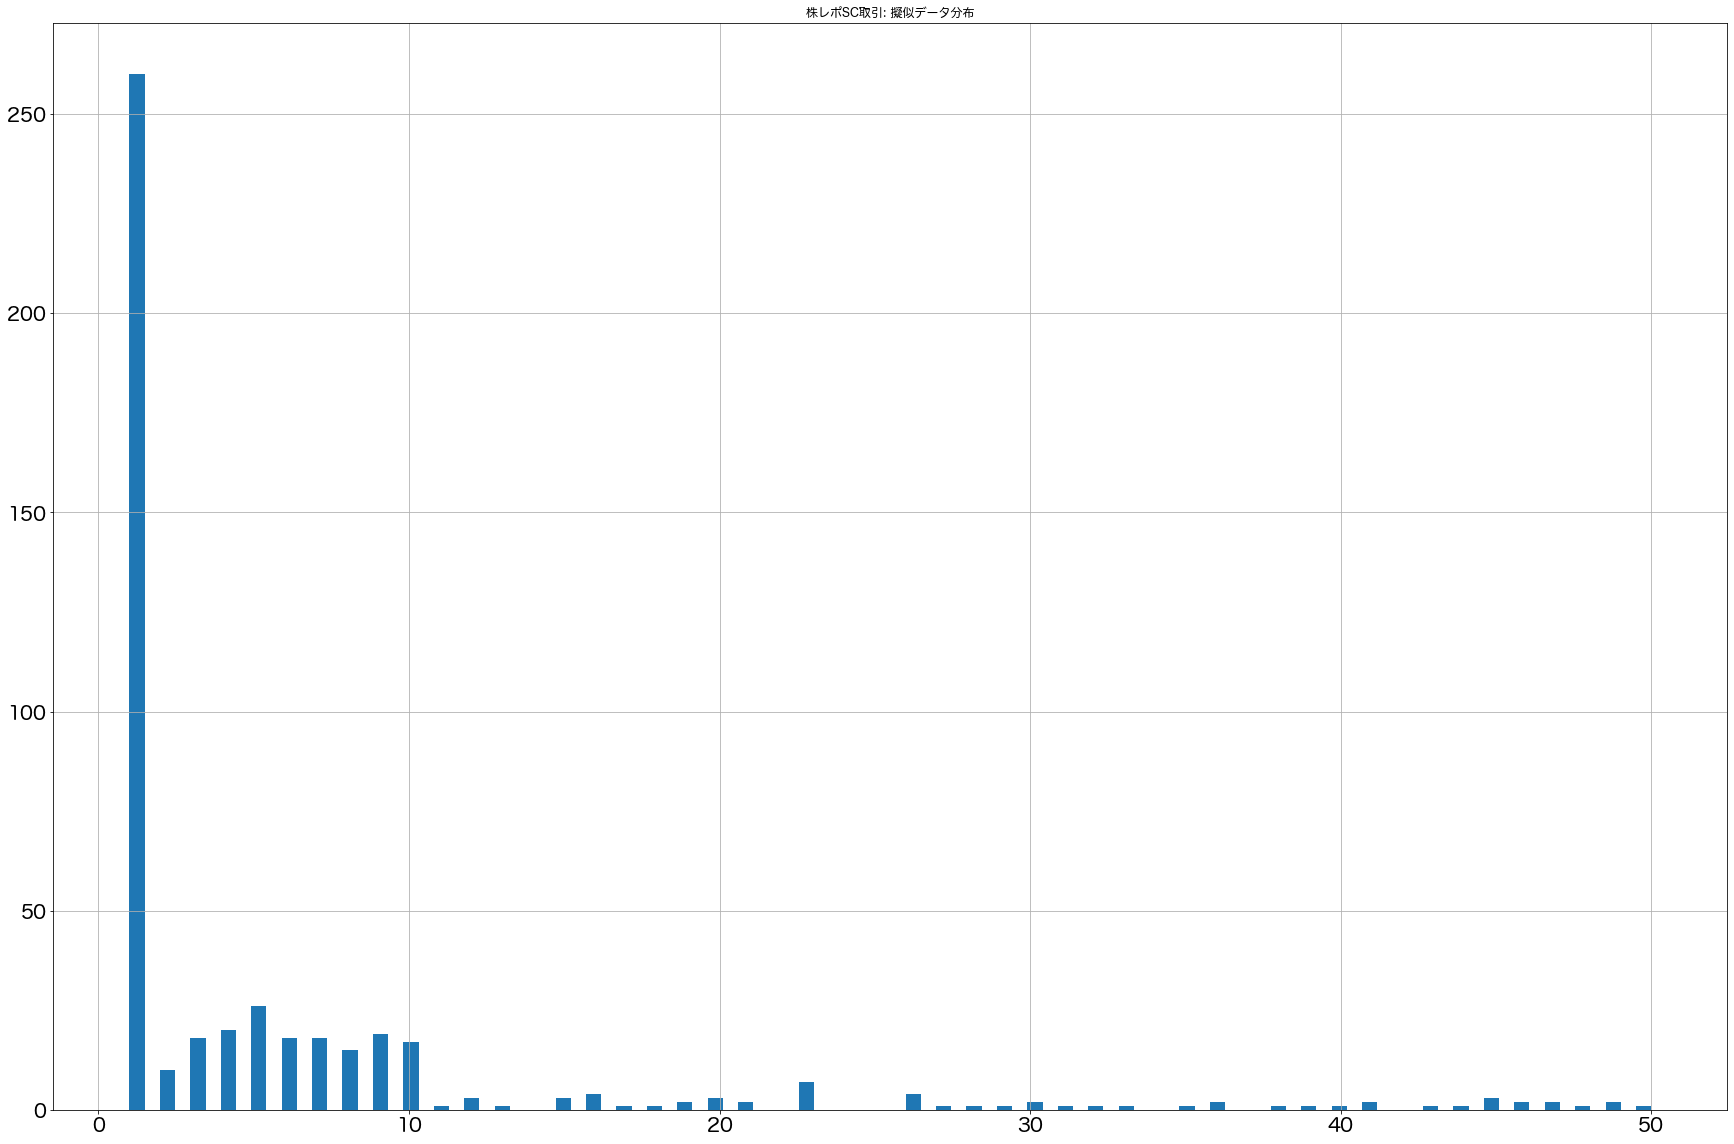

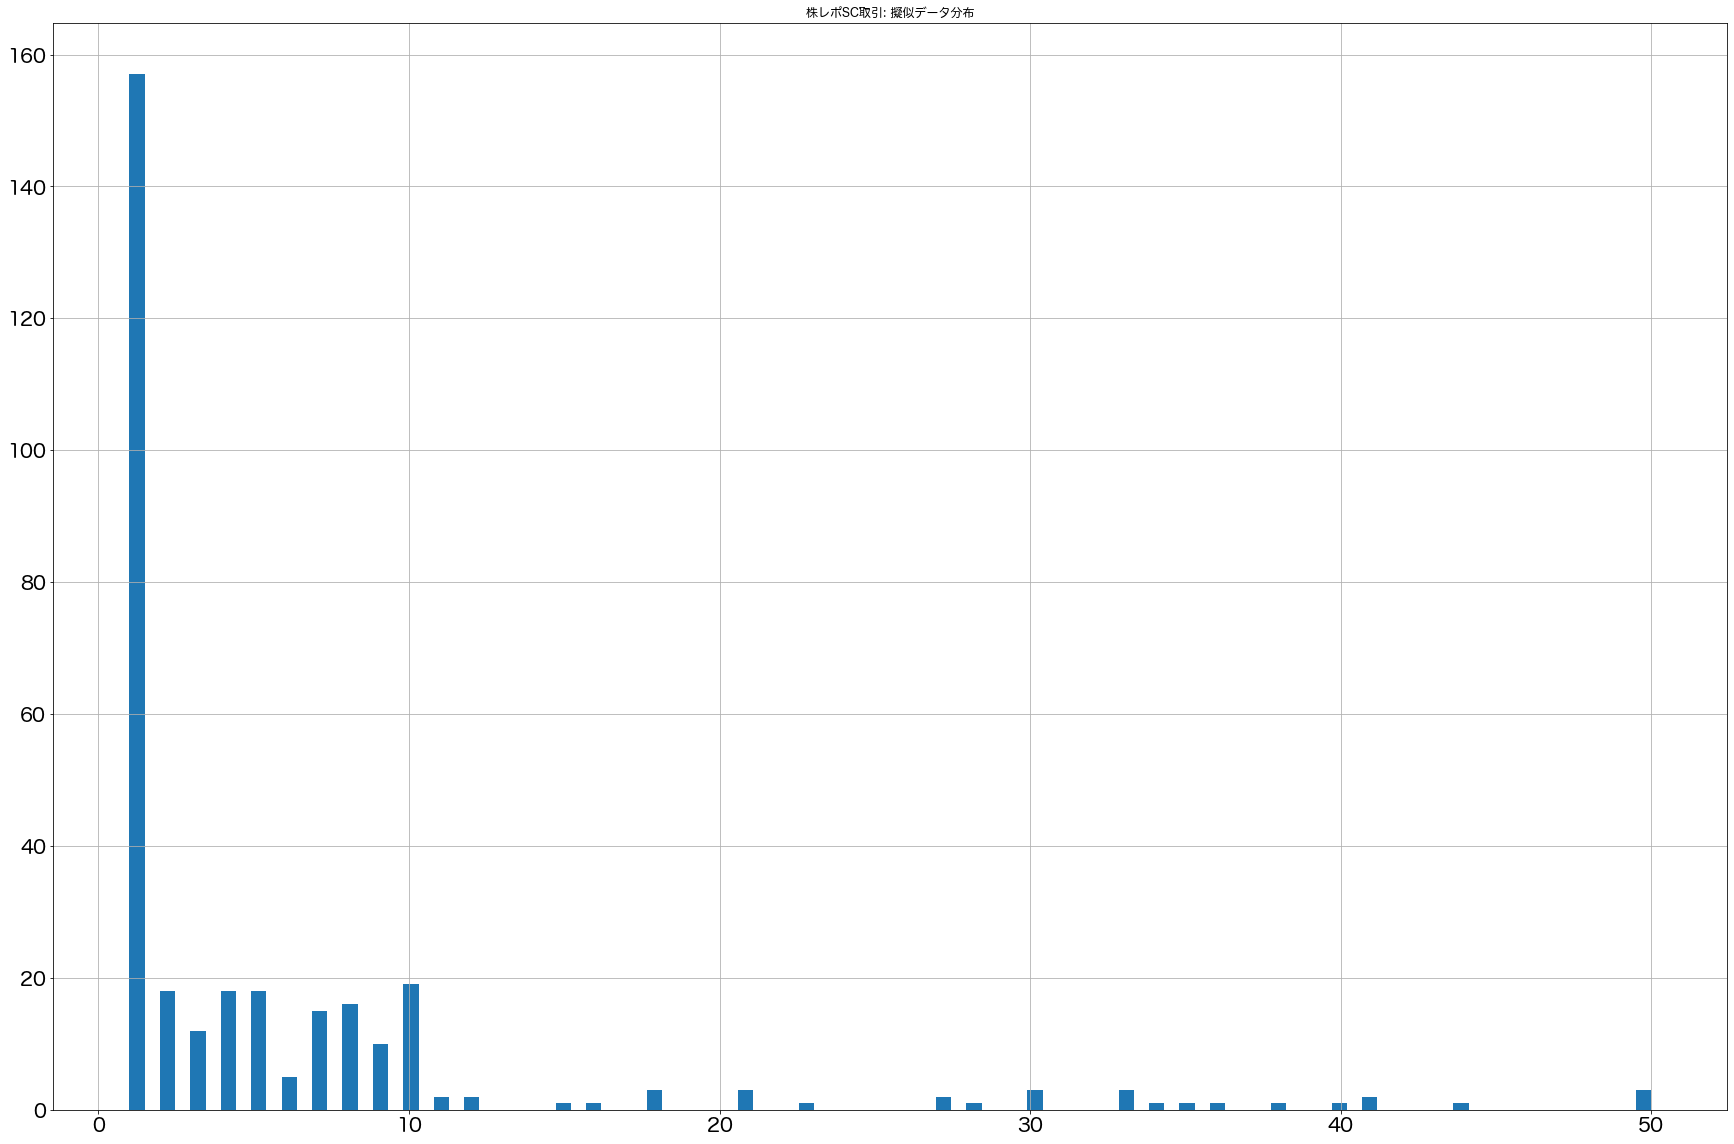

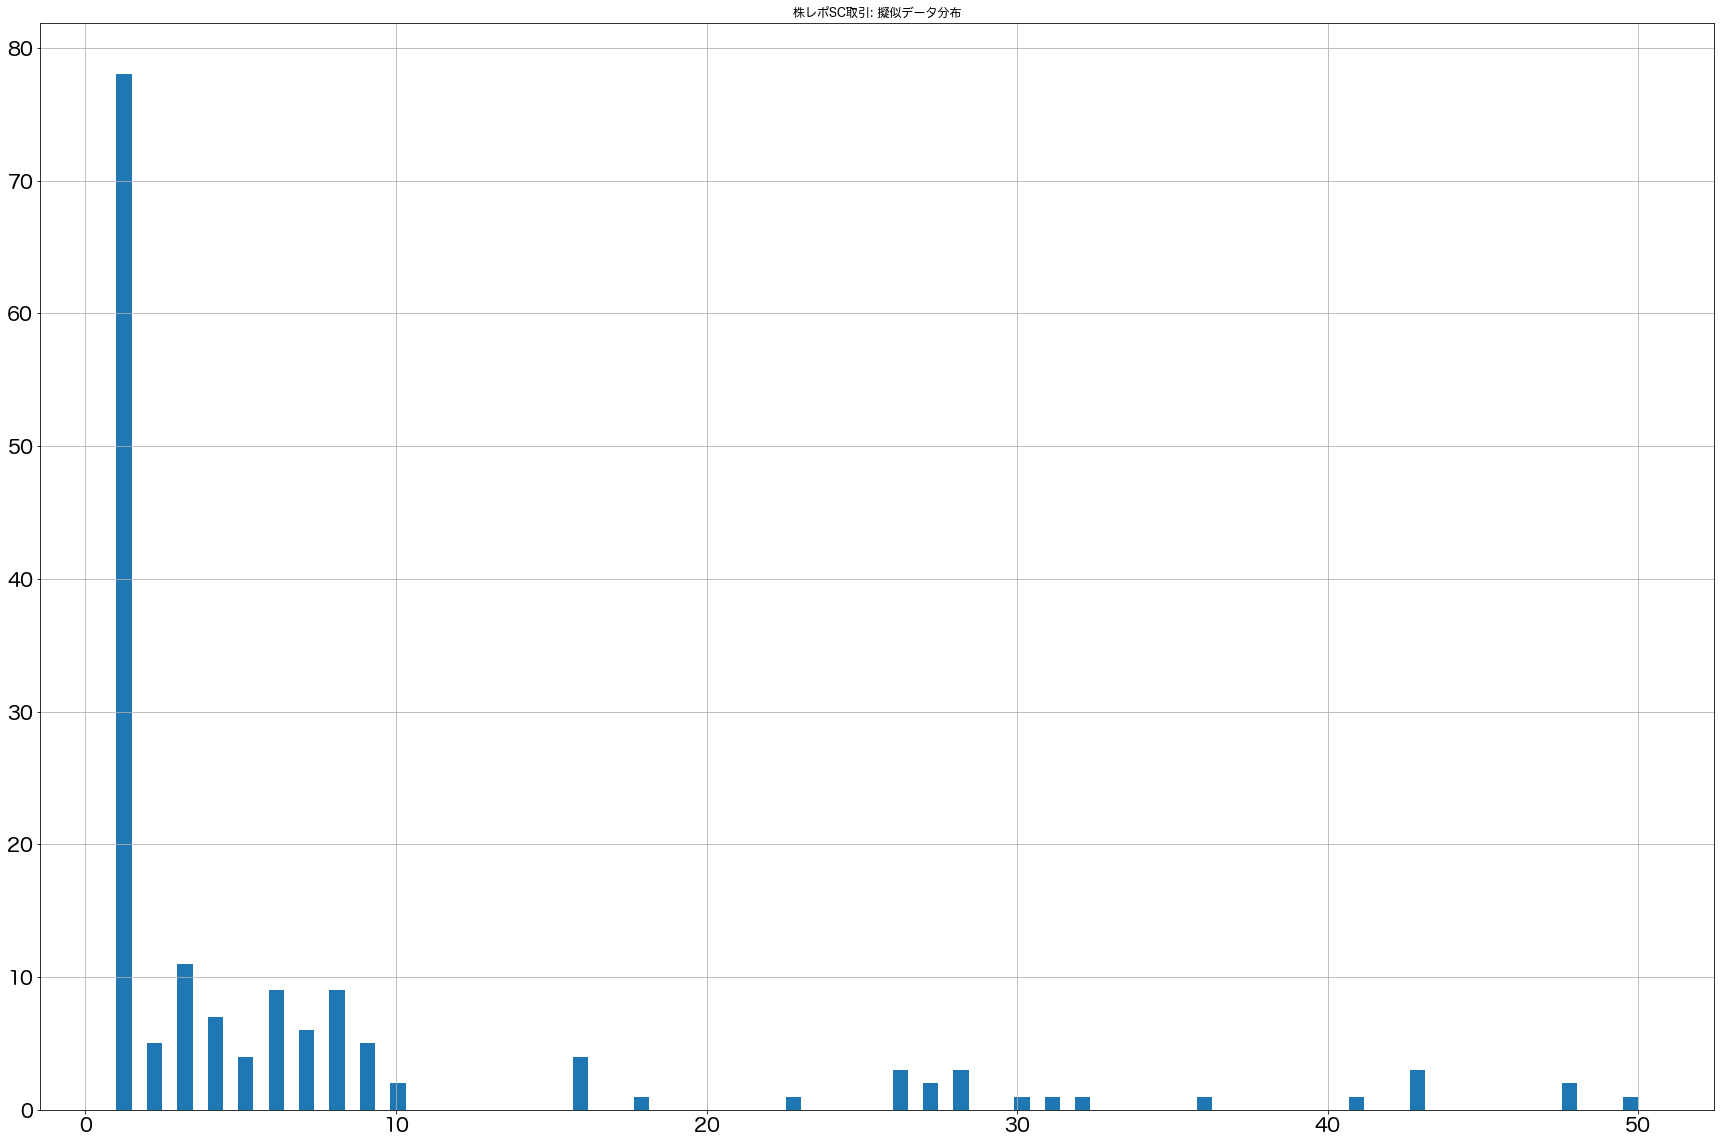

In [93]:
for _key, _value in additional_trade_nums.items():
    _num = _value['sc']
    all_security_num_dfs[_key]['sc'] = get_sc_num_df(_num)
all_security_num_dfs

#### 債券レポ

債券レポ: 取引銘柄数
          1   2-5   6-10  11-50
ratio  0.69  0.27   0.03   0.01
min    1.00  2.00   6.00  11.00
max    1.00  5.00  10.00  30.00
'=================================================='


Text(0.5, 1.0, '債券レポ取引: 銘柄数')

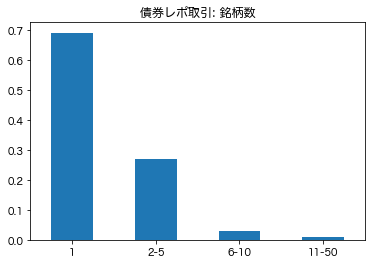

In [94]:
bond_security_num_dist = pd.DataFrame([[0.69, 0.27, 0.03, 0.01], [1, 2, 6, 11], [1, 5, 10, 30]],
                             columns=['1', '2-5', '6-10', '11-50'],
                             index=['ratio', 'min', 'max'])
bond_security_num_ave = 1.87
print('債券レポ: 取引銘柄数')
pprint(bond_security_num_dist)
pprint('='*50)

bond_security_num_dist.T['ratio'].plot(kind='bar', rot=0)
plt.title('債券レポ取引: 銘柄数')

Text(0.5, 1.0, '再建レポ取引: ヒストグラム')

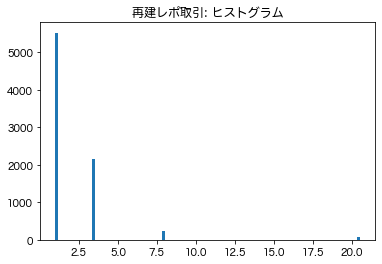

In [95]:
bond_trade_num = 8000
bond_ave_security_num_list = (bond_security_num_dist.T['min'] + bond_security_num_dist.T['max']) / 2
bond_security_num_sample = [[ave]*int(bond_security_num_dist.T['ratio'][index] * bond_trade_num)  for (index, ave) in enumerate(bond_ave_security_num_list)]

plt.hist(list(itertools.chain.from_iterable(bond_security_num_sample)), bins=100)
plt.title('再建レポ取引: ヒストグラム')

In [96]:
def get_bond_num_df(trade_num):
    bond_security_num_max = bond_security_num_dist['11-50']['max']
    bond_security_num_min = bond_security_num_dist['1']['min'] - 1
    _nums = []
    for i in range(trade_num):
        _nums.append(np.random.choice(a=[1, np.random.randint(2, 6), np.random.randint(6, 11), np.random.randint(11, 51)],  p=[0.69, 0.27, 0.03, 0.01]))
       
    mock_bond_security_num_df = pd.DataFrame(_nums, dtype=int)
    mock_bond_security_num_df.hist(bins=1000, figsize=(30, 20))
    plt.title('債券レポ取引: 擬似データ分布（三角分布）')
    return mock_bond_security_num_df

0    50
dtype: int64

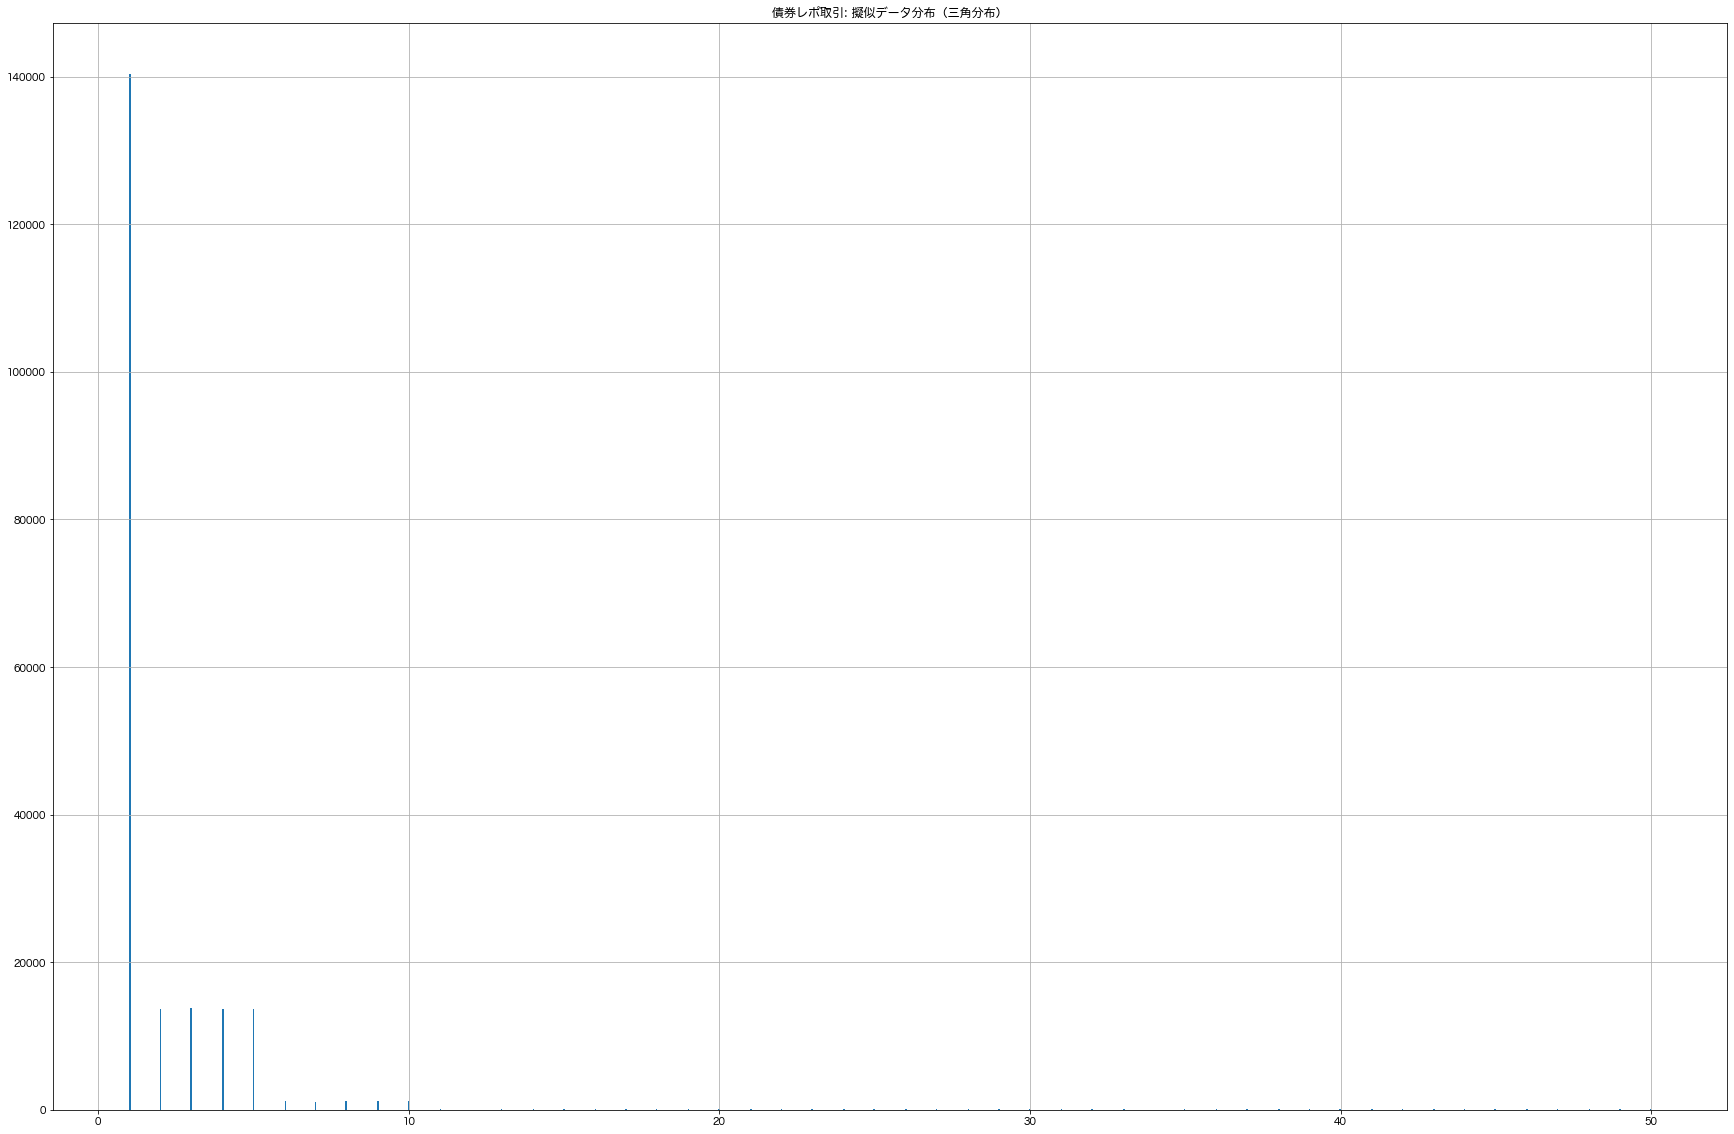

In [97]:
get_bond_num_df(b_trade_nums['100%']['bond']).max()

{'4000': {'gc':       0
  0    99
  1    80
  2    95
  3   137
  4   107
  ..  ...
  95  162
  96   71
  97  146
  98   59
  99  139
  
  [100 rows x 1 columns],
  'sc':       0
  0     1
  1     1
  2     1
  3     2
  4     6
  ..   ..
  638   9
  639  29
  640   1
  641   1
  642   6
  
  [643 rows x 1 columns],
  'bond':       0
  0     1
  1     4
  2     1
  3     1
  4     1
  ...  ..
  3252  1
  3253  1
  3254  1
  3255  2
  3256  1
  
  [3257 rows x 1 columns]},
 '9200': {'gc':        0
  0     70
  1    140
  2     30
  3    137
  4     31
  ..   ...
  224   90
  225   85
  226   17
  227   83
  228   77
  
  [229 rows x 1 columns],
  'sc':       0
  0     9
  1     1
  2     1
  3     1
  4     7
  ...  ..
  1474  9
  1475  1
  1476  1
  1477  8
  1478  1
  
  [1479 rows x 1 columns],
  'bond':       0
  0     1
  1     1
  2     5
  3     5
  4     1
  ...  ..
  7487  3
  7488  2
  7489  1
  7490  5
  7491  2
  
  [7492 rows x 1 columns]},
 '3000': {'gc':       0
  0    42

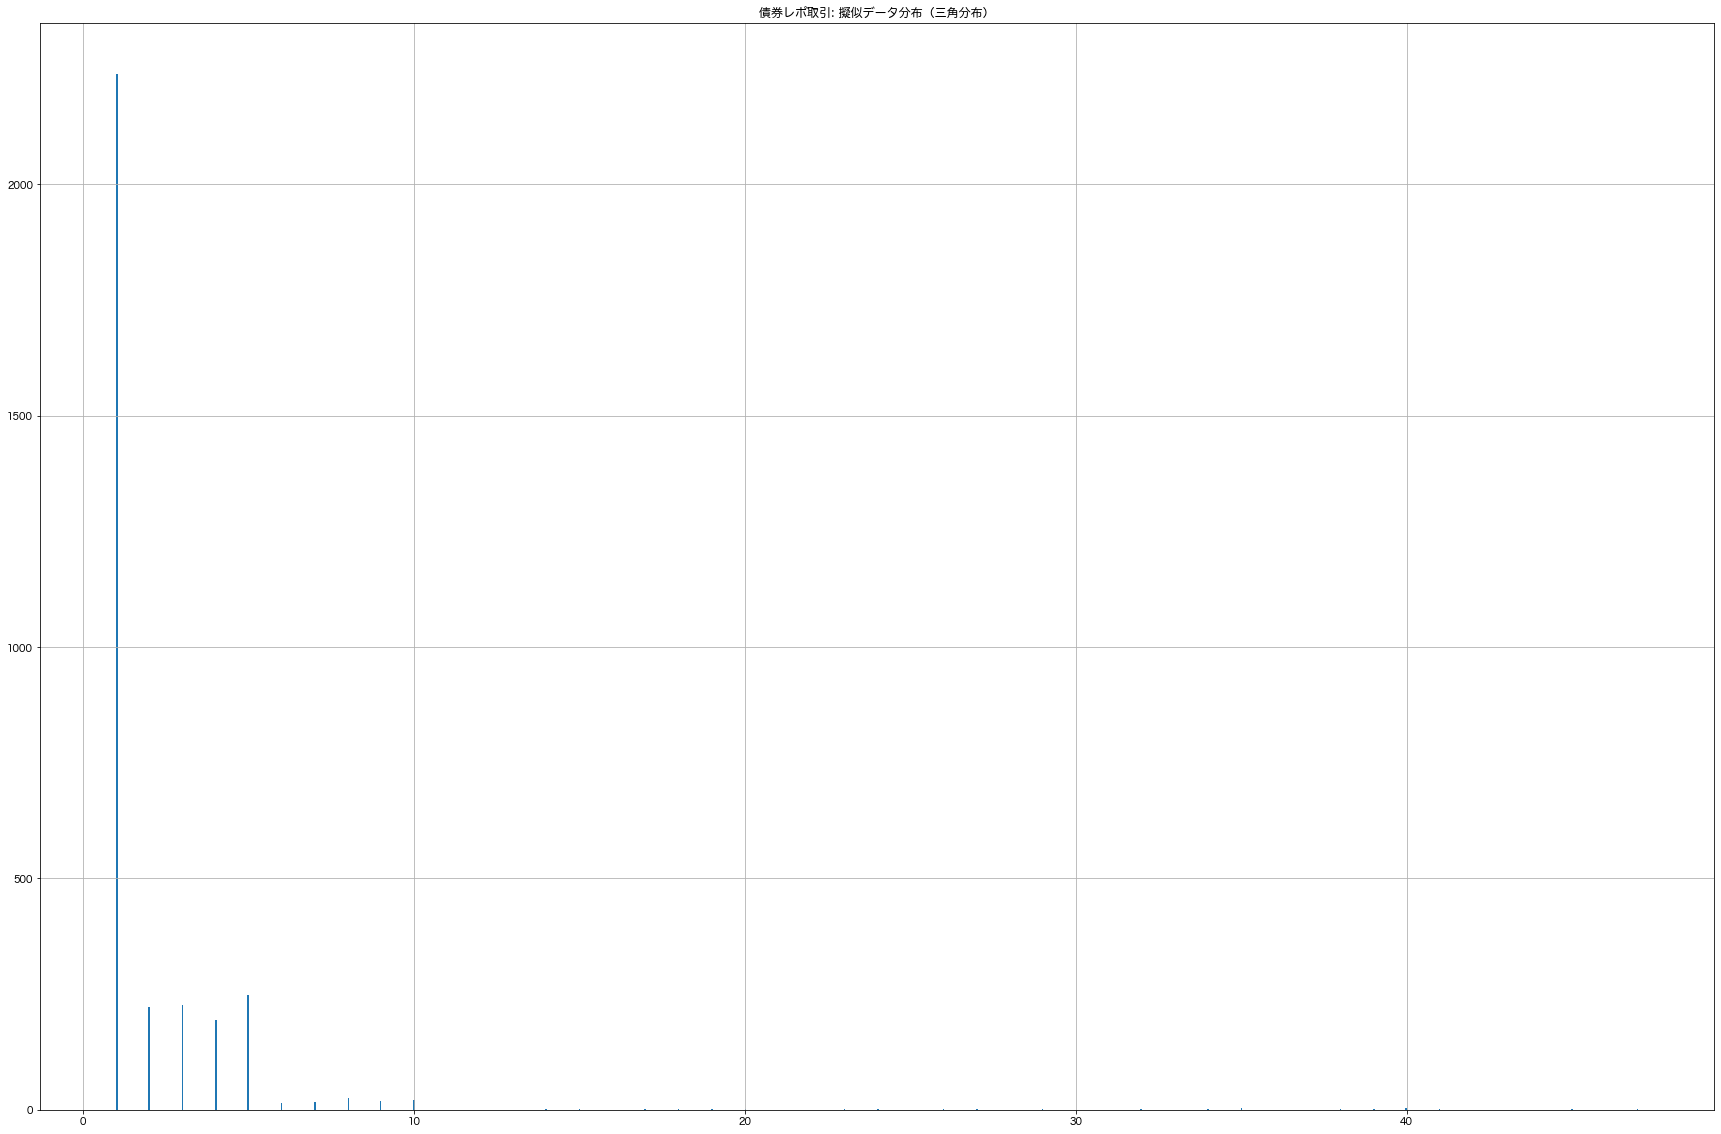

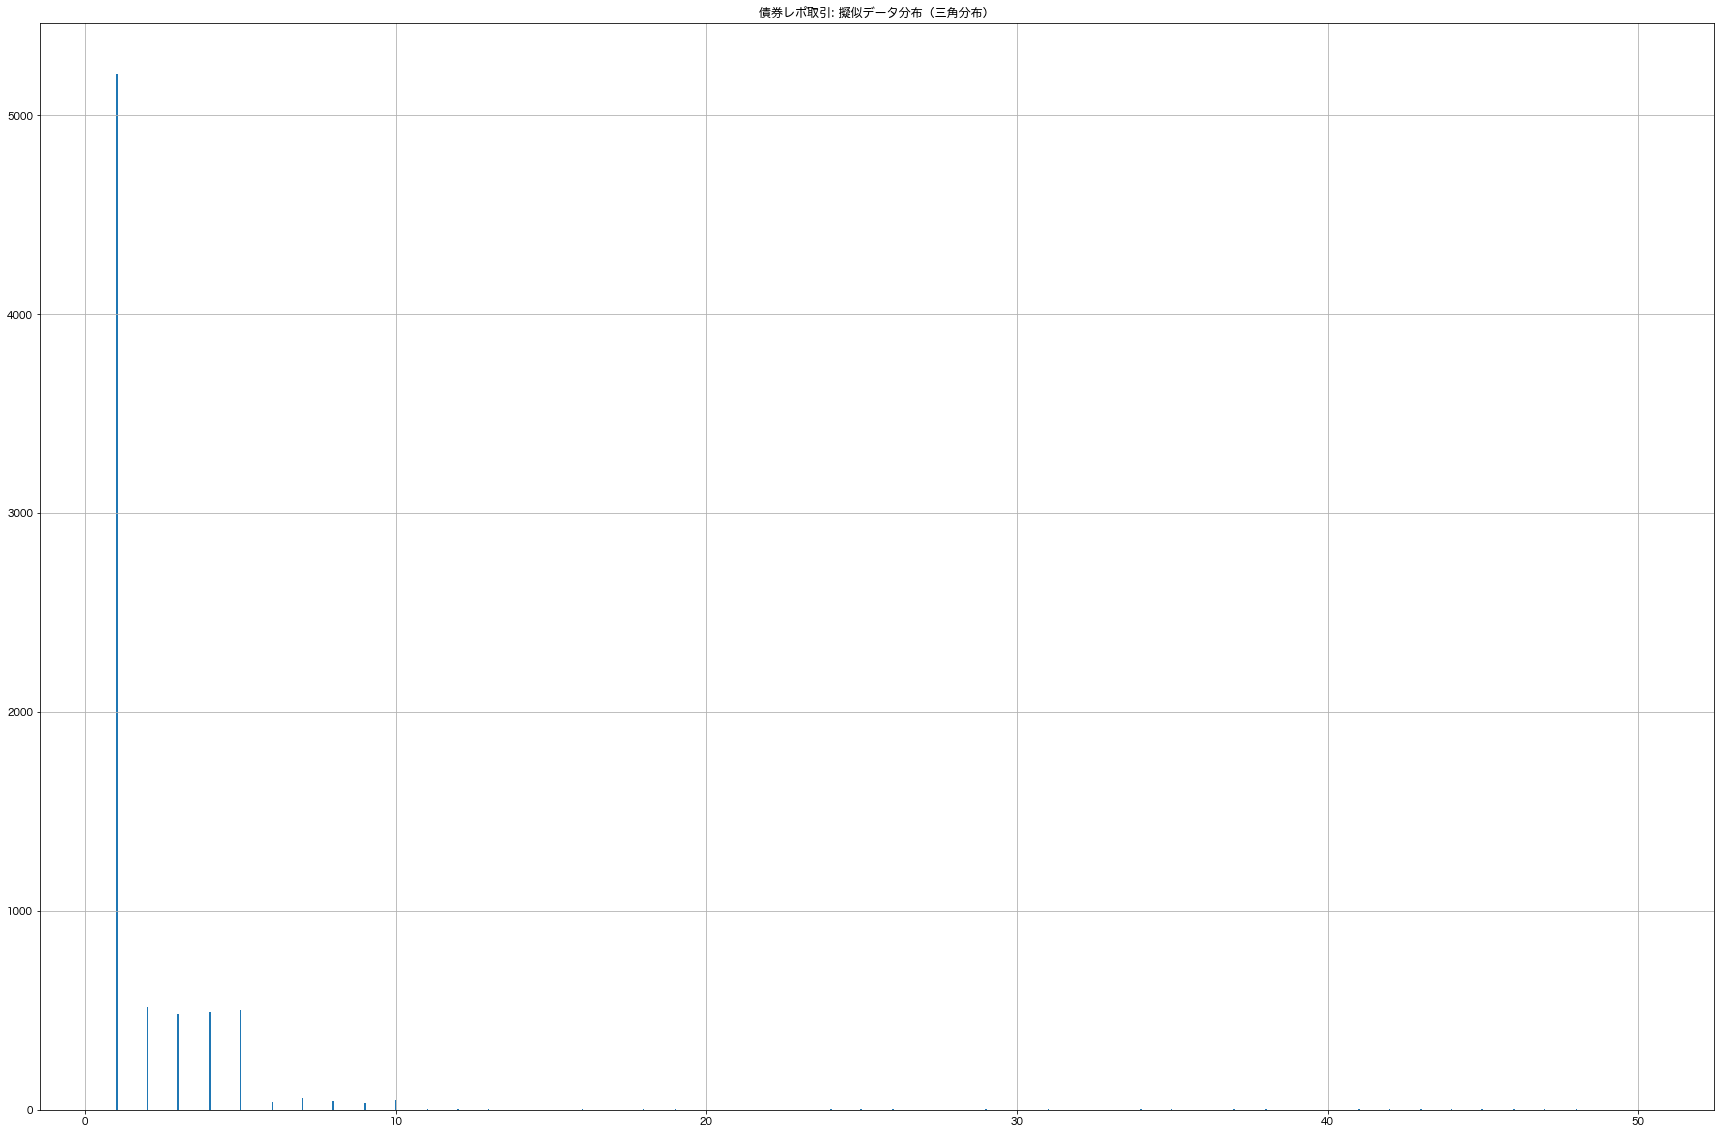

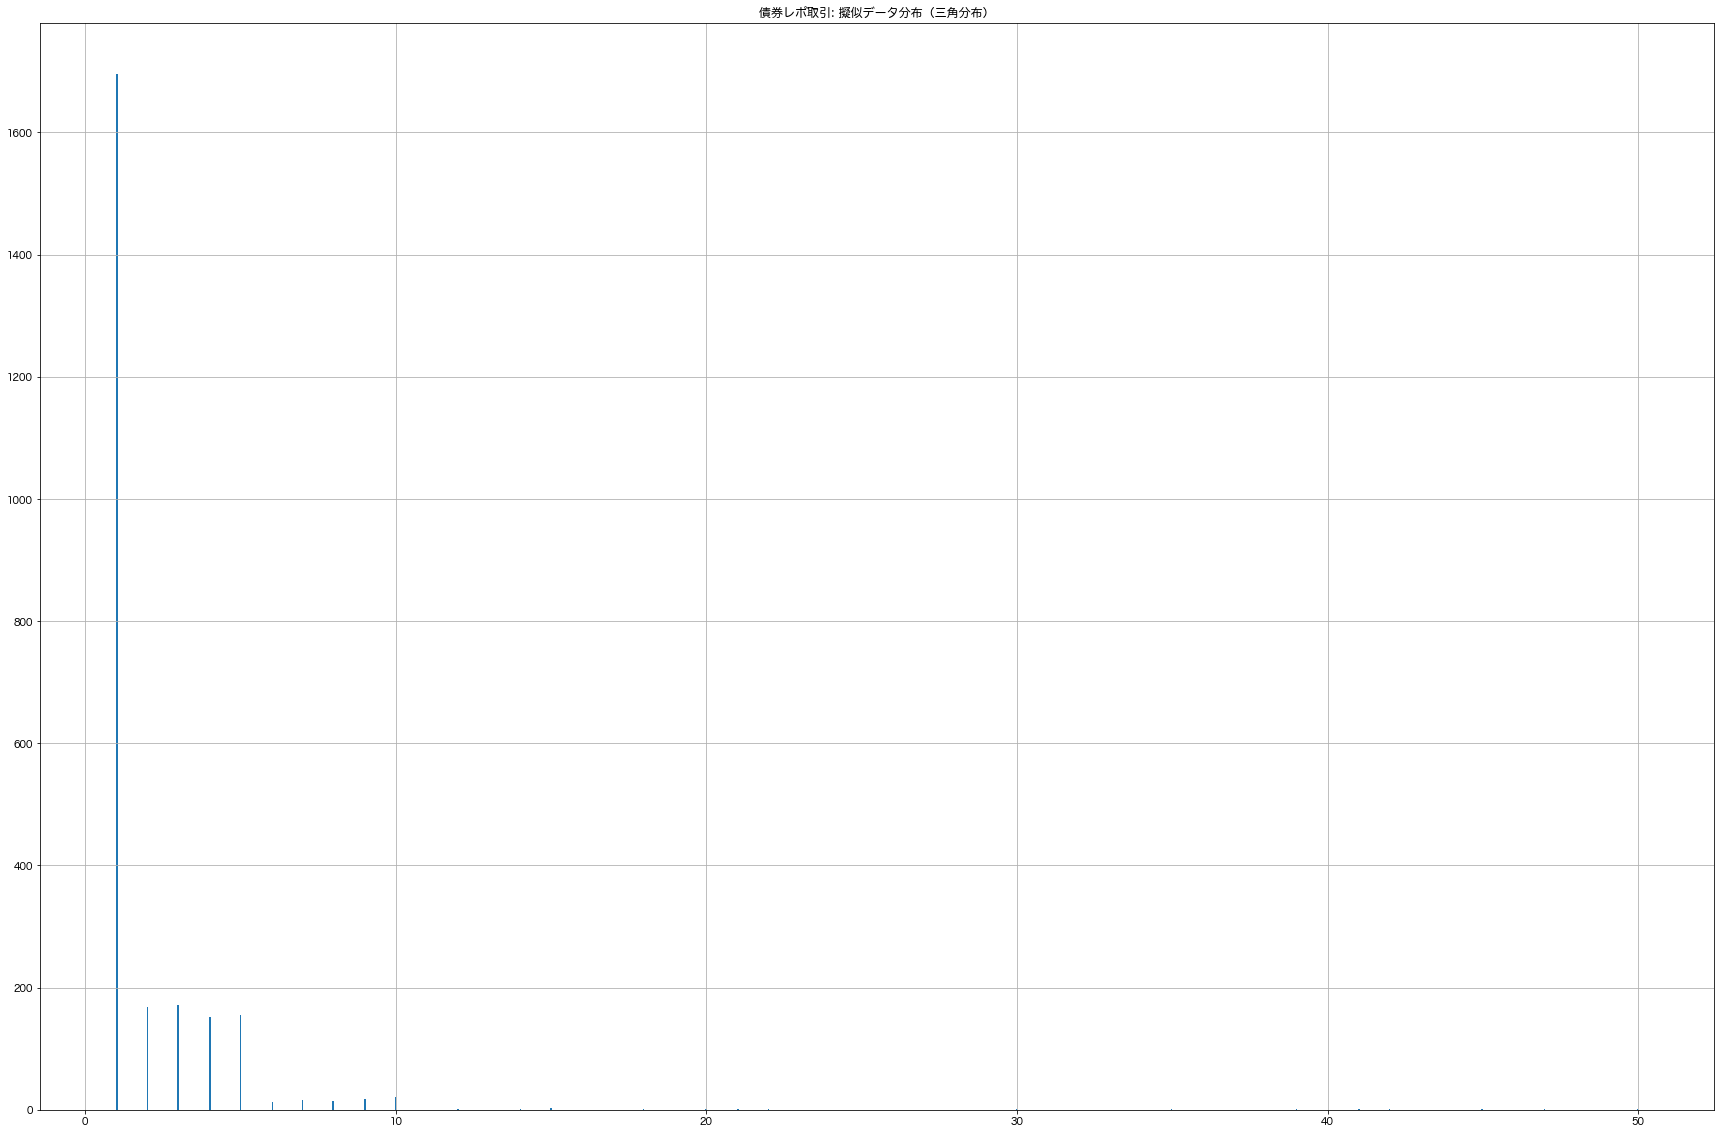

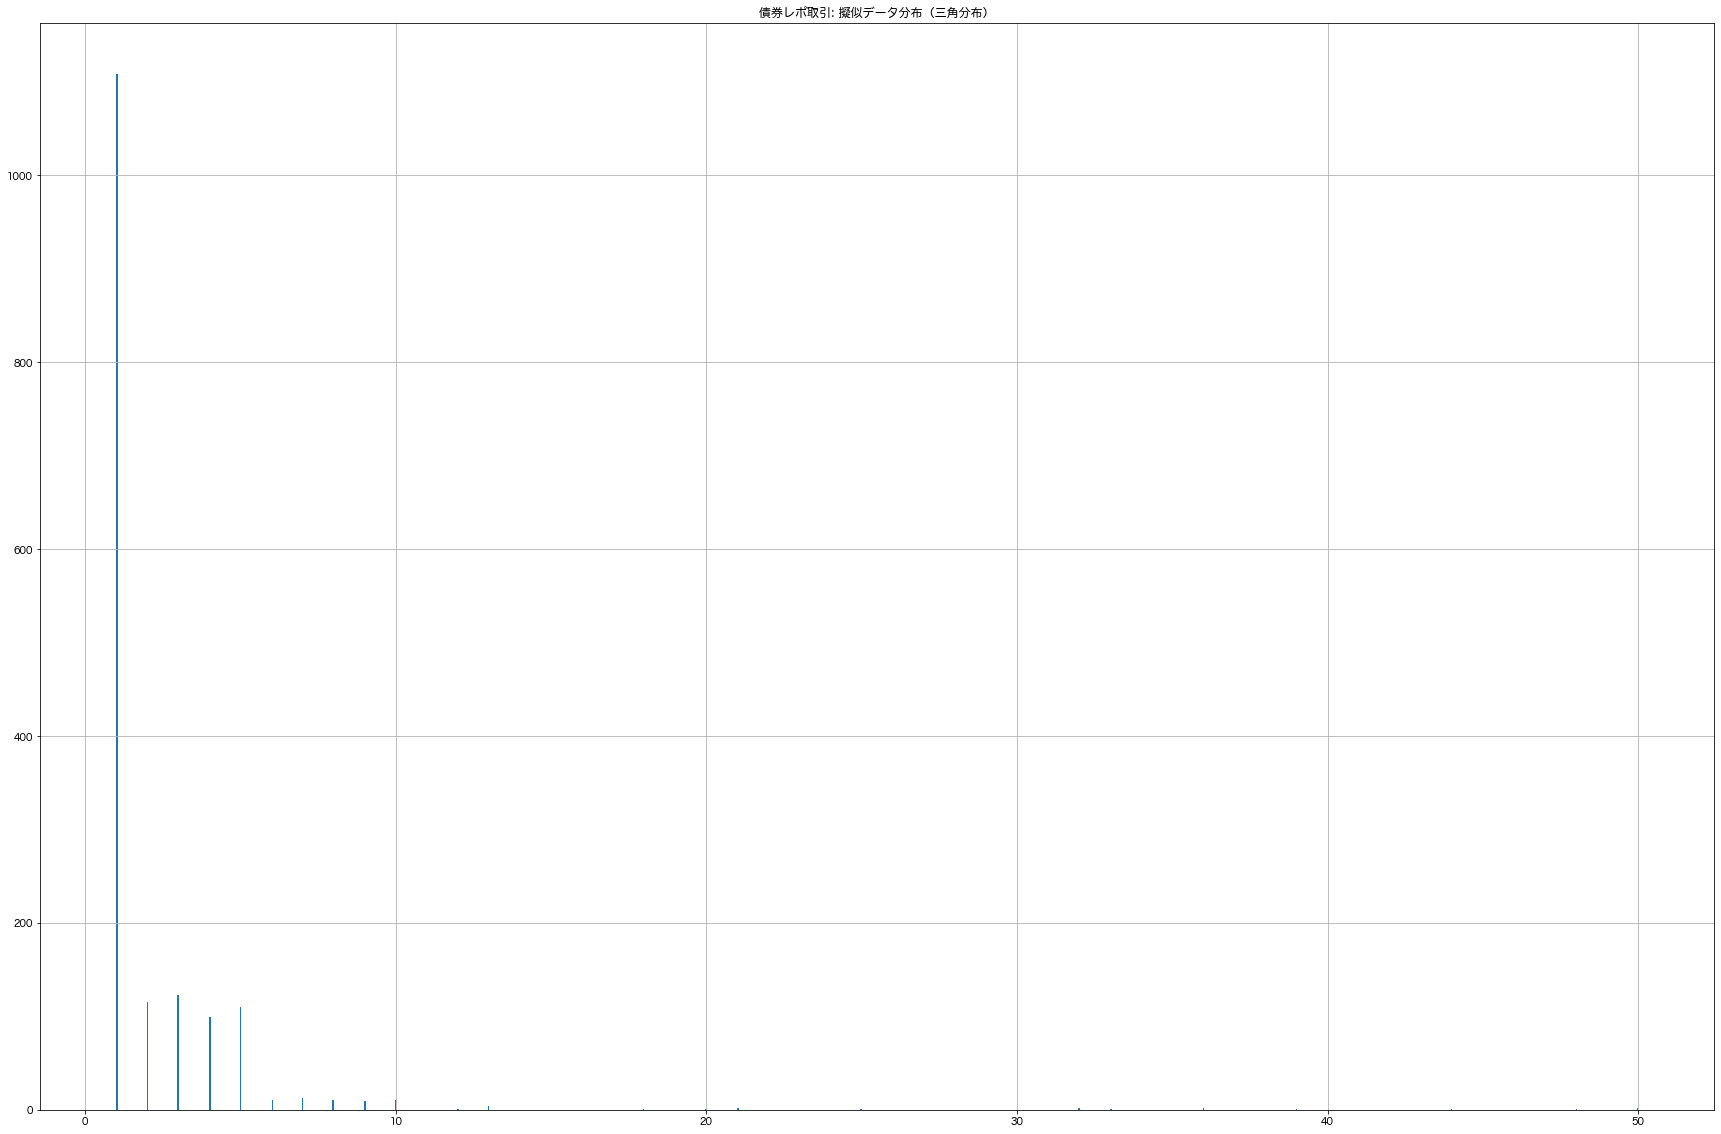

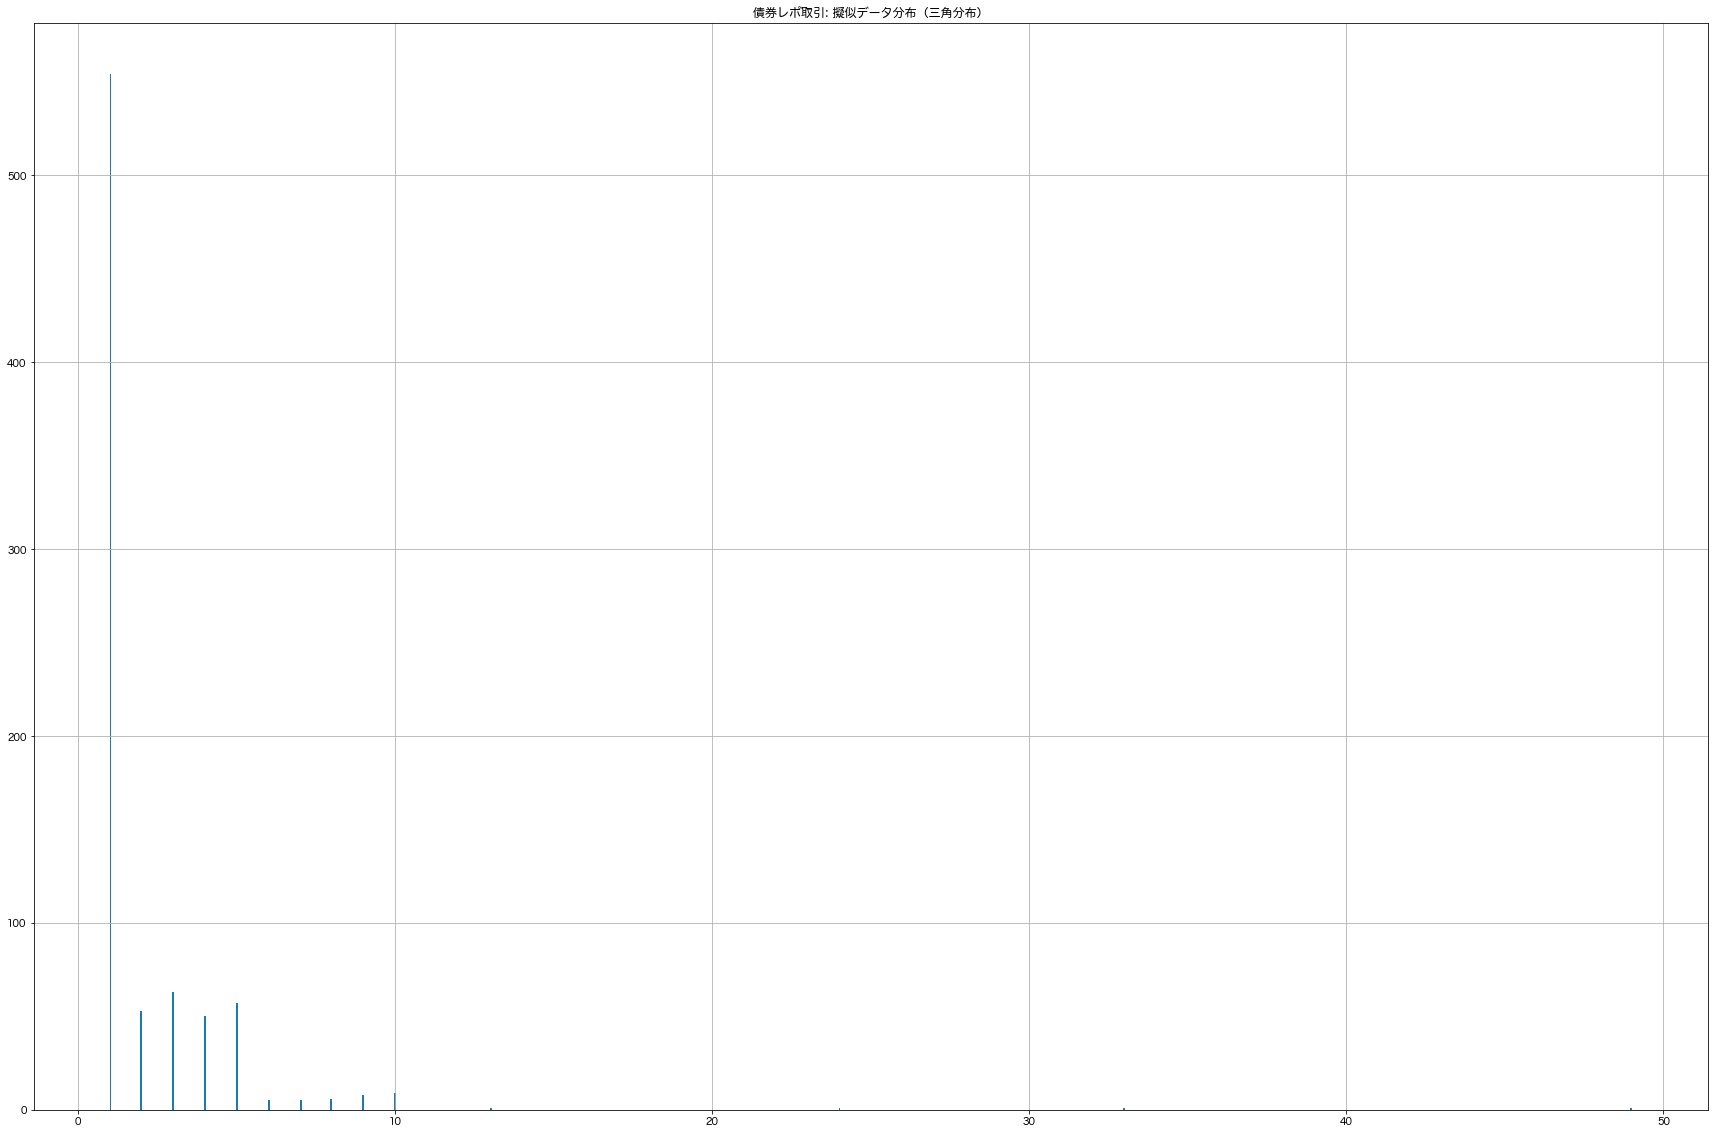

In [98]:
for _key, _value in additional_trade_nums.items():
    _num = _value['bond']
    all_security_num_dfs[_key]['bond'] = get_bond_num_df(_num)
all_security_num_dfs

### 実験用CSV作成

#### 株レポ

##### createToken.csv

In [99]:
mock_gc_df = pd.DataFrame({'price': mock_gc_price_df[0], 'security_num': mock_gc_security_num_df[0]}, dtype=int)
mock_gc_df

NameError: name 'mock_gc_price_df' is not defined

In [100]:
stock_token_num = 2800
bond_token_num = 356

print(eval(sample_create_token_df['tokenId'][0]))
hex(eval(sample_create_token_df['tokenId'][1]))

14534201717928672332366944080943963275581073313804200410876330409119688163329


'0x2022111013215200000000000000000000000000000000000000000000000002'

In [101]:
participant_num = 20
participant_list = [chr(x + 65) for x in range(participant_num)]

In [102]:
# tokenId
initial_stock_tokenId = 0x2023010917021000000000000000000000000000000000000000000000000001
stock_tokenId_list = [str(hex(initial_stock_tokenId + i)) for i in range(stock_token_num)]

initial_bond_tokenId = 0x2023010917031000000000000000000000000000000000000000000000000001
bond_tokenId_list = [str(hex(initial_bond_tokenId + i)) for i in range(bond_token_num)]

In [103]:
# tokenName
stock_tokenName_list = [f'ST0{str(i).zfill(4)}' for i in range(stock_token_num)]
bond_tokenName_list = [f'ST1{str(i).zfill(4)}' for i in range(bond_token_num)]

In [104]:
# others
tokenTypeId = sample_create_token_df['tokenTypeId'][0]
stock_tokenTypeId_list = [tokenTypeId] * stock_token_num
bond_tokenTypeId_list = [tokenTypeId] * bond_token_num
updateTime = sample_create_token_df['updateTime'][0]
stock_updateTime_list = [updateTime] * stock_token_num
bond_updateTime_list = [updateTime] * bond_token_num
token_price = 5.0e+7
stock_price_list = [token_price] * stock_token_num
bond_price_list = [token_price] * bond_token_num

In [105]:
stock_create_token_df = pd.DataFrame([stock_tokenId_list, stock_tokenName_list, stock_price_list, stock_tokenTypeId_list, stock_updateTime_list], index=sample_create_token_df.columns).T
stock_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20230109170210000000000000000000000000000000...,ST00000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20230109170210000000000000000000000000000000...,ST00001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20230109170210000000000000000000000000000000...,ST00002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20230109170210000000000000000000000000000000...,ST00003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20230109170210000000000000000000000000000000...,ST00004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
2795,0x20230109170210000000000000000000000000000000...,ST02795,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2796,0x20230109170210000000000000000000000000000000...,ST02796,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2797,0x20230109170210000000000000000000000000000000...,ST02797,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2798,0x20230109170210000000000000000000000000000000...,ST02798,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [106]:
bond_create_token_df = pd.DataFrame([bond_tokenId_list, bond_tokenName_list, bond_price_list, bond_tokenTypeId_list, bond_updateTime_list], index=sample_create_token_df.columns).T
bond_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20230109170310000000000000000000000000000000...,ST10000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20230109170310000000000000000000000000000000...,ST10001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20230109170310000000000000000000000000000000...,ST10002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20230109170310000000000000000000000000000000...,ST10003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20230109170310000000000000000000000000000000...,ST10004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
351,0x20230109170310000000000000000000000000000000...,ST10351,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
352,0x20230109170310000000000000000000000000000000...,ST10352,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
353,0x20230109170310000000000000000000000000000000...,ST10353,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
354,0x20230109170310000000000000000000000000000000...,ST10354,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [109]:
# JCTの行も追加する
# jct_row = pd.DataFrame({'tokenId': jct_tokenId, 'tokenName': 'JCT00000', 'price': jct_price, 'tokenTypeId': sample_create_token_df['tokenTypeId'][0], 'updateTime': sample_create_token_df['updateTime'][0]}, index=[0])

# total_create_token_df = pd.concat([jct_row, stock_create_token_df, bond_create_token_df], ignore_index=True).reset_index(drop=True)
total_create_token_df = pd.concat([stock_create_token_df, bond_create_token_df], ignore_index=True)
total_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20230109170210000000000000000000000000000000...,ST00000,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20230109170210000000000000000000000000000000...,ST00001,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20230109170210000000000000000000000000000000...,ST00002,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20230109170210000000000000000000000000000000...,ST00003,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20230109170210000000000000000000000000000000...,ST00004,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
3151,0x20230109170310000000000000000000000000000000...,ST10351,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3152,0x20230109170310000000000000000000000000000000...,ST10352,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3153,0x20230109170310000000000000000000000000000000...,ST10353,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112
3154,0x20230109170310000000000000000000000000000000...,ST10354,50000000.0,0x30783030303031000000000000000000000000000000...,1668054112


In [110]:
total_create_token_df.to_csv(f'{data_relative_path}total_create_token.csv', index=False)

##### createTrade.csv

In [53]:
a_trade_num

11938

In [111]:
# 1種類のトークンが最大取引数を取るように調整しつつ、取引ごとにランダムで銘柄をサンプリングする
def sample_with_freq_token(freq_num, token_list, token_num_list):
    if (freq_num > len(token_num_list)):
        raise ValueError('freq_num is larger than the number of trades!!')
    
    tokenIds_list = []
    freq_token_id = token_list[0]
    count = freq_num
    
    for _num in token_num_list:
        if count > 0:
            tokenIds_list.append([freq_token_id] + list(token_list[1:].sample(_num - 1)))
            count -= 1
        else:
            tokenIds_list.append(list(token_list[1:].sample(_num)))
    
    return tokenIds_list

# lenderTokenIds_list = sample_with_freq_token(b_security_nums['100%']['stock'], st_list, all_security_num_dfs['100%']['gc'][0])
# print(lenderTokenIds_list[:5])

In [112]:
def get_trade_df(trade_num, initial_tradingId,  price_df, security_num_df, create_token_df, with_freq=False, freq_num=0):
    # tradingId
    tradingId_list = [str(hex(initial_tradingId + i)) for i in range(trade_num)]

    # lenderTokenIds, lenderTokenAmounts
    st_list = create_token_df['tokenId']
    lenderTokenIds_list = sample_with_freq_token(freq_num, st_list, security_num_df[0]) if with_freq else [list(st_list[1:].sample(security_num)) for security_num in security_num_df[0]]
    lenderTokenAmounts_list = []
    lender_token_total_price_list = []
    for i in range(trade_num):
        each_num = int(math.ceil((price_df[0][i] / token_price ) / security_num_df[0][i]))
        lenderTokenAmounts_list.append([each_num] * security_num_df[0][i])
        lender_token_total_price_list.append(each_num * security_num_df[0][i] * token_price)

    # borrowerTokenAmounts
    borrowerTokenAmounts_list = [[math.ceil(lender_total_price / jct_price)] for lender_total_price in lender_token_total_price_list]
    
    # others
#     lender_list, borrower_list = get_random_participants(trade_num, participant_num)
    lender_list = [sample_create_trading_df['lender'][0]] * trade_num # dummy 
    borrowerTokenIds_list = [sample_create_trading_df['borrowerTokenIds'][0]] * trade_num
    startTime_list = [sample_create_trading_df['startTime'][0]] * trade_num
    finishTime_list = [sample_create_trading_df['finishTime'][0]] * trade_num
    rate_list = [sample_create_trading_df['rate'][0]] * trade_num
    adjustmentToken_list = [sample_create_trading_df['adjustmentToken'][0]] * trade_num
    return pd.DataFrame([tradingId_list, lender_list, borrowerTokenIds_list, lenderTokenIds_list, borrowerTokenAmounts_list, lenderTokenAmounts_list, startTime_list, finishTime_list, rate_list, adjustmentToken_list], index=sample_create_trading_df.columns).T

In [113]:
# 多者間での取引を再現するためにborrower、lenderのリストをランダムに生成
def get_random_participants(trade_num, participant_num):
    _participant_list = [chr(x + 65) for x in range(participant_num)]
    _trade_participant_list = [random.sample(_participant_list, 2) for i in range(trade_num)]
    _user_ids = {}
    default_id = '0x0000000000000000000000000000000000000000000000000000000000000000'
    for i, _participant in enumerate(_participant_list):
        index_str = str(i + 1)
        index_str_len = len(index_str)
        _user_ids[_participant] = default_id[:-index_str_len] + index_str
    return _trade_participant_list, _participant_list, _user_ids

In [114]:
# lenderIdについては0x0000000000000000000000000000000000000000000000000000000000000001~0x00000000000000000000000000000000000000000000000000000000000020
# に固定してしまうためベタ打ちで
'0x0000000000000000000000000000000000000000000000000000000000000001' + '1'

'0x00000000000000000000000000000000000000000000000000000000000000011'

In [115]:
get_random_participants(20, 10)

([['D', 'F'],
  ['G', 'F'],
  ['I', 'E'],
  ['B', 'G'],
  ['B', 'G'],
  ['J', 'F'],
  ['E', 'B'],
  ['H', 'E'],
  ['J', 'E'],
  ['B', 'H'],
  ['B', 'F'],
  ['D', 'H'],
  ['G', 'E'],
  ['E', 'B'],
  ['H', 'J'],
  ['F', 'A'],
  ['E', 'D'],
  ['J', 'A'],
  ['B', 'J'],
  ['J', 'C']],
 ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
 {'A': '0x0000000000000000000000000000000000000000000000000000000000000001',
  'B': '0x0000000000000000000000000000000000000000000000000000000000000002',
  'C': '0x0000000000000000000000000000000000000000000000000000000000000003',
  'D': '0x0000000000000000000000000000000000000000000000000000000000000004',
  'E': '0x0000000000000000000000000000000000000000000000000000000000000005',
  'F': '0x0000000000000000000000000000000000000000000000000000000000000006',
  'G': '0x0000000000000000000000000000000000000000000000000000000000000007',
  'H': '0x0000000000000000000000000000000000000000000000000000000000000008',
  'I': '0x0000000000000000000000000000000000000000

In [116]:
# trade_num毎に各種create_trade_dfを作成し結合、csv形式で出力
initial_tradingIds = {
    'gc': 0x2023010918240000000000000000000000000000000000000000000000000001,
    'sc': 0x2023010918241000000000000000000000000000000000000000000000000001,
    'bond': 0x2023010918242000000000000000000000000000000000000000000000000001,
}

results = {}
    
for _all_trade_num, _obj in additional_trade_nums.items():
    print(f'{_all_trade_num} starts:')
    pprint(_obj)
    file_name = f'{data_relative_path}create_trade_{_all_trade_num}.csv'
    create_trade_df_list = []
    for _type, _num in _obj.items():
        _initial_tradingId = initial_tradingIds[_type]
        _create_token_df = stock_create_token_df if _type in ['gc', 'sc'] else bond_create_token_df
        _security_category = 'stock' if _type in ['gc', 'sc'] else 'bond'
        _with_freq = _type in ['gc', 'bond']
        %time _create_trade_df = get_trade_df(_num, _initial_tradingId, all_price_dfs[_all_trade_num][_type], all_security_num_dfs[_all_trade_num][_type], _create_token_df, _with_freq, additional_security_nums[_all_trade_num][_security_category])
        _create_trade_df['lock'] = [2] * _num
        _create_trade_df['margincallThreshold'] = [0] * _num
        _create_trade_df['adjustmentTokenTypeId'] = ['0x3078303030303100000000000000000000000000000000000000000000000000'] * _num
        _create_trade_df.drop('adjustmentToken', axis=1, inplace=True)
        
        create_trade_df_list.append(_create_trade_df)
    all_create_trades_df = pd.concat(create_trade_df_list, ignore_index=True)
    results[_all_trade_num] = all_create_trades_df
    all_create_trades_df.to_csv(file_name, index=False)
    print(f'{_all_trade_num} finished!')

4000 starts:
{'bond': 3257, 'gc': 100, 'sc': 643}
CPU times: user 22.5 ms, sys: 2.33 ms, total: 24.8 ms
Wall time: 23.8 ms
CPU times: user 74 ms, sys: 185 µs, total: 74.2 ms
Wall time: 74.3 ms
CPU times: user 211 ms, sys: 2.88 ms, total: 214 ms
Wall time: 212 ms
4000 finished!
9200 starts:
{'bond': 7492, 'gc': 229, 'sc': 1479}
CPU times: user 23 ms, sys: 59 µs, total: 23.1 ms
Wall time: 23.1 ms
CPU times: user 141 ms, sys: 199 µs, total: 141 ms
Wall time: 141 ms
CPU times: user 496 ms, sys: 15.2 ms, total: 511 ms
Wall time: 500 ms
9200 finished!
3000 starts:
{'bond': 2443, 'gc': 75, 'sc': 482}
CPU times: user 8.25 ms, sys: 80 µs, total: 8.33 ms
Wall time: 8.34 ms
CPU times: user 46.9 ms, sys: 256 µs, total: 47.2 ms
Wall time: 47.2 ms
CPU times: user 162 ms, sys: 2.93 ms, total: 165 ms
Wall time: 164 ms
3000 finished!
2000 starts:
{'bond': 1629, 'gc': 50, 'sc': 321}
CPU times: user 5.36 ms, sys: 3 µs, total: 5.37 ms
Wall time: 5.37 ms
CPU times: user 30.8 ms, sys: 58 µs, total: 30.9 ms


In [117]:
results['4000']

,tradingId,lender,borrowerTokenIds,lenderTokenIds,borrowerTokenAmounts,lenderTokenAmounts,startTime,finishTime,rate,lock,margincallThreshold,adjustmentTokenTypeId
0,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[13055476500],"[263747, 263747, 263747, 263747, 263747, 26374...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
1,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[39199800000],"[979995, 979995, 979995, 979995, 979995, 97999...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
2,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[20452407500],"[430577, 430577, 430577, 430577, 430577, 43057...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
3,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[5488357000],"[80122, 80122, 80122, 80122, 80122, 80122, 801...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
4,0x20230109182400000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917021000000000000000000000000000000...,[73372307500],"[1371445, 1371445, 1371445, 1371445, 1371445, ...",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[135177636000],[270355272],1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
3996,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[216554521000],[433109042],1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
3997,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[326857468000],[653714936],1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...
3998,0x20230109182420000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,['0x4a4354000000000000000000000000000000000000...,[0x2023010917031000000000000000000000000000000...,[27910184000],"[27910184, 27910184]",1668054340,1668057940,100,2,0,0x30783030303031000000000000000000000000000000...


In [118]:
all_create_token_df = pd.read_csv('../data/sample/csv/createToken_decode.csv')
all_create_token_df

,tokenId,tokenName,price,tokenTypeId,updateTime
0,0x20221110132152000000000000000000000000000000...,ST00001,10000000,0x30783030303031000000000000000000000000000000...,1668054112
1,0x20221110132152000000000000000000000000000000...,ST00002,10000000,0x30783030303031000000000000000000000000000000...,1668054112
2,0x20221110132152000000000000000000000000000000...,ST00003,10000000,0x30783030303031000000000000000000000000000000...,1668054112
3,0x20221110132152000000000000000000000000000000...,ST00004,10000000,0x30783030303031000000000000000000000000000000...,1668054112
4,0x20221110132152000000000000000000000000000000...,ST00005,10000000,0x30783030303031000000000000000000000000000000...,1668054112
...,...,...,...,...,...
351,0x20221110132152000000000000000000000000000000...,ST00352,10000000,0x30783030303031000000000000000000000000000000...,1668054112
352,0x20221110132152000000000000000000000000000000...,ST00353,10000000,0x30783030303031000000000000000000000000000000...,1668054112
353,0x20221110132152000000000000000000000000000000...,ST00354,10000000,0x30783030303031000000000000000000000000000000...,1668054112
354,0x20221110132152000000000000000000000000000000...,ST00355,10000000,0x30783030303031000000000000000000000000000000...,1668054112


In [122]:
# 作成した取引数ごとのcreateTradingファイルを20者に分割していく
all_create_trade_results = {}
for _all_trade_num, _obj in additional_trade_nums.items():
    print(f'{_all_trade_num} starts///')
    _file_name = f'{data_relative_path}create_trade_{_all_trade_num}.csv'
    _create_trade = pd.read_csv(_file_name)
    all_create_trade_results[file_name] = _create_trade
    _trade_num_all = sum(_obj.values())
    print(f'trade num: {_trade_num_all}')
    trade_participant_list, participant_list, user_ids = get_random_participants(_trade_num_all, participant_num)
    
    create_trade_df_list = []
    
    cur = 0
    for participant in participant_list:
        borrower = participant
        _trade_participant_list = list(filter(lambda x: x[0] == borrower, trade_participant_list))
        _trade_num = len(_trade_participant_list)
        _result_df = _create_trade.iloc[cur:cur+_trade_num, :]
        _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]
        _result_df = _result_df.reset_index(drop=True)
#         data_dir = Path('../data/data202303_v2')
#         data_dir.mkdir(parents=True, exist_ok=True)
        Path(f'{data_relative_path}{_all_trade_num}').mkdir(parents=True, exist_ok=True)
        _result_df.to_csv(f'{data_relative_path}{_all_trade_num}/create_trade_{borrower}.csv', index=False)
        create_trade_df_list.append(_result_df)
        cur += _trade_num
    
    create_trade_all_df = pd.concat(create_trade_df_list, ignore_index=True)
    print(f'total unique num: {create_trade_all_df["tradingId"].nunique()}')
    for participant in participant_list:
        lender = participant
        _df = create_trade_all_df.query(f'lender == "{user_ids[lender]}"')['tradingId']
        _df.to_csv(f'{data_relative_path}{_all_trade_num}/accept_trade_{lender}.csv', index=False)
        print(f'{_all_trade_num}_{lender}:')
#         pprint(_df)


4000 starts///
trade num: 4000
total unique num: 4000
4000_A:
4000_B:
4000_C:
4000_D:
4000_E:
4000_F:
4000_G:
4000_H:
4000_I:
4000_J:
4000_K:
4000_L:
4000_M:
4000_N:
4000_O:
4000_P:
4000_Q:
4000_R:
4000_S:
4000_T:
9200 starts///
trade num: 9200


/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_71803/2801628450.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]
/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_71803/2801628450.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]


total unique num: 9200
9200_A:
9200_B:
9200_C:
9200_D:
9200_E:
9200_F:
9200_G:
9200_H:
9200_I:
9200_J:
9200_K:
9200_L:
9200_M:
9200_N:
9200_O:
9200_P:
9200_Q:
9200_R:
9200_S:
9200_T:
3000 starts///
trade num: 3000
total unique num: 3000
3000_A:
3000_B:
3000_C:
3000_D:
3000_E:
3000_F:
3000_G:
3000_H:
3000_I:
3000_J:
3000_K:
3000_L:
3000_M:
3000_N:
3000_O:
3000_P:
3000_Q:
3000_R:
3000_S:
3000_T:
2000 starts///
trade num: 2000


/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_71803/2801628450.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]
/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_71803/2801628450.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _result_df['lender'] = [user_ids[_participant[1]] for _participant in _trade_participant_list]
/var/folders/7c/jl9q60jd1558_fg0tfx8254r0000gn/T/ipykernel_71803

total unique num: 2000
2000_A:
2000_B:
2000_C:
2000_D:
2000_E:
2000_F:
2000_G:
2000_H:
2000_I:
2000_J:
2000_K:
2000_L:
2000_M:
2000_N:
2000_O:
2000_P:
2000_Q:
2000_R:
2000_S:
2000_T:
1000 starts///
trade num: 1000
total unique num: 1000
1000_A:
1000_B:
1000_C:
1000_D:
1000_E:
1000_F:
1000_G:
1000_H:
1000_I:
1000_J:
1000_K:
1000_L:
1000_M:
1000_N:
1000_O:
1000_P:
1000_Q:
1000_R:
1000_S:
1000_T:


In [123]:
additional_trade_nums

{'4000': {'gc': 100, 'sc': 643, 'bond': 3257},
 '9200': {'gc': 229, 'sc': 1479, 'bond': 7492},
 '3000': {'gc': 75, 'sc': 482, 'bond': 2443},
 '2000': {'gc': 50, 'sc': 321, 'bond': 1629},
 '1000': {'gc': 25, 'sc': 161, 'bond': 814}}

##### updateToken

In [124]:
sample_update_token_df

,tokenId,price,updateTime
0,0x20221110132152000000000000000000000000000000...,9000000,1668054263
1,0x20221110132152000000000000000000000000000000...,9000000,1668054263
2,0x20221110132152000000000000000000000000000000...,9000000,1668054263
3,0x20221110132152000000000000000000000000000000...,9000000,1668054263
4,0x20221110132152000000000000000000000000000000...,9000000,1668054263
...,...,...,...
351,0x20221110132152000000000000000000000000000000...,9000000,1668054263
352,0x20221110132152000000000000000000000000000000...,9000000,1668054263
353,0x20221110132152000000000000000000000000000000...,9000000,1668054263
354,0x20221110132152000000000000000000000000000000...,9000000,1668054263


In [125]:
total_update_token_df = total_create_token_df.copy()
total_update_token_df = total_update_token_df.drop(labels=['tokenName', 'tokenTypeId'], axis=1)
total_update_token_df

,tokenId,price,updateTime
0,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
1,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
2,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
3,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
4,0x20230109170210000000000000000000000000000000...,50000000.0,1668054112
...,...,...,...
3151,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112
3152,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112
3153,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112
3154,0x20230109170310000000000000000000000000000000...,50000000.0,1668054112


In [126]:
# 日々の価格変化率をランダムで割り当てる
min_daily_change = -0.12
max_daily_change = 0.15
price_change_list = []
for i in range(stock_token_num + bond_token_num):
    price_change_list.append(1 + min_daily_change + np.random.rand() * (max_daily_change - min_daily_change))
price_change_list

[1.1225101600875194,
 0.9403128197646002,
 0.9014851638539504,
 1.1232361553961714,
 1.0095710895515806,
 0.9066609234600241,
 1.063871571635329,
 1.1168079122860697,
 0.9639165105892451,
 1.0104545355764052,
 0.9595019062737191,
 1.0296631812825656,
 0.980694184953457,
 0.9951469028548584,
 0.9349918743076168,
 0.9826929536514917,
 0.9734745599238759,
 1.0959970883587045,
 1.10579127367424,
 0.9099601898693713,
 1.1471125684865604,
 0.8923638985672938,
 1.0136730461125476,
 0.9875124812104262,
 1.1339968712080317,
 1.1055579176837962,
 1.1403656421587782,
 1.1455615582349947,
 0.9095150767829802,
 1.0429835278936888,
 0.9326516424347666,
 0.9987274683131339,
 0.8886592498398328,
 0.9446488980314597,
 0.917163015481863,
 1.1238346899395266,
 1.0686113133840949,
 1.0215599490704144,
 1.1011164015120884,
 1.1469299922710081,
 0.950185980419307,
 0.9145493492034078,
 1.1170082046237997,
 0.9090224803751489,
 0.9224728852642857,
 0.9399406541507946,
 0.927207176986685,
 1.0162177976748656,

In [127]:
new_price_list = total_update_token_df['price'] * price_change_list
total_update_token_df['price'] = new_price_list.astype('int')

In [128]:
total_update_token_df

,tokenId,price,updateTime
0,0x20230109170210000000000000000000000000000000...,56125508,1668054112
1,0x20230109170210000000000000000000000000000000...,47015640,1668054112
2,0x20230109170210000000000000000000000000000000...,45074258,1668054112
3,0x20230109170210000000000000000000000000000000...,56161807,1668054112
4,0x20230109170210000000000000000000000000000000...,50478554,1668054112
...,...,...,...
3151,0x20230109170310000000000000000000000000000000...,51090323,1668054112
3152,0x20230109170310000000000000000000000000000000...,54511997,1668054112
3153,0x20230109170310000000000000000000000000000000...,50234400,1668054112
3154,0x20230109170310000000000000000000000000000000...,46940126,1668054112


In [129]:
total_update_token_df.to_csv(f'{data_relative_path}total_update_token.csv', index=False)

##### generateToken

In [130]:
# generate_token_df = pd.DataFrame(index=[], columns=['tokenId', 'userId'])
# _dict = {'tokenId': [10], 'userId': [20]}
# pd.concat([generate_token_df, pd.DataFrame(_dict)], ignore_index=True)

generate_token_dict = {'tokenId': [], 'userId': []}
for tokenId in list(total_create_token_df['tokenId']):
    for participant in participant_list:
        generate_token_dict['tokenId'].append(tokenId)
        generate_token_dict['userId'].append(user_ids[participant])

generate_token_df = pd.DataFrame(generate_token_dict)
generate_token_df['addAmount'] = [int(1e+15)] * len(generate_token_df)

In [131]:
generate_token_df.to_csv(f'{data_relative_path}total_generate_token.csv', index=False)

In [132]:
participant_list
user_ids

{'A': '0x0000000000000000000000000000000000000000000000000000000000000001',
 'B': '0x0000000000000000000000000000000000000000000000000000000000000002',
 'C': '0x0000000000000000000000000000000000000000000000000000000000000003',
 'D': '0x0000000000000000000000000000000000000000000000000000000000000004',
 'E': '0x0000000000000000000000000000000000000000000000000000000000000005',
 'F': '0x0000000000000000000000000000000000000000000000000000000000000006',
 'G': '0x0000000000000000000000000000000000000000000000000000000000000007',
 'H': '0x0000000000000000000000000000000000000000000000000000000000000008',
 'I': '0x0000000000000000000000000000000000000000000000000000000000000009',
 'J': '0x0000000000000000000000000000000000000000000000000000000000000010',
 'K': '0x0000000000000000000000000000000000000000000000000000000000000011',
 'L': '0x0000000000000000000000000000000000000000000000000000000000000012',
 'M': '0x0000000000000000000000000000000000000000000000000000000000000013',
 'N': '0x000

##### updateTrade

In [134]:
update_trade_df = pd.DataFrame(index=[], columns=['tradingId'])

for _all_trade_num, _obj in additional_trade_nums.items():
    print(_all_trade_num)
    accept_trade_df_list = []
    for _participant in participant_list:
        _accept_trade_df = pd.read_csv(f'{data_relative_path}{_all_trade_num}/accept_trade_{_participant}.csv')
        print(_accept_trade_df['tradingId'].nunique())
        accept_trade_df_list.append(_accept_trade_df)
    update_trade_df = pd.concat(accept_trade_df_list, ignore_index=True)
    update_trade_df.to_csv(f'{data_relative_path}{_all_trade_num}/update_trade.csv')
    print(len(update_trade_df['tradingId']))
    print(update_trade_df['tradingId'].nunique())
    pprint(update_trade_df)
    

4000
187
212
178
198
226
209
216
208
197
216
169
194
216
224
198
197
183
190
203
179
4000
4000
                                              tradingId
0     0x20230109182410000000000000000000000000000000...
1     0x20230109182410000000000000000000000000000000...
2     0x20230109182410000000000000000000000000000000...
3     0x20230109182410000000000000000000000000000000...
4     0x20230109182410000000000000000000000000000000...
...                                                 ...
3995  0x20230109182420000000000000000000000000000000...
3996  0x20230109182420000000000000000000000000000000...
3997  0x20230109182420000000000000000000000000000000...
3998  0x20230109182420000000000000000000000000000000...
3999  0x20230109182420000000000000000000000000000000...

[4000 rows x 1 columns]
9200
469
449
477
426
501
480
414
489
459
462
462
417
443
452
457
463
477
494
473
436
9200
9200
                                              tradingId
0     0x20230109182410000000000000000000000000000000...
1

## 相談事項

- ### 分布


- ### 銘柄種類


- ### 取引種類の統合


- ### price, update

## その他